In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns.value_counts()

Unnamed: 0      1
Date            1
AveragePrice    1
Total Volume    1
4046            1
4225            1
4770            1
Total Bags      1
Small Bags      1
Large Bags      1
XLarge Bags     1
type            1
year            1
region          1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.shape

(18249, 14)

In [9]:
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [10]:
df.sample(3)

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
4717           37  2016-04-10          0.88     681434.09  115155.67   
2182           50  2015-01-11          0.82     544667.18  303369.02   
15651           9  2017-10-29          1.98      13649.88      45.05   

            4225      4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
4717   233413.33  21804.80   311060.29   309162.69      150.85      1746.75   
2182   192913.11  12900.65    35484.40    31807.96     3271.85       404.59   
15651    2689.00      0.00    10915.83    10867.33       48.50         0.00   

               type  year               region  
4717   conventional  2016             Portland  
2182   conventional  2015             SanDiego  
15651       organic  2017  HartfordSpringfield

In [11]:
df.rename(columns = {'Unnamed: 0':'Observation'}, inplace = True)

In [12]:
df.head()

Observation        Date  AveragePrice  Total Volume     4046       4225  \
0            0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1            1  2015-12-20          1.35      54876.98   674.28   44638.81   
2            2  2015-12-13          0.93     118220.22   794.70  109149.67   
3            3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4            4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# About columns:
    
- Observations:- Shows Number of Observation done per Region
- Date- Date of Observation
- Average Price= Price of 1 Avg price (value per Avocado)
- Total Volumn- Total Volume sale
- 4046- Product Id 1 sale 
- 4225- Product Id 2 sale
- 4770- product Id 3 sale
- Total Bags- total Number of Bags Sold
- Small Bags- Bag Size
- Large Bags- Bag Size
- XLarge Bags- Bag size
- Types- conventional or organic
- Year- The year of observation
- Region- Place of origin

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Observation   18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# Checking Null Values

In [14]:
# checking null values in columns
df.isnull().sum()

Observation     0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

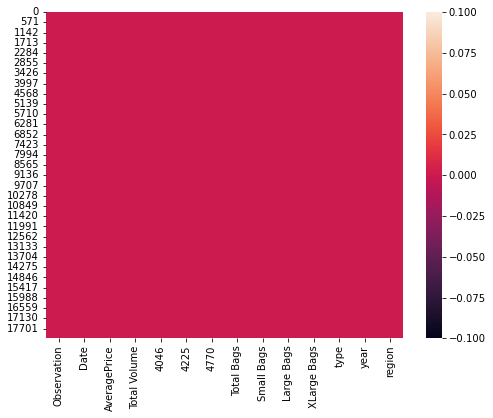

In [15]:
# visual Display of null values
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

# Checking Unique Values  and Duplicates in Columns

In [16]:
df.nunique()

Observation        53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [17]:
df['Observation'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [18]:
df['Date'].is_unique

False

In [19]:
df['Date'].is_unique

False

In [20]:
np.where(df['Date']==df['Date'])

(array([    0,     1,     2, ..., 18246, 18247, 18248], dtype=int64),)

In [21]:
df2=np.where(df.duplicated(['Date'])==False)

In [22]:
df2

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51, 2808, 2809, 2810,
        2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821,
        2822, 2823, 2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832,
        2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843,
        2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854,
        2855, 2856, 2857, 2858, 2859, 5616, 5617, 5618, 5619, 5620, 5621,
        5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5631, 5632,
        5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643,
        5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654,
        5655, 5656, 5657, 5658, 5659, 

In [23]:
df[df['Date'].duplicated()]

Observation        Date  AveragePrice  Total Volume       4046  \
52               0  2015-12-27          0.99     386100.49  292097.36   
53               1  2015-12-20          1.08     331377.53  251774.15   
54               2  2015-12-13          0.96     417772.47  324932.28   
55               3  2015-12-06          1.07     357636.82  283024.01   
56               4  2015-11-29          0.99     333280.79  250288.65   
...            ...         ...           ...           ...        ...   
18244            7  2018-02-04          1.63      17074.83    2046.96   
18245            8  2018-01-28          1.71      13888.04    1191.70   
18246            9  2018-01-21          1.87      13766.76    1191.92   
18247           10  2018-01-14          1.93      16205.22    1527.63   
18248           11  2018-01-07          1.62      17489.58    2894.77   

           4225    4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
52     27350.92  297.90    66354.31    48605.95    17748.36         0.00   
53     20702.45  103.06    58797.87    46930.26    11867.61         0.00   
54     31019.08  275.80    61545.31    38903.57    22628.21        13.53   
55     23740.85  181.92    50690.04    37032.67    13654.66         2.71   
56     28889.63  307.83    53794.68    33031.72    20738.55        24.41   
...         ...     ...         ...         ...         ...          ...   
18244   1529.20    0.00    13498.67    13066.82      431.85         0.00   
18245   3431.50    0.00     9264.84     8940.04      324.80         0.00   
18246   2452.79  727.94     9394.11     9351.80       42.31         0.00   
18247   2981.04  727.01    10969.54    10919.54       50.00         0.00   
18248   2356.13  224.53    12014.15    11988.14       26.01         0.00   

               type  year            region  
52     conventional  2015           Atlanta  
53     conventional  2015           Atlanta  
54     conventional  2015           Atlanta  
55     conventional  2015           Atlanta  
56     conventional  2015           Atlanta  
...             ...   ...               ...  
18244       organic  2018  WestTexNewMexico  
18245       organic  2018  WestTexNewMexico  
18246       organic  2018  WestTexNewMexico  
18247       organic  2018  WestTexNewMexico  
18248       organic  2018  WestTexNewMexico  

[18080 rows x 14 columns]

In [24]:
print(df['AveragePrice'].unique())

[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.03 1.18 1.29
 1.25 0.71 0.94 0.91 1.39 1.4  1.36 1.3  1.54 1.59 1.56 1.38 1.49 1.5
 1.47 1.42 1.41 1.44 1.52 0.9  0.87 0.78 0.92 0.83 0.88 0.84 0.85 1.21
 0.79 0.89 0.86 0.8  0.82 0.74 0.81 0.77 0.75 0.65 0.73 0.68 0.72 0.67
 0.76 0.62 0.7  0.66 1.46 0.49 0.53 0.56 0.6  0.58 0.54 0.52 0.51 0.57
 0.63 0.64 0.61 1.48 1.55 1.58 1.53 1.57 1.51 0.69 1.62 1.63 1.61 1.6
 1.73 1.8  1.86 1.85 1.69 1.66 1.65 1.64 1.67 1.68 1.82 2.07 1.84 1.83
 1.7  1.72 1.81 1.78 0.59 1.9  1.93 1.99 1.95 1.89 1.76 1.71 1.74 0.55
 1.79 1.75 1.94 2.2  1.87 1.77 2.06 2.11 2.22 2.14 2.15 2.02 2.   1.88
 1.96 2.19 2.09 1.98 1.97 1.92 2.04 0.46 2.01 2.08 2.03 2.05 2.28 2.35
 2.29 1.91 2.18 2.24 2.12 2.13 2.16 2.32 2.34 2.33 2.31 2.23 2.27 2.3
 2.41 2.36 2.37 2.39 2.42 2.45 2.38 2.4  2.25 2.26 2.17 2.21 2.1  2.58
 2.79 2.6

In [25]:
df['Total Volume'].unique()

array([ 64236.62,  54876.98, 118220.22, ...,  13766.76,  16205.22,
        17489.58])

In [26]:
df['4046'].unique()

array([1036.74,  674.28,  794.7 , ..., 1191.92, 1527.63, 2894.77])

In [27]:
df['4225'].unique()

array([ 54454.85,  44638.81, 109149.67, ...,   2452.79,   2981.04,
         2356.13])

In [28]:
df['4770'].unique()

array([ 48.16,  58.33, 130.5 , ..., 727.94, 727.01, 224.53])

In [29]:
df['Total Bags'].unique()

array([ 8696.87,  9505.56,  8145.35, ...,  9394.11, 10969.54, 12014.15])

In [30]:
df['Small Bags'].unique()

array([ 8603.62,  9408.07,  8042.21, ...,  9351.8 , 10919.54, 11988.14])

In [31]:
df['Large Bags'].unique()

array([ 93.25,  97.49, 103.14, ..., 324.8 ,  42.31,  26.01])

In [32]:
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

In [33]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [34]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [35]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [36]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [37]:
df.duplicated().sum()

0

In [38]:
df.columns

Index(['Observation', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [39]:
df.drop(['Observation','Date'],axis=1,inplace=True)

In [40]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

<AxesSubplot:>

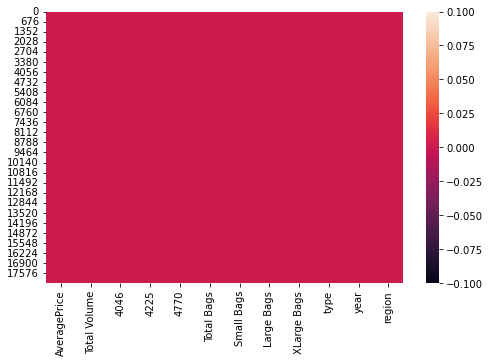

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

# EDA (Exploratory Data Analysis)

## Univariate Analysis

Minimum Price 0.44 Maximum Average Price 3.25


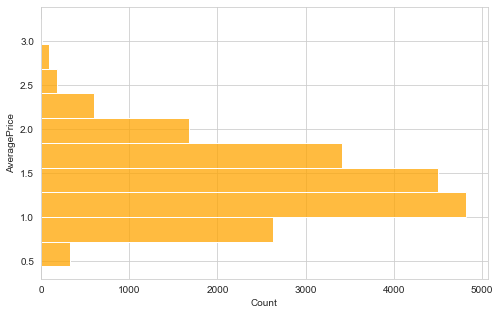

In [42]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.histplot(y='AveragePrice',data=df,bins=10,color='orange')
print("Minimum Price",df['AveragePrice'].min(),"Maximum Average Price",df['AveragePrice'].max())

 Minimum Average Price is 0.44 and Maximum Price is 3.25

<AxesSubplot:xlabel='AveragePrice'>

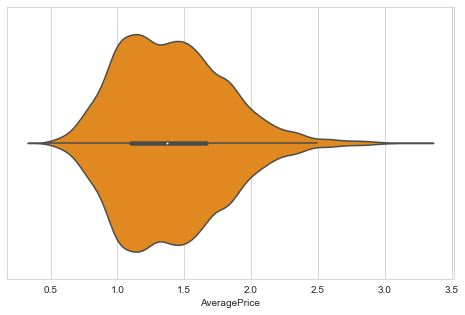

In [43]:
plt.figure(figsize=(8,5))
sns.violinplot(x='AveragePrice',data=df,bins=10,color='darkorange')

Maximum Avocado falls under an Average Price of 1.0 to 1.2

Minimum Volume  84.56 And Maximum Volume 62505646.52


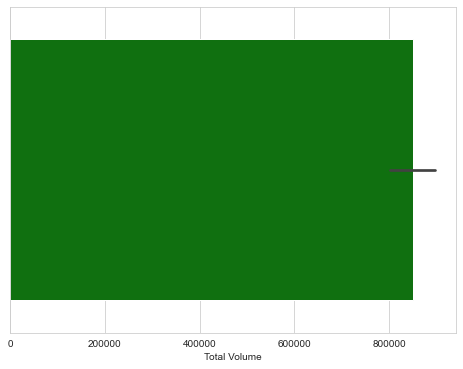

In [44]:
plt.figure(figsize=(8,6))
sns.barplot(x='Total Volume',data=df,color='green')
print("Minimum Volume ",df['Total Volume'].min(),'And Maximum Volume',df['Total Volume'].max())

Minimum Volume  84.56 And Maximum Volume 62505646.52

<AxesSubplot:xlabel='Total Volume'>

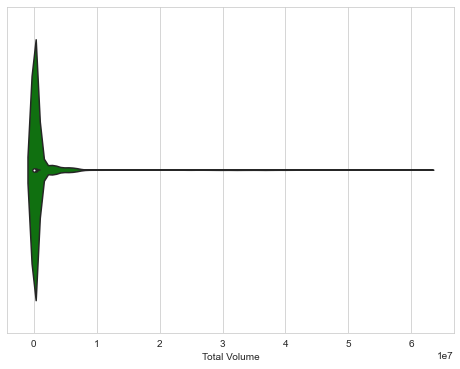

In [45]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Total Volume',data=df,color='green')

Minimum Count 0.0 Maximum Count 22743616.17


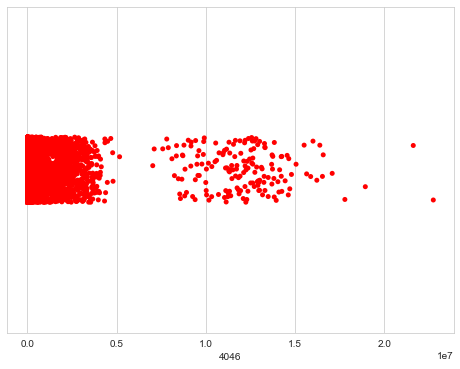

In [46]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,x='4046',color='red')
print("Minimum Count",df['4046'].min(),'Maximum Count',df['4046'].max())

<AxesSubplot:xlabel='4046'>

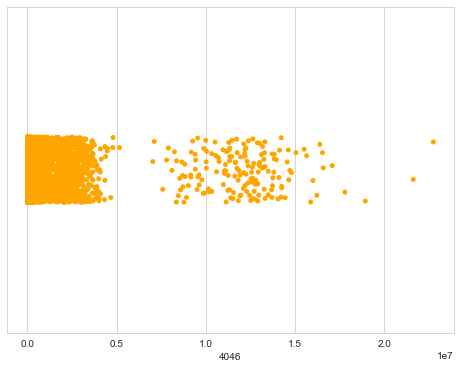

In [47]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,x='4046',color='orange')

<AxesSubplot:ylabel='4225'>

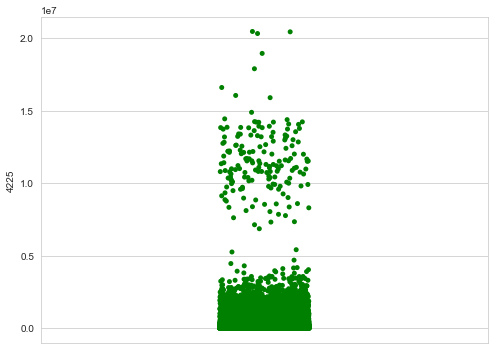

In [48]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,y='4225',color='g')

<AxesSubplot:xlabel='4225'>

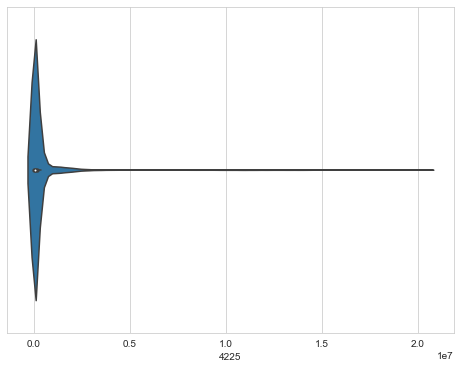

In [49]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='4225')

<AxesSubplot:ylabel='4225'>

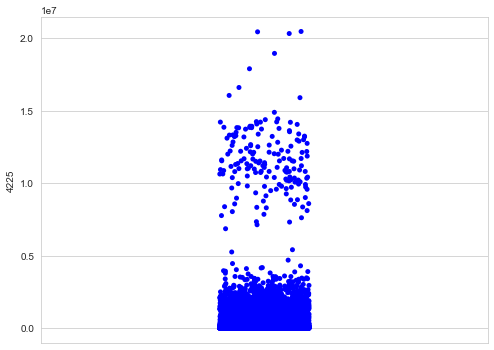

In [50]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,y='4225',color='b')

<AxesSubplot:xlabel='4770'>

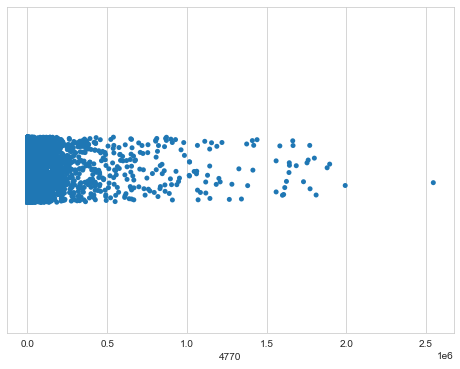

In [51]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,x='4770')

<AxesSubplot:ylabel='Total Bags'>

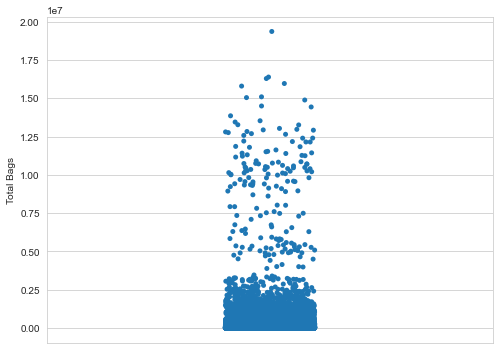

In [52]:
plt.figure(figsize=(8,6))
sns.stripplot(y='Total Bags',data=df)

Minimum Bags Size 0.0 Maximum Bag Size 19373134.37


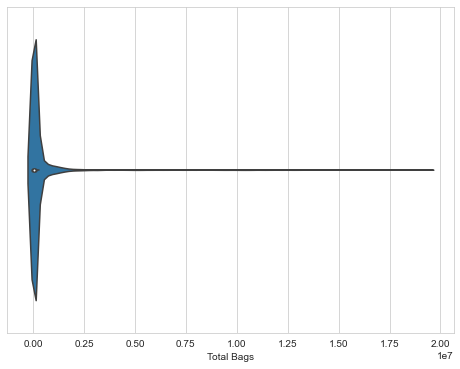

In [53]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='Total Bags')
print("Minimum Bags Size",df['Total Bags'].min(),"Maximum Bag Size",df['Total Bags'].max())

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

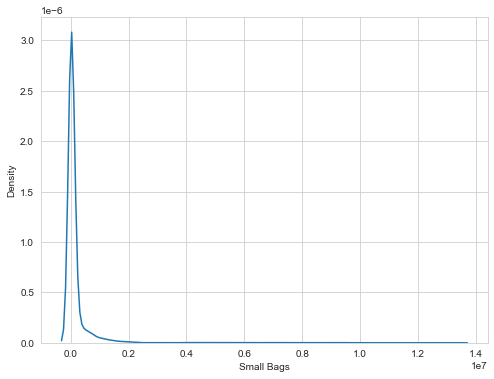

In [54]:
plt.figure(figsize=(8,6))
sns.kdeplot(x='Small Bags',data=df)

Minimum Small Bags Size 0.0 Maximum Small Bag Size 13384586.8


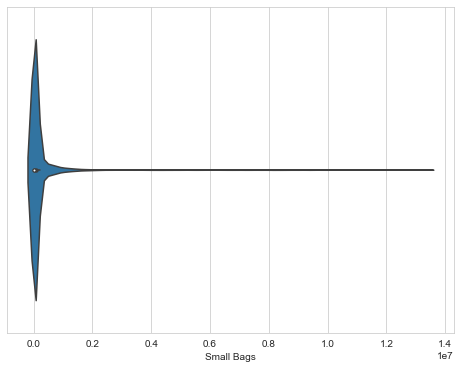

In [55]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='Small Bags')
print("Minimum Small Bags Size",df['Small Bags'].min(),"Maximum Small Bag Size",df['Small Bags'].max())

Minimum Large Bags Size 0.0 Maximum Large Bag Size 5719096.61


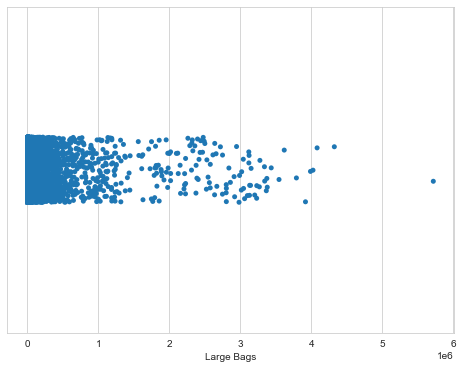

In [56]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,x='Large Bags')
print("Minimum Large Bags Size",df['Large Bags'].min(),"Maximum Large Bag Size",df['Large Bags'].max())

<AxesSubplot:ylabel='Large Bags'>

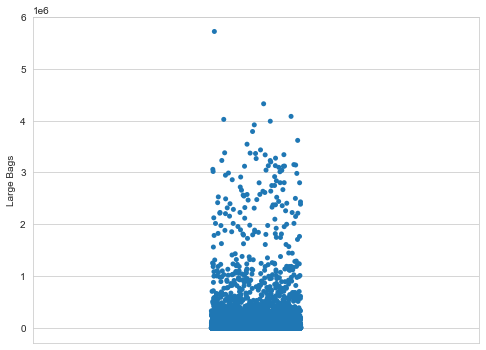

In [57]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,y='Large Bags')

<AxesSubplot:xlabel='XLarge Bags'>

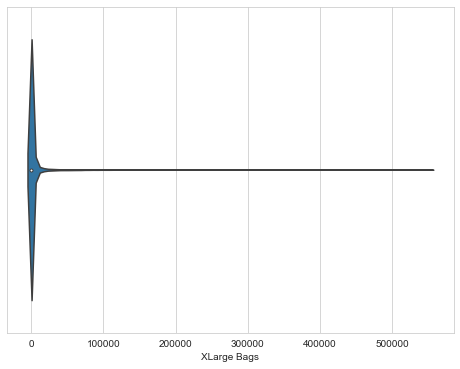

In [58]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df,x='XLarge Bags')

<AxesSubplot:xlabel='XLarge Bags'>

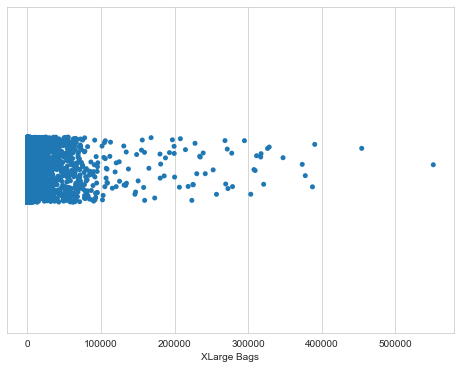

In [59]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df,x='XLarge Bags')

Total Value counts conventional    9126
organic         9123
Name: type, dtype: int64


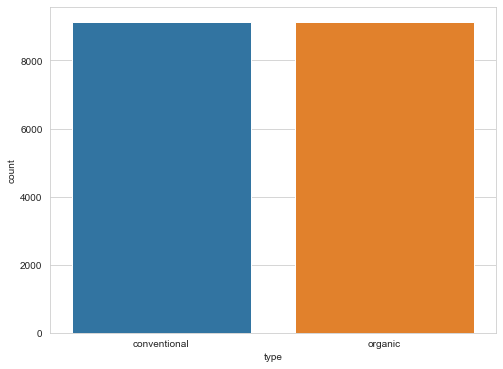

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(x='type',data=df)
print("Total Value counts",df['type'].value_counts())

Total_counts of Convential type is 9126, Organic type is 9123

Total Year counts 2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


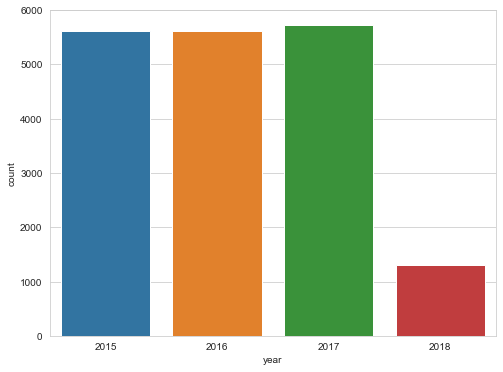

In [61]:
plt.figure(figsize=(8,6))
sns.countplot(x='year',data=df)
print("Total Year counts",df['year'].value_counts())

Observations done per year:(Observations are not equal)

- 2017    5722
- 2016    5616
- 2015    5615
- 2018    1296

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53], dtype=int64),)

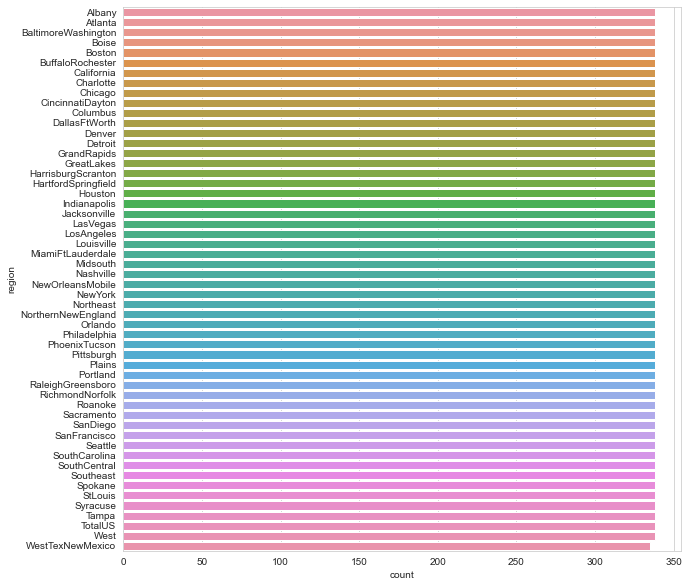

In [62]:
plt.figure(figsize=(10,10))
sns.countplot(y='region',data=df)
np.where(df['region'].value_counts())

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

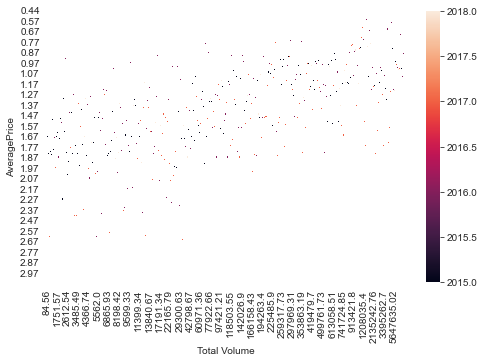

In [63]:
plt.figure(figsize=(8,5))
fruit=df.pivot("AveragePrice",'Total Volume','year')
sns.heatmap(fruit)

# Bi-Variate

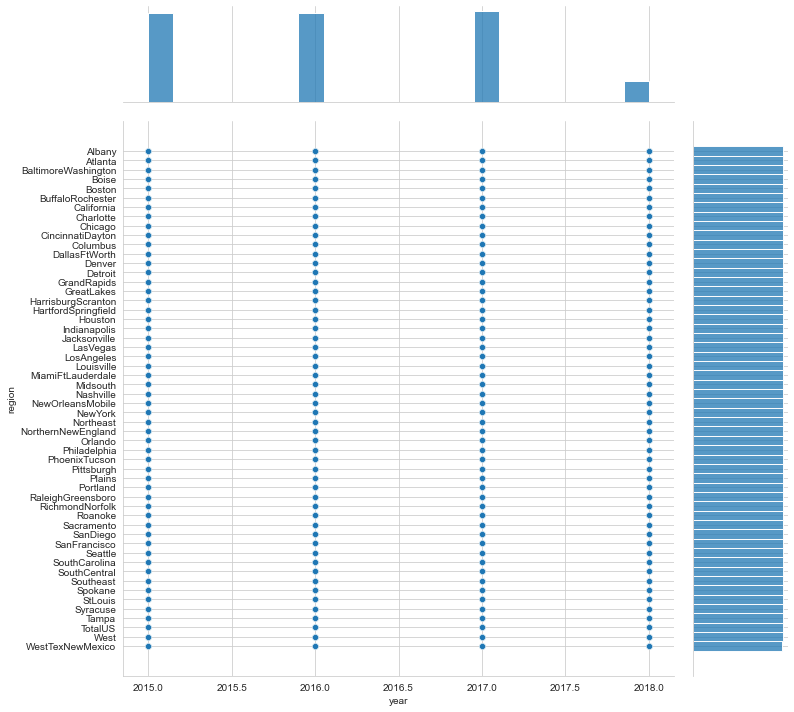

In [64]:
sns.jointplot(y='region',x='year',data=df,height=10)

Demands are increasing 

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

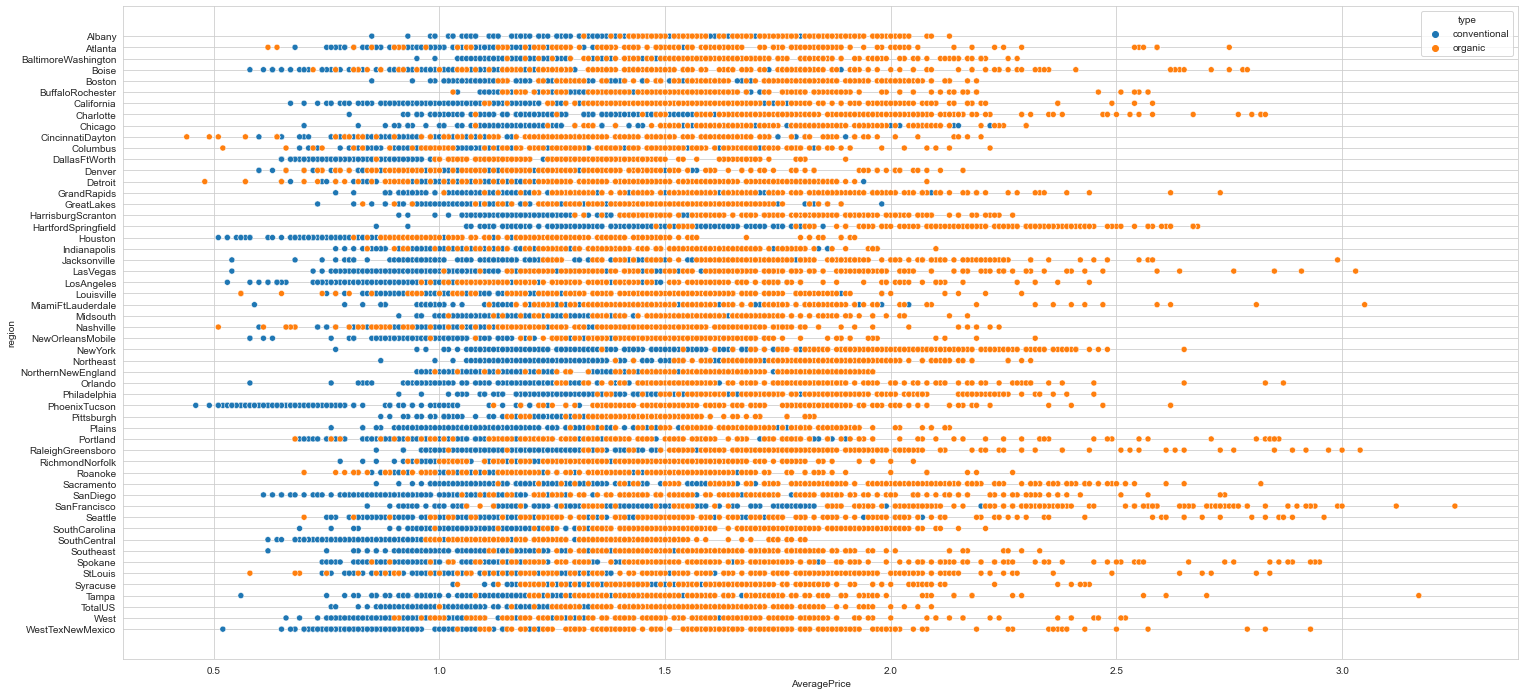

In [65]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='AveragePrice',y='region',hue='type',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

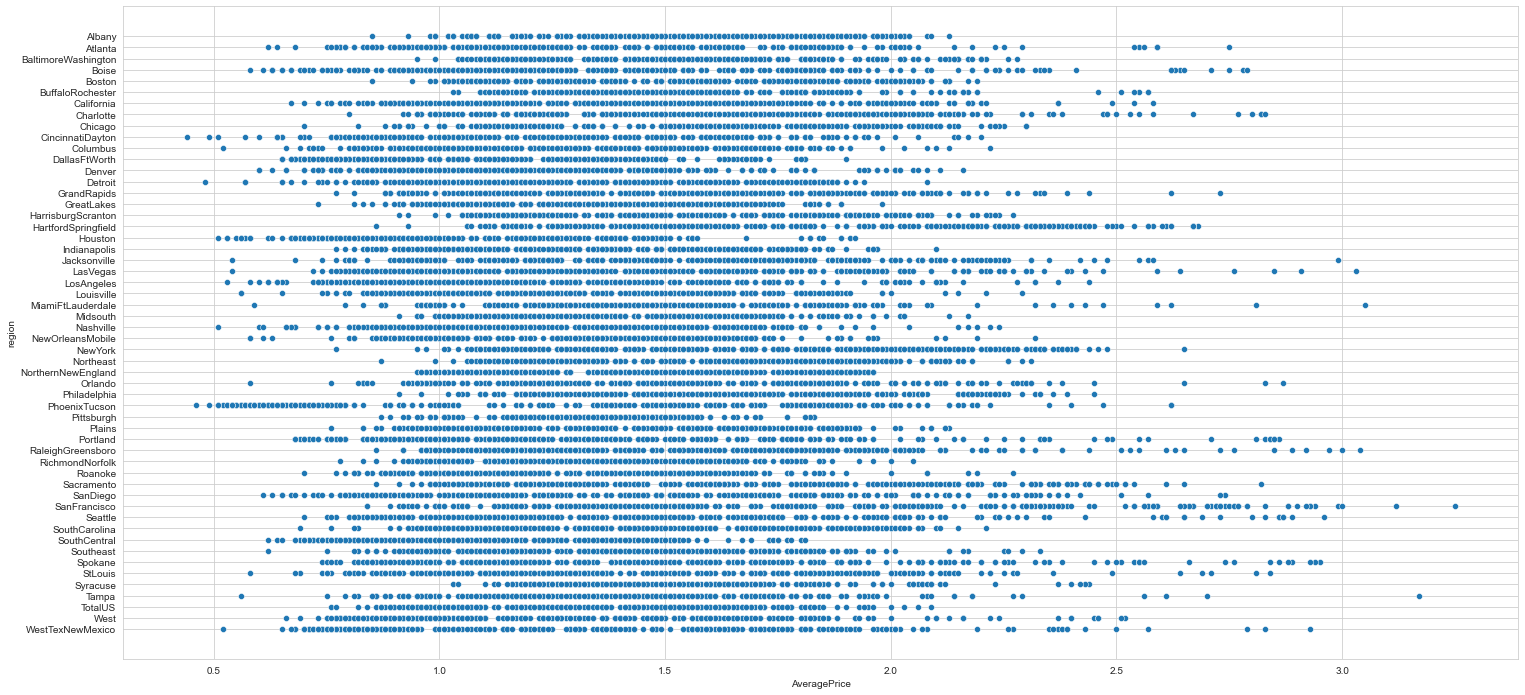

In [66]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='AveragePrice',y='region',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

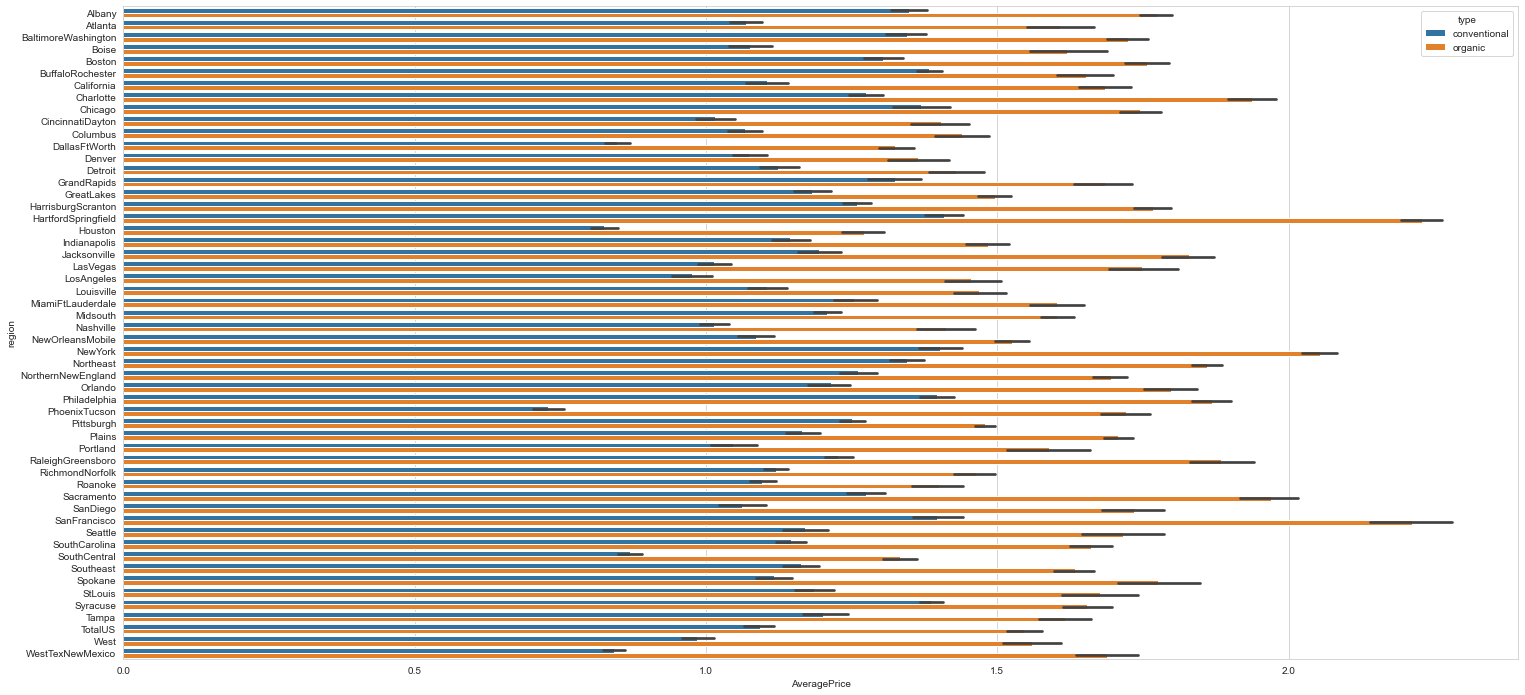

In [67]:
plt.figure(figsize=(25,12))
sns.barplot(x='AveragePrice',y='region',hue='type',data=df)

Average Price of conventional product is less in all region whereas Organic average price are high

### Basis of Volume Purchase

<AxesSubplot:xlabel='Total Volume', ylabel='region'>

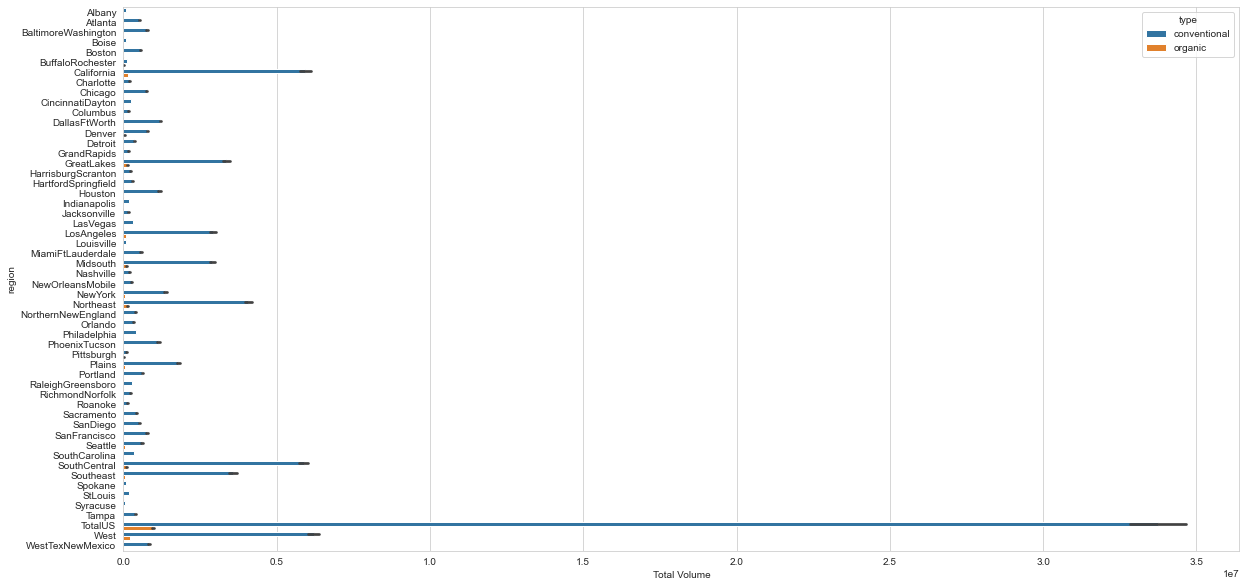

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(x='Total Volume',y='region',hue='type',data=df)

Hugh Conventional Products and in comparision to Organic Products

<AxesSubplot:xlabel='4046', ylabel='region'>

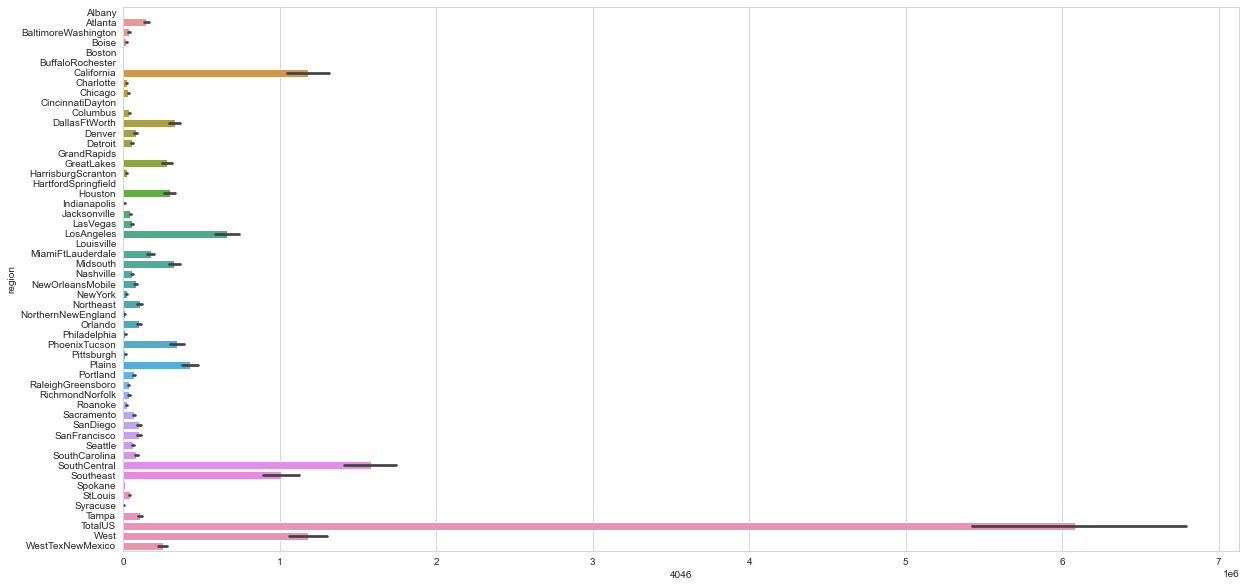

In [69]:
plt.figure(figsize=(20,10))
sns.barplot(y='region',x='4046',data=df)

For product 4046: Demand is highest in TotalUS, followed by Califonia, South Central, West region 

<AxesSubplot:xlabel='4225', ylabel='region'>

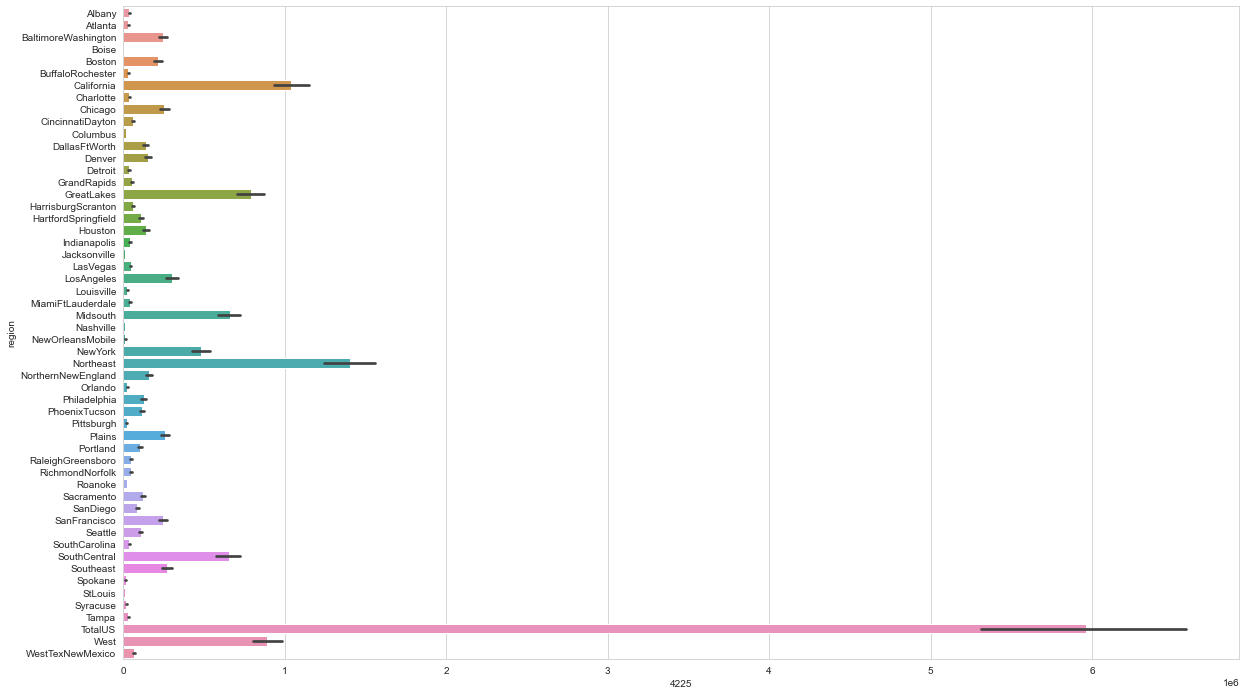

In [70]:
plt.figure(figsize=(20,12))
sns.barplot(y='region',x='4225',data=df)

For product 4225: 
    
    Demand is highest in TotalUS. Followed by Northeast, Califonia, West
    
    SouthCentral have less demand for this category

<AxesSubplot:xlabel='4770', ylabel='region'>

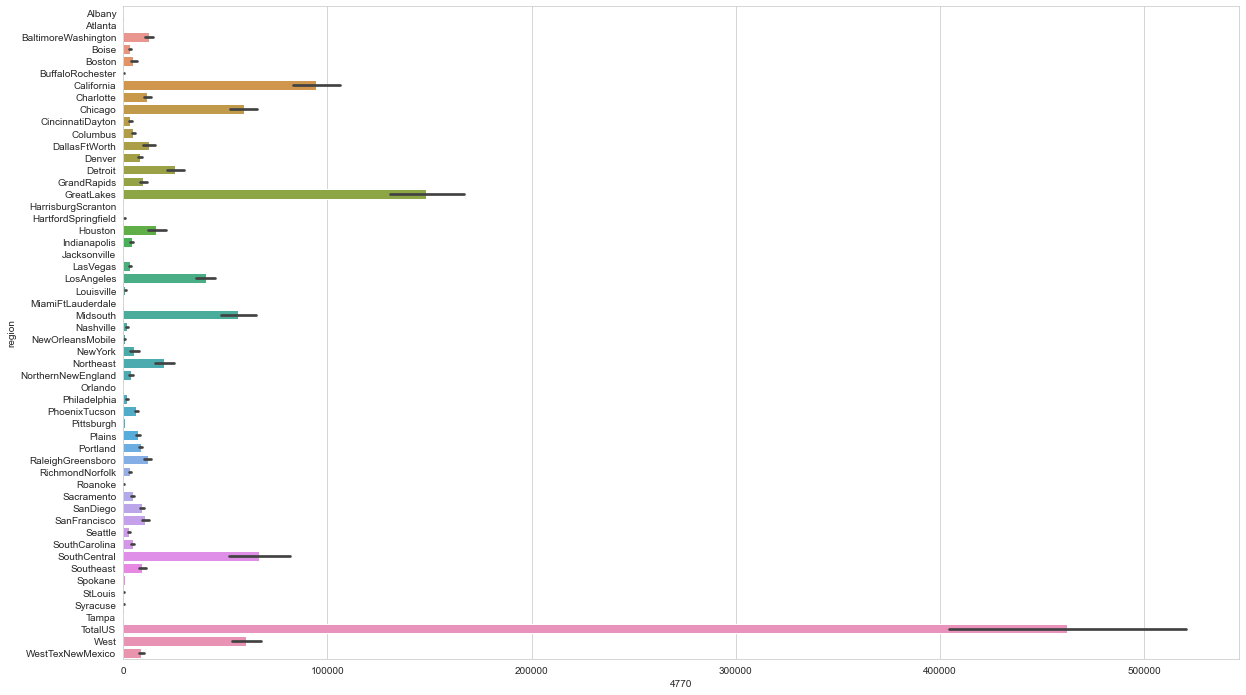

In [71]:
plt.figure(figsize=(20,12))
sns.barplot(y='region',x='4770',data=df)

For product 4770:

Demand is highest in TotalUS. Followed by GreatLakes, Califonia, SouthCentral, West and others

GreatLakes have more demands for this category

### Basis of Bags Purchase

<AxesSubplot:xlabel='Total Bags', ylabel='region'>

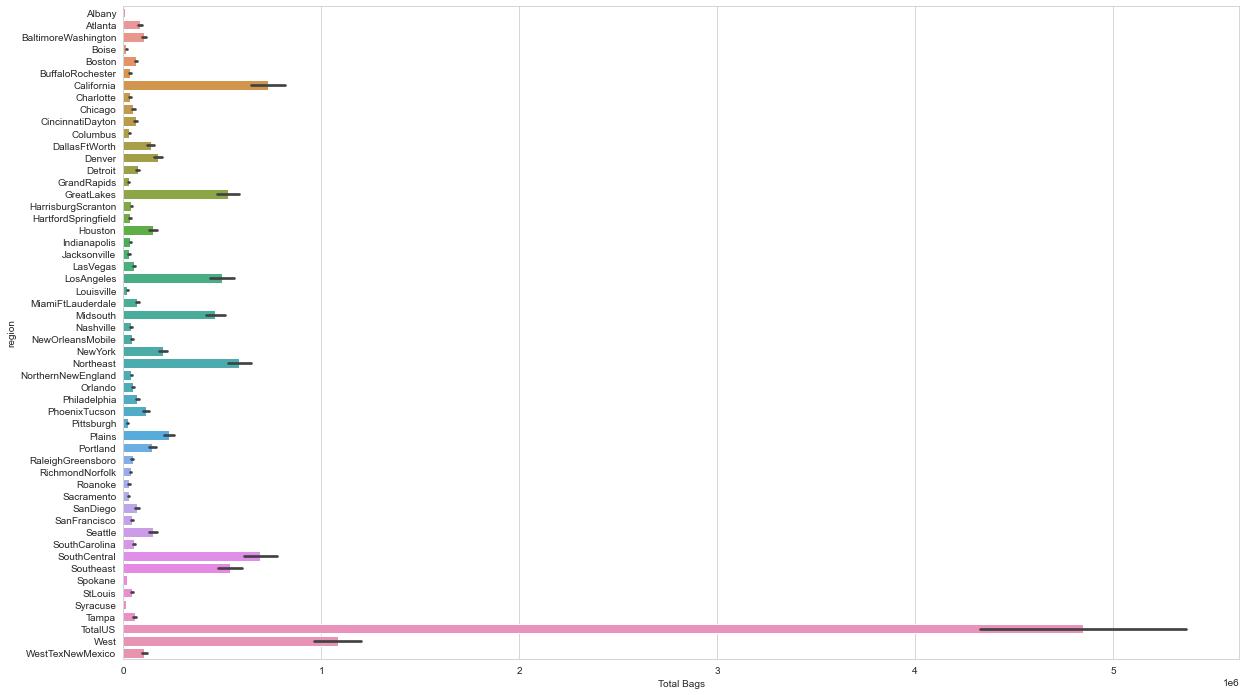

In [72]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,y='region',x='Total Bags')

ForTotal Bags:

Demand is highest in TotalUS. Followed by Northeast, Califonia and West

<AxesSubplot:xlabel='Small Bags', ylabel='region'>

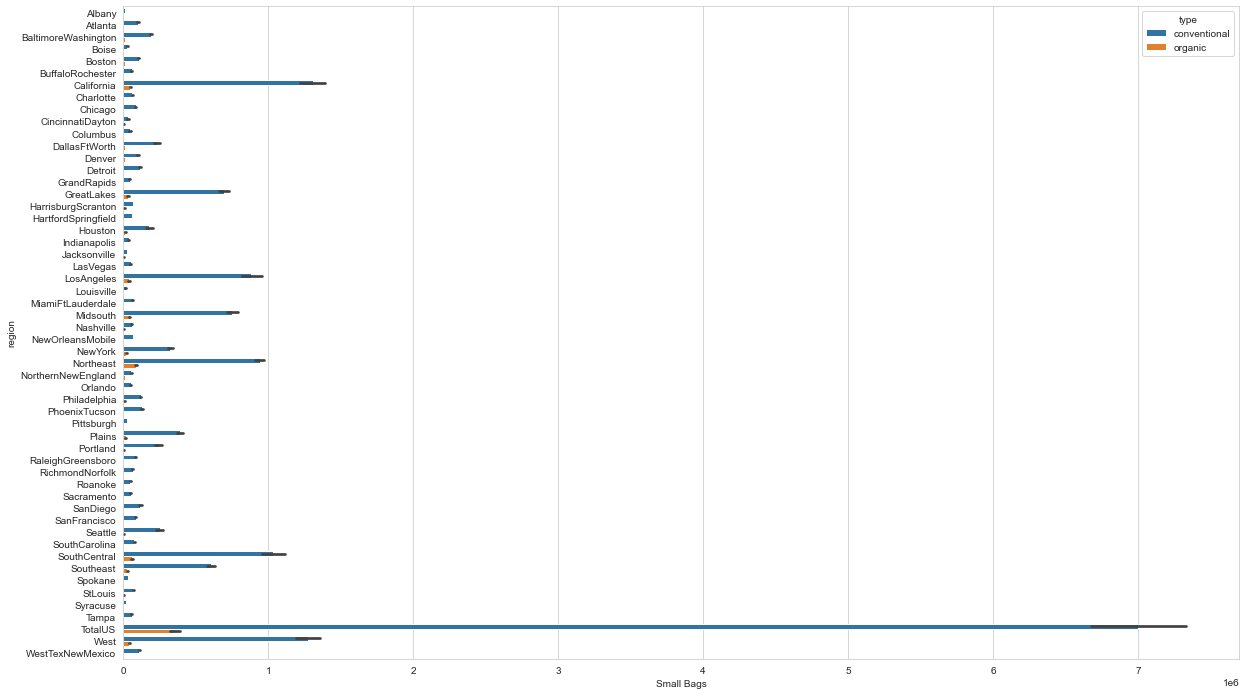

In [73]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,y='region',x='Small Bags',hue='type')

High Purchase of Organic Avocado is done by TotalUS followed by Califonia, West

<AxesSubplot:xlabel='Large Bags', ylabel='region'>

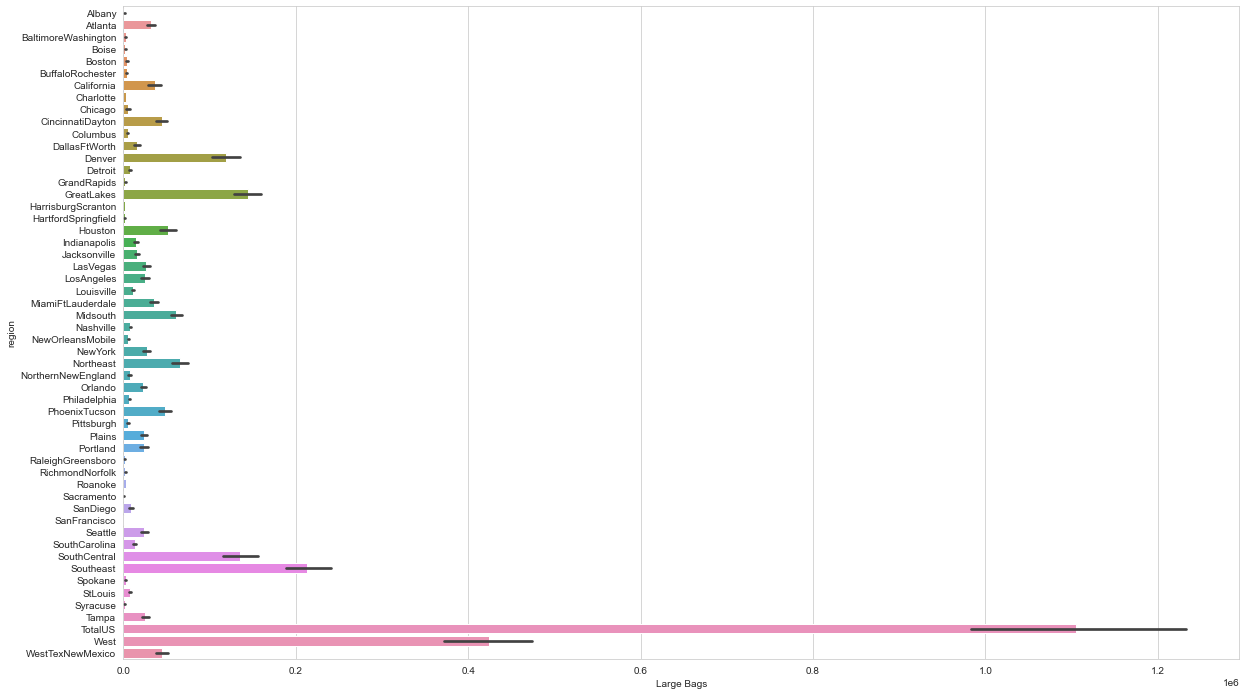

In [74]:
plt.figure(figsize=(20,12))
sns.barplot(y='region',x='Large Bags',data=df)

For Large Bags

Purchase is mostly done by TotalUS, followed by West, Southeast

<AxesSubplot:xlabel='XLarge Bags', ylabel='region'>

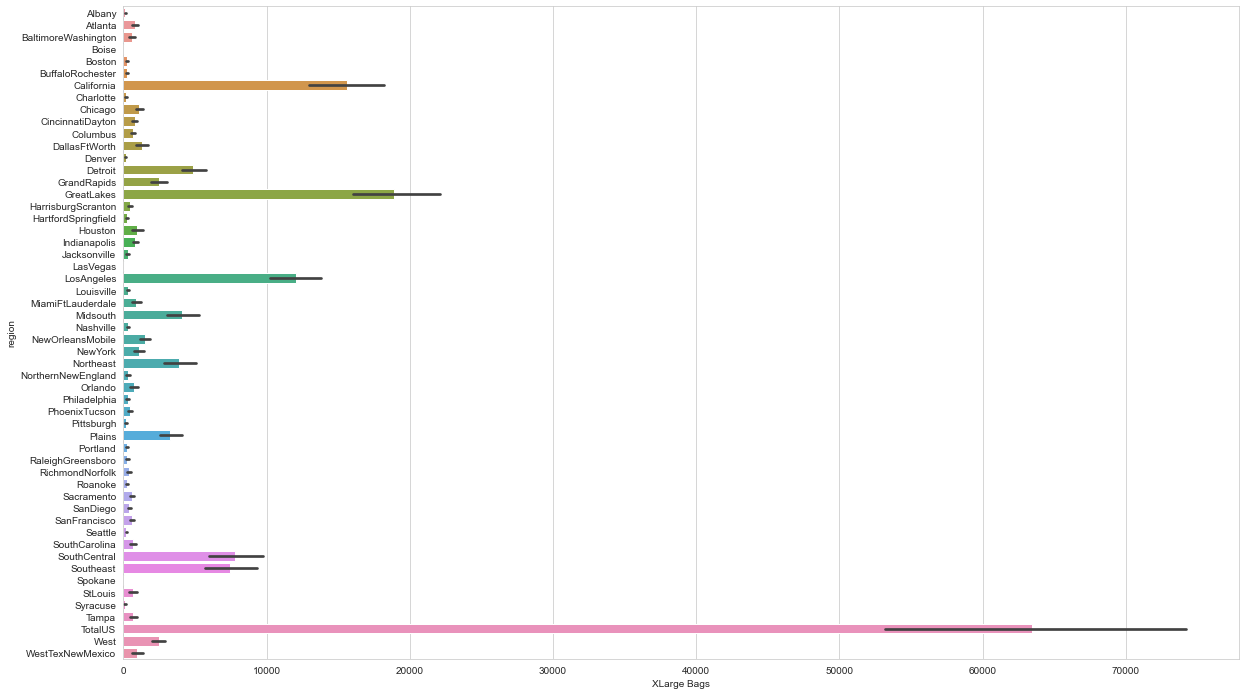

In [75]:
plt.figure(figsize=(20,12))
sns.barplot(x='XLarge Bags',y='region',data=df)

For XLarge Bags:
    Demands are high for TotalUS, followed by GreatLakes,Califonia and Los Angeles

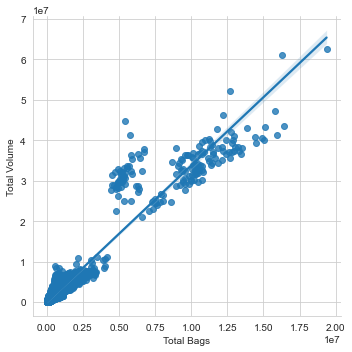

In [76]:
sns.lmplot(x='Total Bags',y='Total Volume',data=df)

With the increase in Total Volume bag size gets increased

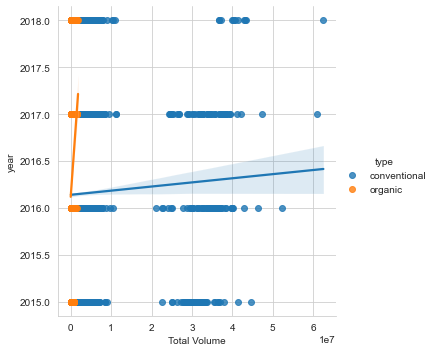

In [77]:
sns.lmplot(x='Total Volume',y='year',hue='type',data=df)

Based on Years the Total Volumes of Conventional Avocado and organic avocado are increasing.

<AxesSubplot:xlabel='Total Volume', ylabel='type'>

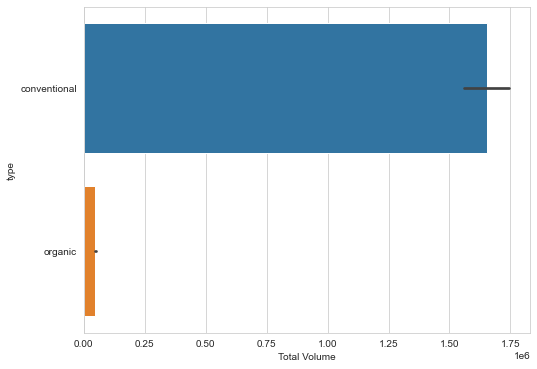

In [78]:
plt.figure(figsize=(8,6))
sns.barplot(x='Total Volume',y='type',data=df)

Total Volume of Maximum Conventional products  and less organic product

<AxesSubplot:xlabel='Total Volume', ylabel='4046'>

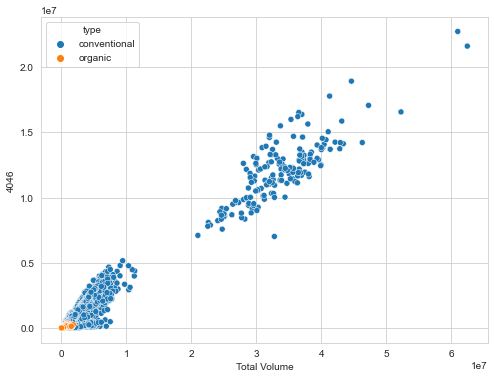

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Volume',y='4046',hue='type',data=df)

Shows +ve relation with Total volume

<AxesSubplot:xlabel='Total Volume', ylabel='4225'>

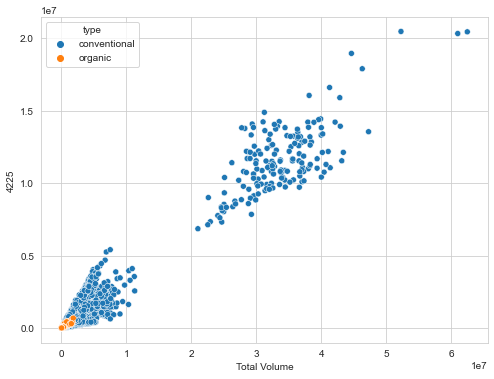

In [80]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Volume',y='4225',hue='type',data=df)

Shows +ve relation with Total volume

<AxesSubplot:xlabel='Total Volume', ylabel='4770'>

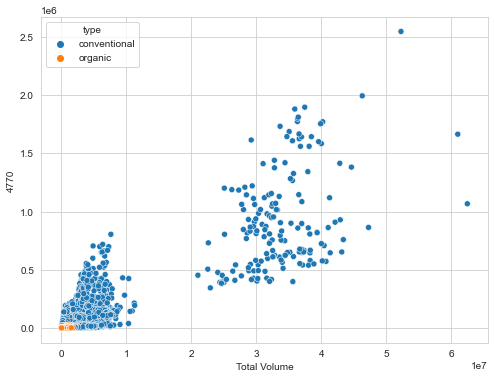

In [81]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Volume',y='4770',hue='type',data=df)

Shows +ve relation with Total volume

<AxesSubplot:xlabel='Total Bags', ylabel='Small Bags'>

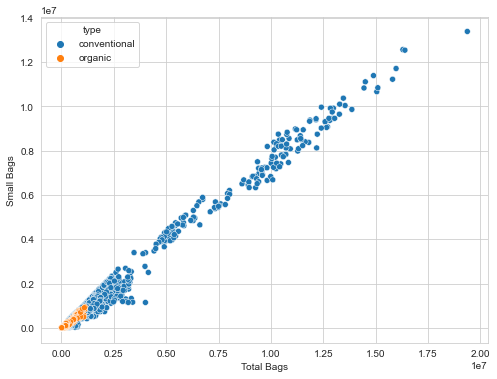

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Bags',y='Small Bags',hue='type',data=df)

Shows +ve relation with Total volume

<AxesSubplot:xlabel='Total Bags', ylabel='Large Bags'>

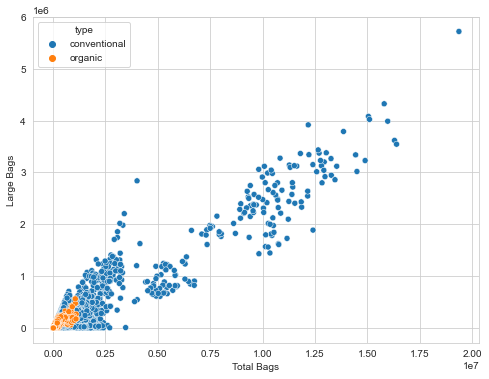

In [83]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Bags',y='Large Bags',hue='type',data=df)

Shows +ve relation with Total volume

<AxesSubplot:xlabel='Total Bags', ylabel='XLarge Bags'>

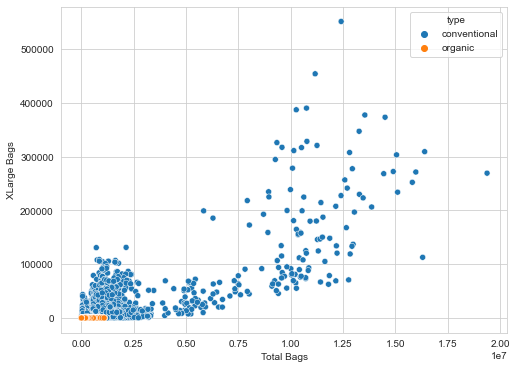

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total Bags',y='XLarge Bags',hue='type',data=df)

Shows +ve relation with Total volume

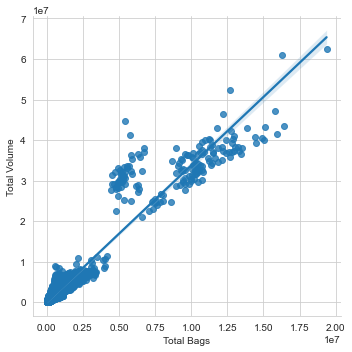

In [85]:
sns.lmplot(x='Total Bags',y='Total Volume',data=df)

Shows +ve relation with Total Bags

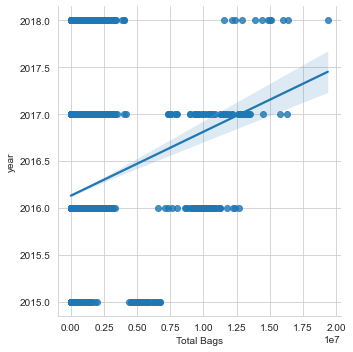

In [86]:
sns.lmplot(x='Total Bags',y='year',data=df)

Shows +ve relation with Total Bags

<Figure size 576x432 with 0 Axes>

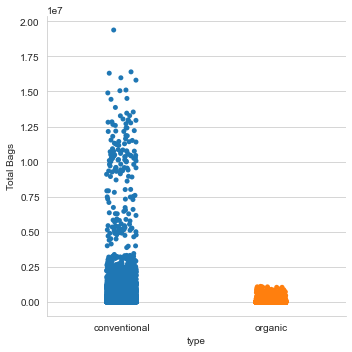

In [87]:
plt.figure(figsize=(8,6))
sns.catplot(y='Total Bags',x='type',data=df)


Convential counts are more than organic

<Figure size 720x576 with 0 Axes>

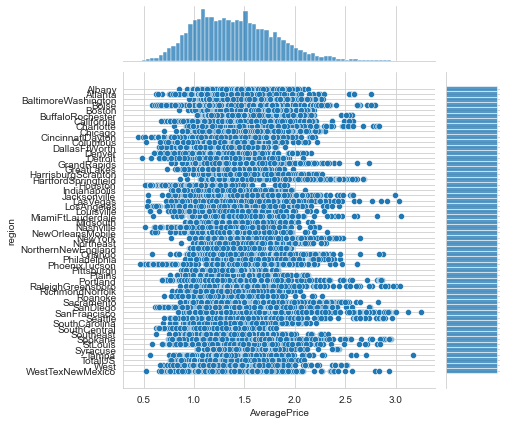

In [88]:
plt.figure(figsize=(10,8))
sns.jointplot(y='region',x='AveragePrice',data=df)

Shows demands per country

### Relation of Average price with other Variables

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

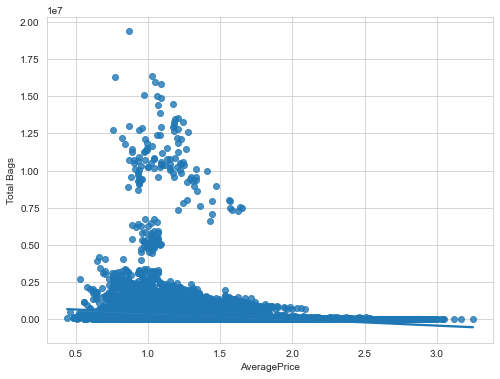

In [89]:
plt.figure(figsize=(8,6))
sns.regplot(x='AveragePrice',y='Total Bags',data=df)

Total Bags Shows negative Relation with Average Price

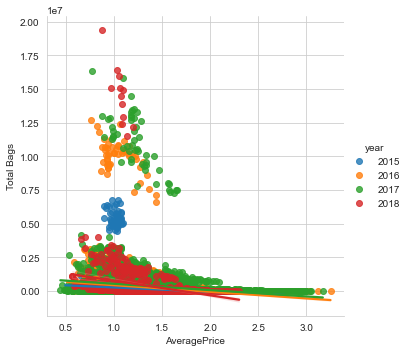

In [90]:
sns.lmplot(x='AveragePrice',y='Total Bags',hue='year',data=df)

Their is always an increase in Average Price Per Year

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

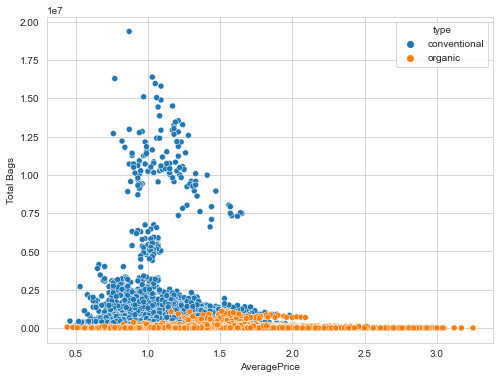

In [91]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='AveragePrice',y='Total Bags',hue='type',data=df)

Demands of Conventional Product is more than organic Product

<Figure size 576x432 with 0 Axes>

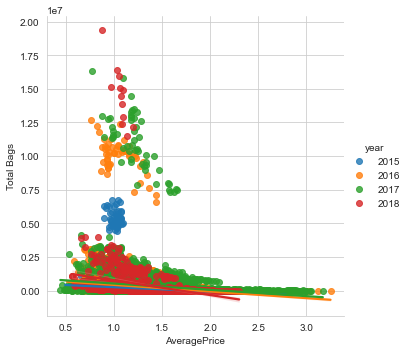

In [92]:
plt.figure(figsize=(8,6))
sns.lmplot(x='AveragePrice',y='Total Bags',hue='year',data=df)

Conventional Demands are more than Organic

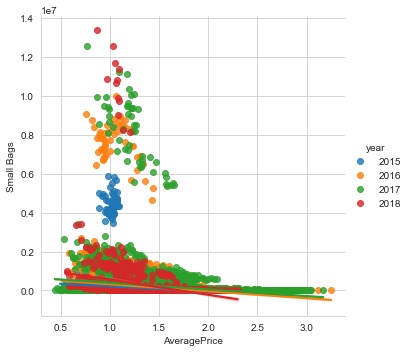

In [93]:
sns.lmplot(x='AveragePrice',y='Small Bags',hue='year',data=df)

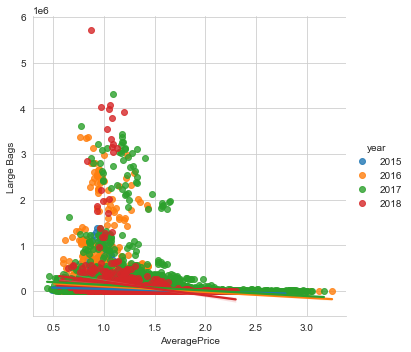

In [94]:
sns.lmplot(x='AveragePrice',y='Large Bags',hue='year',data=df)

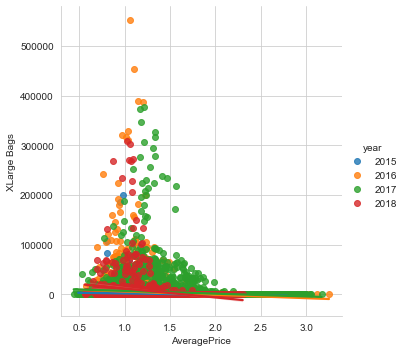

In [95]:
sns.lmplot(x='AveragePrice',y='XLarge Bags',hue='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

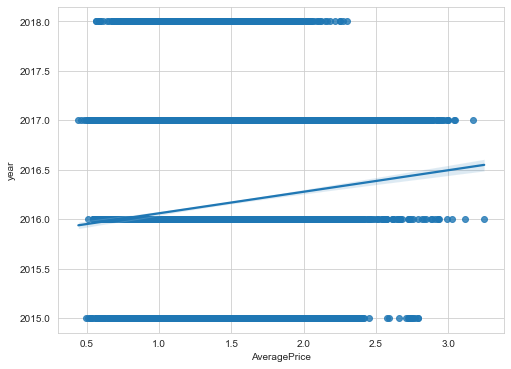

In [96]:
plt.figure(figsize=(8,6))
sns.regplot(x='AveragePrice',y='year',data=df)

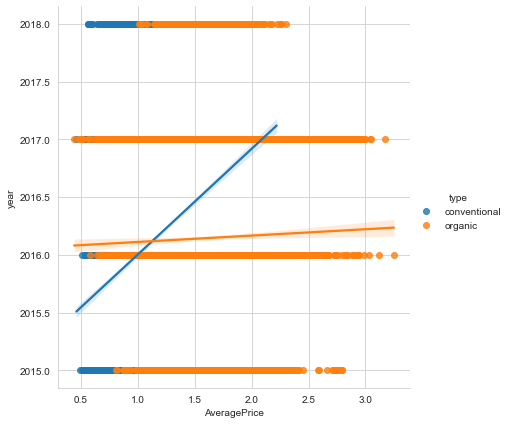

In [97]:
sns.lmplot(x='AveragePrice',y='year',hue='type',data=df,height=6)

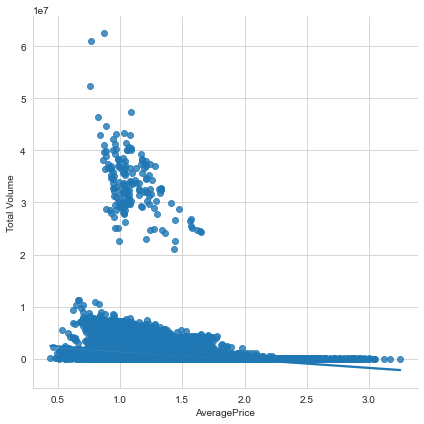

In [98]:
sns.lmplot(x='AveragePrice',y='Total Volume',data=df,height=6)

<AxesSubplot:xlabel='AveragePrice', ylabel='4046'>

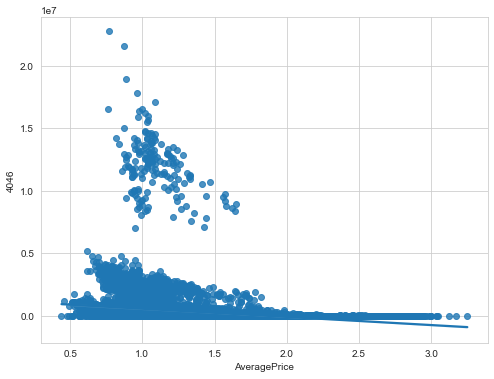

In [99]:
plt.figure(figsize=(8,6))
sns.regplot(x='AveragePrice',y='4046',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='4225'>

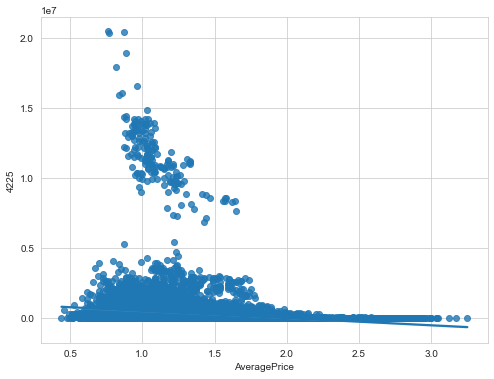

In [100]:
plt.figure(figsize=(8,6))
sns.regplot(x='AveragePrice',y='4225',data=df)

<Figure size 576x432 with 0 Axes>

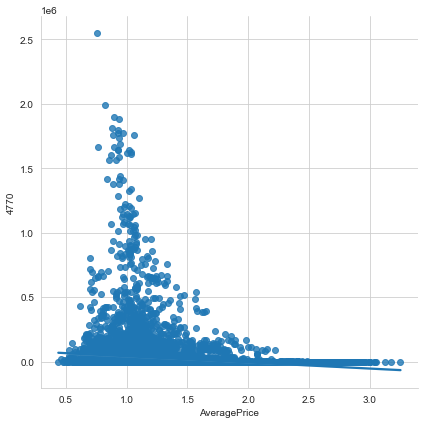

In [101]:
plt.figure(figsize=(8,6))
sns.lmplot(x='AveragePrice',y='4770',data=df,height=6)

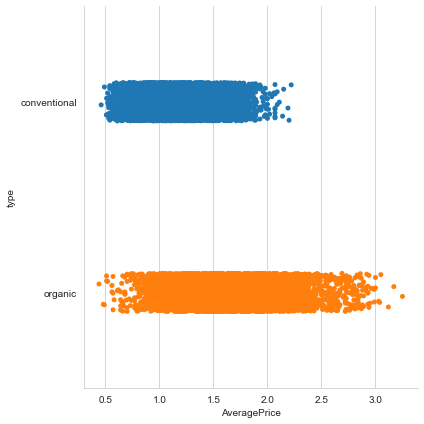

In [102]:
sns.catplot(x='AveragePrice',y='type',data=df,height=6)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

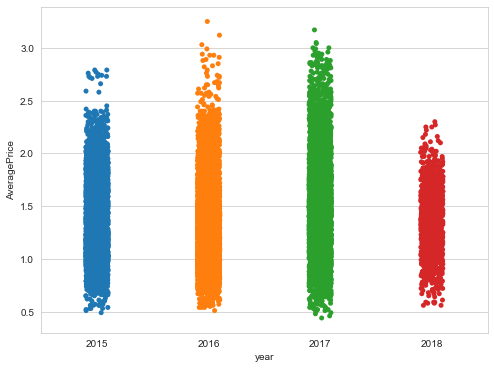

In [103]:
plt.figure(figsize=(8,6))

sns.stripplot(y='AveragePrice',x='year',data=df)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

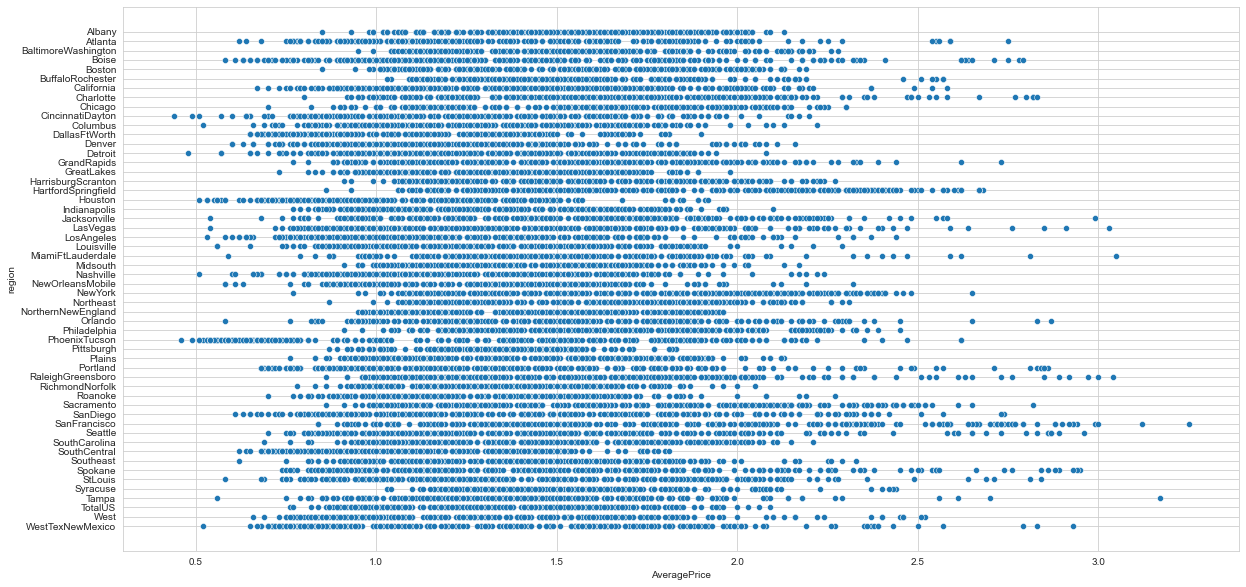

In [104]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='AveragePrice',y='region',data=df)

# Multivariate Analysis

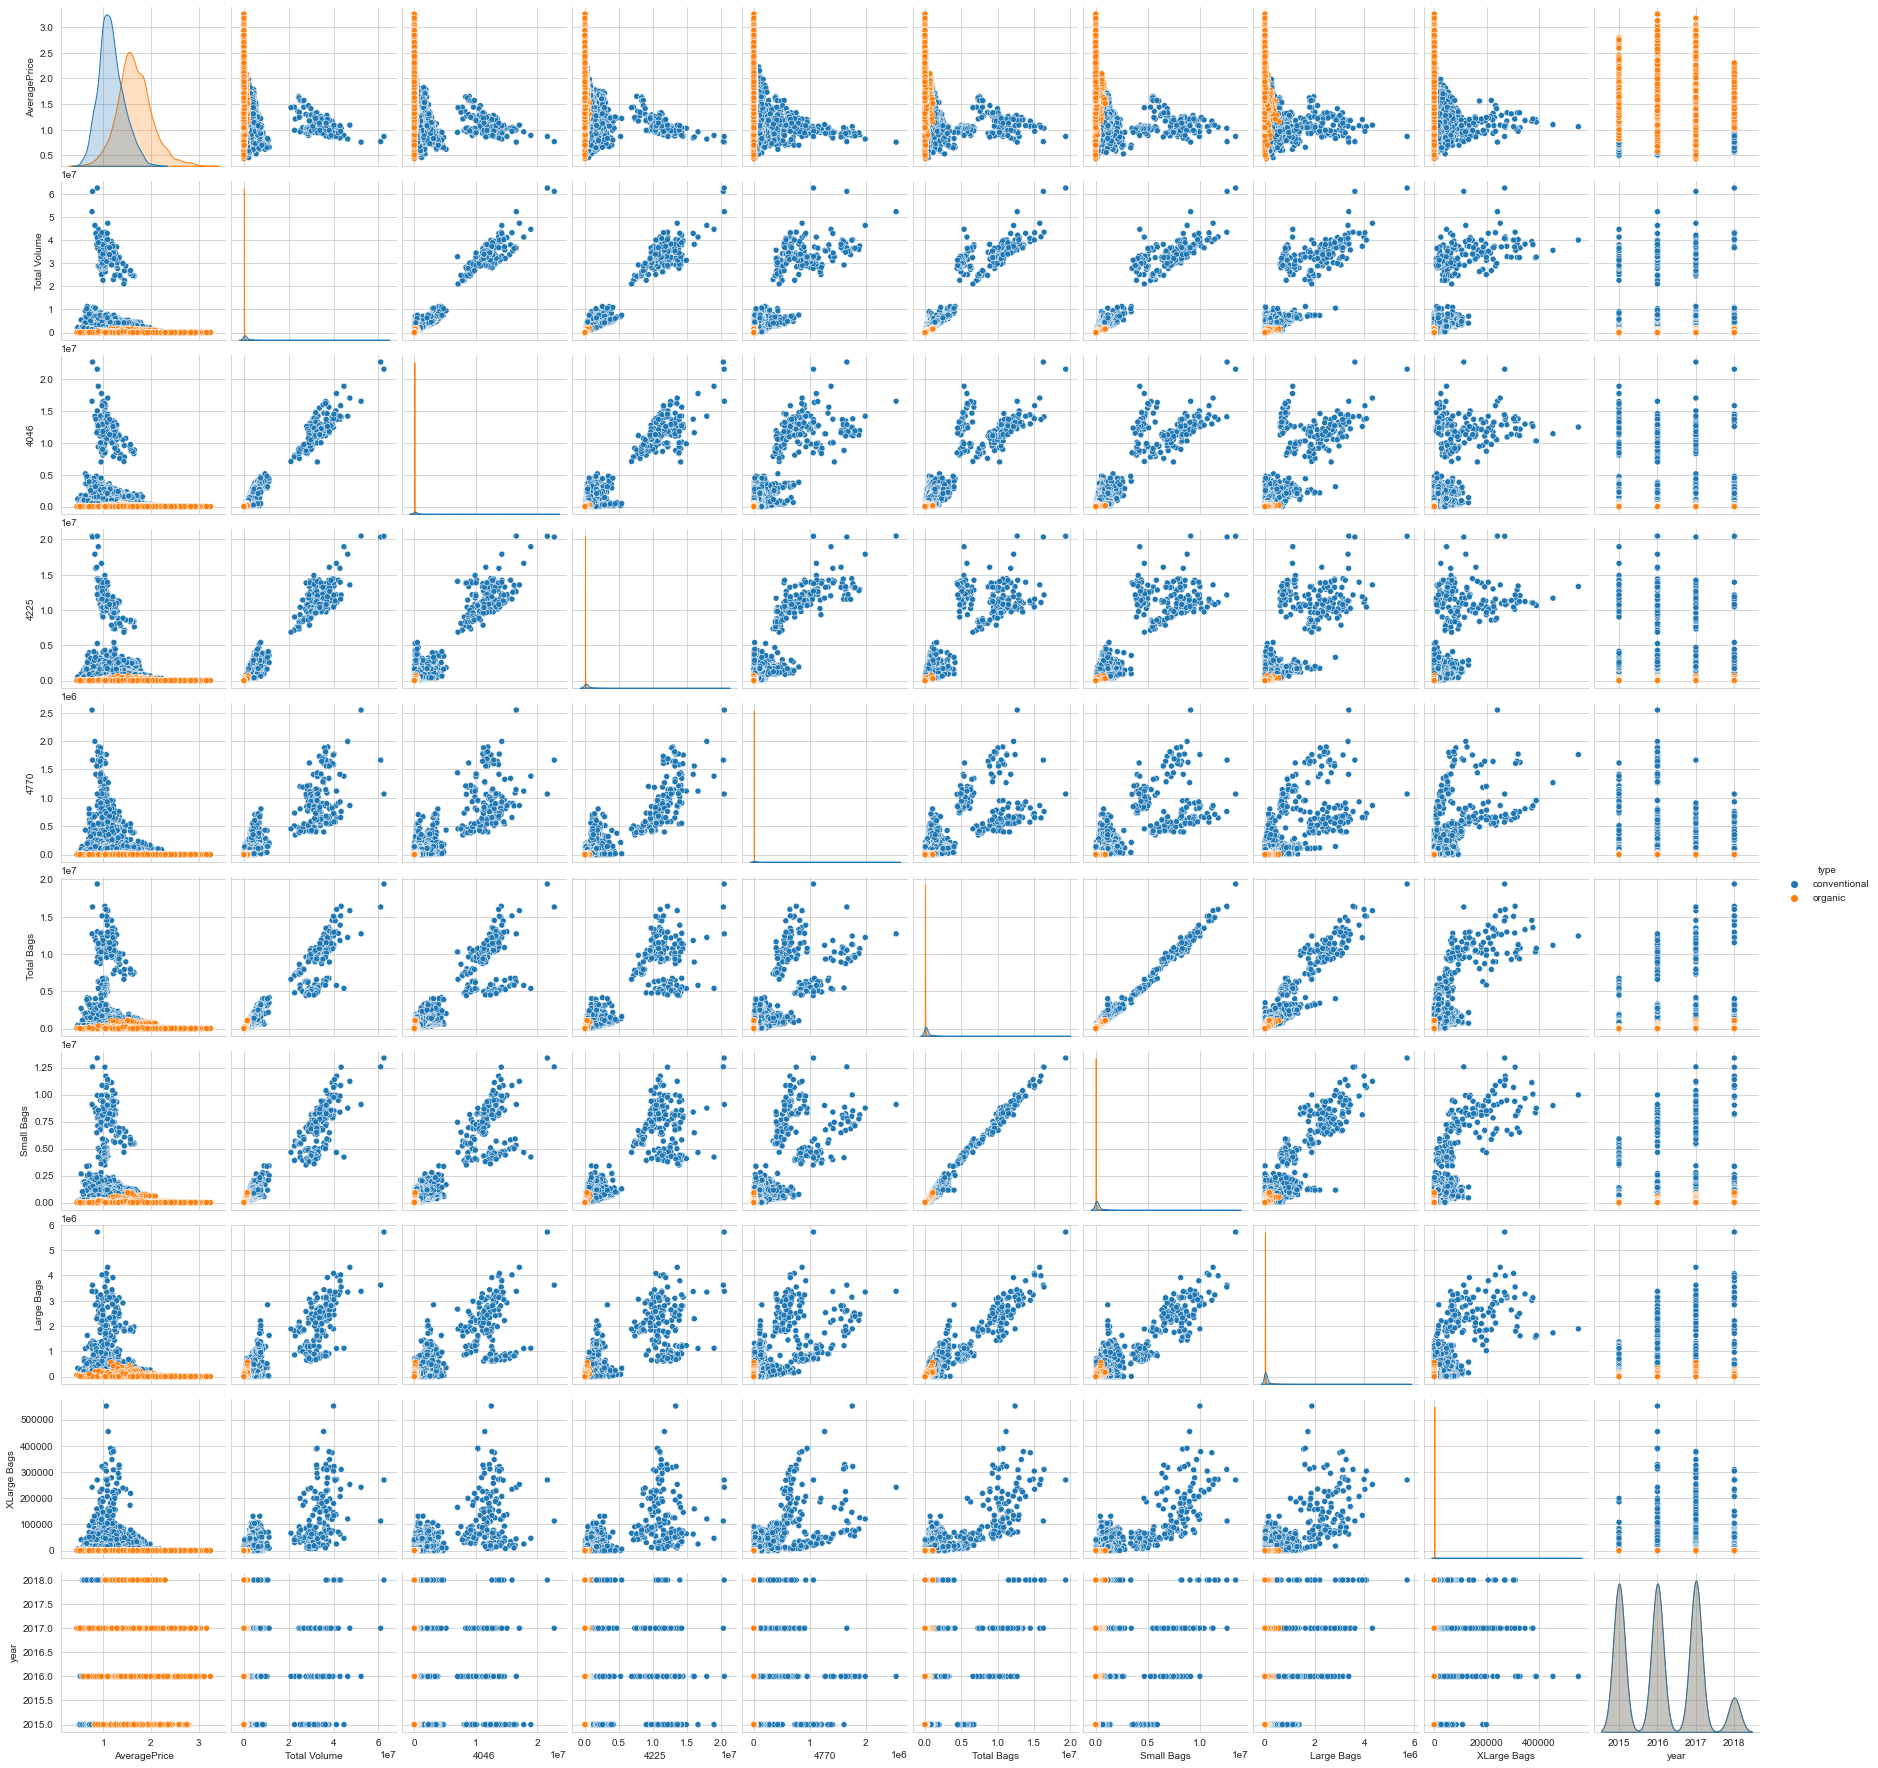

In [105]:
sns.pairplot(data=df,hue='type')

# Using Label Encoder

In [106]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [107]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [108]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['type','region']

for i in list1:
    df[i]=le.fit_transform(df[i])

In [109]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [110]:
df['type'].unique()

array([0, 1])

From this point one part will be taken

1. Classification
2. Regression

# Working with Classification Model

# Descriptive Statistics

In [111]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

<AxesSubplot:>

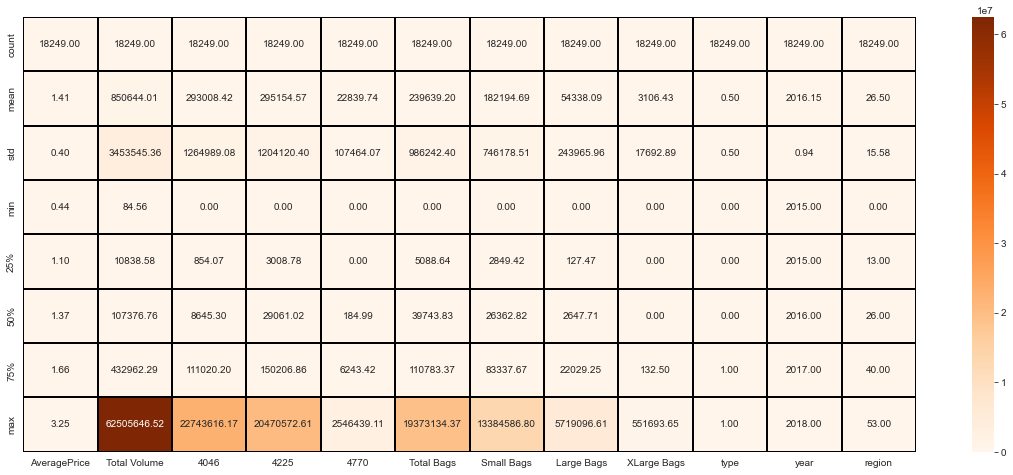

In [112]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),annot=True,linewidth=0.02,linecolor='Black',square=False,fmt='0.2f',cmap='Oranges')

Text(0.5, 1.0, 'DESCRIPTION CHART')

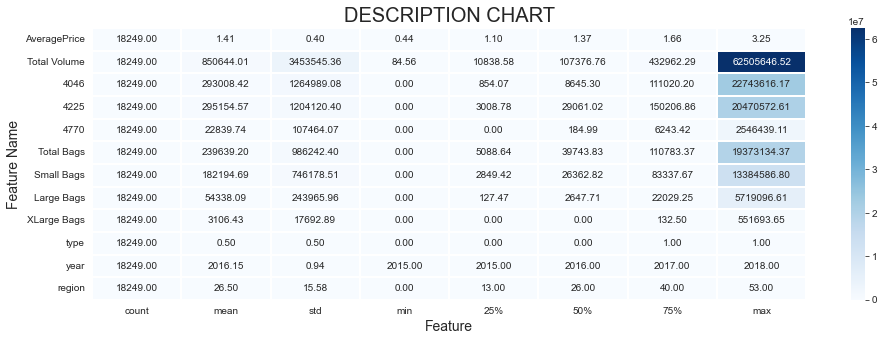

In [113]:
plt.figure(figsize=(16,5))
sns.heatmap(round(df.describe()[:].transpose(),2),annot=True,square=False,fmt=('0.2f'),linewidth=0.02,linecolor='white',cmap='Blues')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Feature Name",fontsize=14)
plt.title("DESCRIPTION CHART",fontsize=20)

### About Columns:
------------------------
1. Null Values: No Null Values

2. Right Skewed: Average Price,Total Volume,4026,4255,4770,Total Bags,Small Bags,Large Bags,XLarge Bags, type, 2016,region

3. Left Skewed: Nil

4. Standard Deviation: Total Volume,4026,4255,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,

5. Outliers: Total Volume,4026,4255,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,

# Correlations

In [114]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   

                  year    region  
AveragePrice  0.093197 -0.011716  
Total Volume  0.017193  0.174176  
4046          0.003353  0.192073  
4225         -0.009559  0.145726  
4770         -0.036531  0.095252  
Total Bags    0.071552  0.175256  
Small Bags    0.063915  0.164702  
Large Bags    0.087891  0.198768  
XLarge Bags   0.081033  0.082281  
type         -0.000032 -0.000280  
year          1.000000 -0.000055  
region       -0.000055  1.000000

Text(0.5, 1.0, 'COR-RELATION')

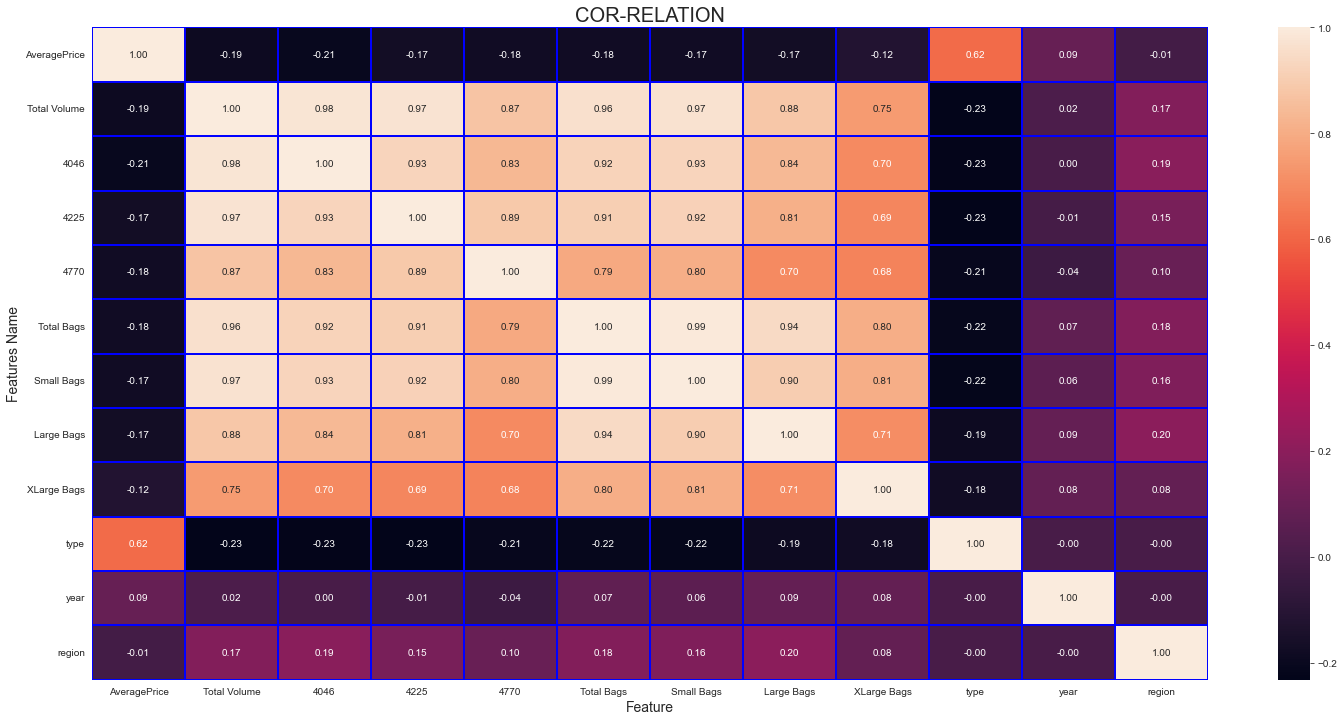

In [115]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.02,linecolor='blue',fmt='0.2f')
plt.xlabel("Feature",fontsize=14)
plt.ylabel('Features Name',fontsize=14)
plt.title('COR-RELATION',fontsize=20)

In [116]:
df.corr().region.sort_values()

AveragePrice   -0.011716
type           -0.000280
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

# Observations

1. Average Price is negatively 1 percentage correlated with target variable is week bond.
2. Type is negatively correlated with target variable.
3. year is negatively correlated with target variable.
4. XLarge Bags is 8 percentage correlated with target variable.
5. 4770 is 9 percentage positively correlated with target variable.
6. 4225 is 15 percetage correlated with target variable.
7. Small Bags is 16 percentage correlated with target variable.
8. Total Volume is 17 percentage correlated with target variable
9. Total Bags is 17 percentage correlated with target variable.
10. 4046 is 19 percentage correlated with target variable.
11. Large Bags is 19 percentage correlated with target variable.

Text(0.5, 1.0, 'CORRELATION')

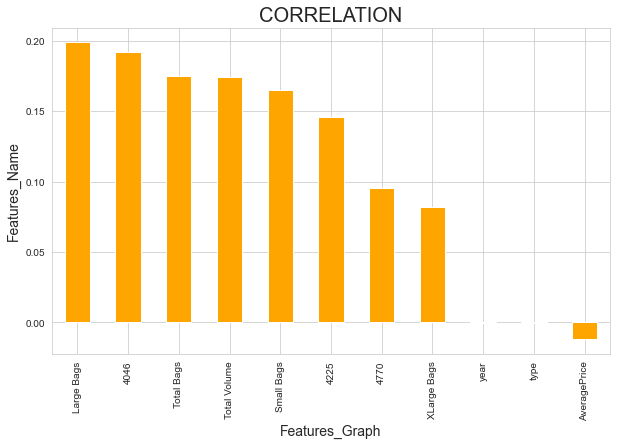

In [117]:
plt.figure(figsize=(10,6))
df.corr()['region'].sort_values(ascending=False).drop('region').plot(kind='bar',color='orange')
plt.xlabel("Features_Graph",fontsize=14)
plt.ylabel("Features_Name",fontsize=14)
plt.title("CORRELATION",fontsize=20)

# Outliers

<AxesSubplot:ylabel='AveragePrice'>

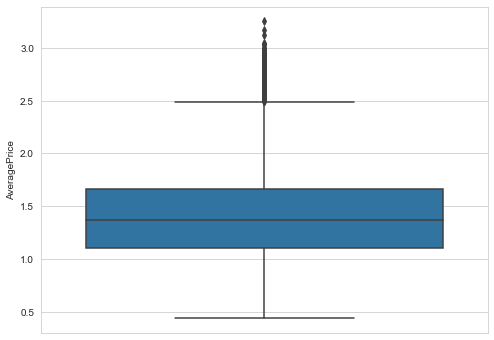

In [118]:
plt.figure(figsize=(8,6))
sns.boxplot(y='AveragePrice',data=df)

<AxesSubplot:xlabel='Total Volume'>

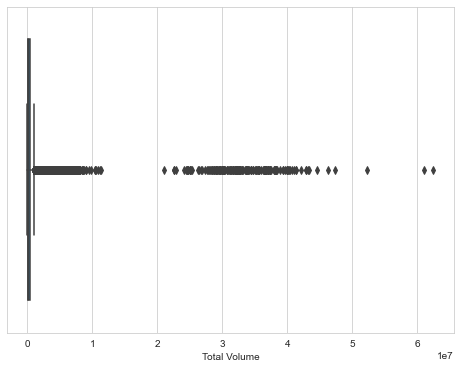

In [119]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Total Volume',data=df)

<AxesSubplot:xlabel='4046'>

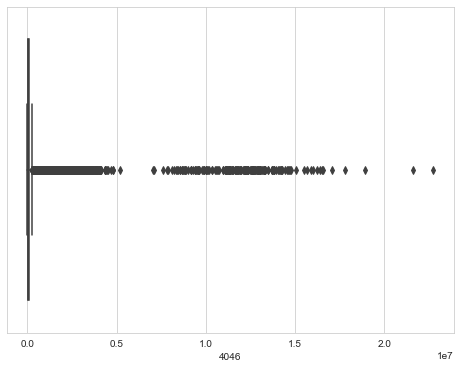

In [120]:
plt.figure(figsize=(8,6))
sns.boxplot(x='4046',data=df)

<AxesSubplot:xlabel='4770'>

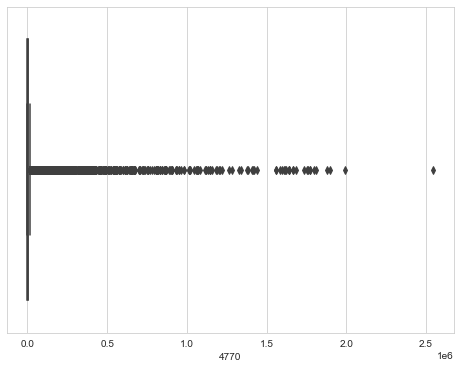

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(x='4770',data=df)

<AxesSubplot:xlabel='Total Bags'>

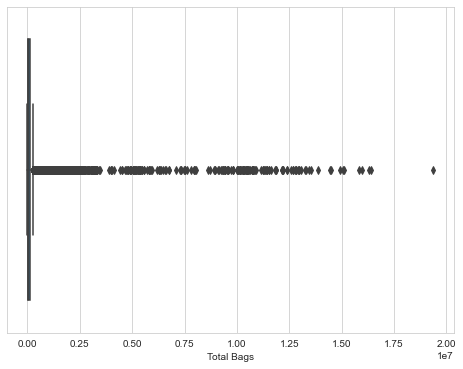

In [122]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Total Bags',data=df)

<AxesSubplot:xlabel='Small Bags'>

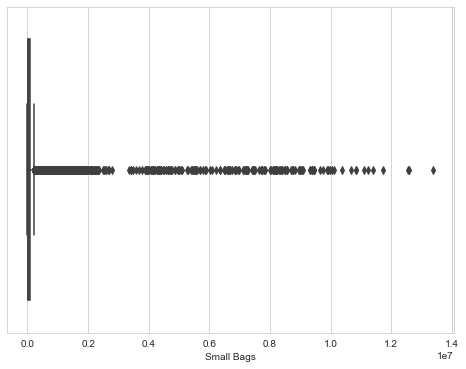

In [123]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Small Bags',data=df)

<AxesSubplot:xlabel='Large Bags'>

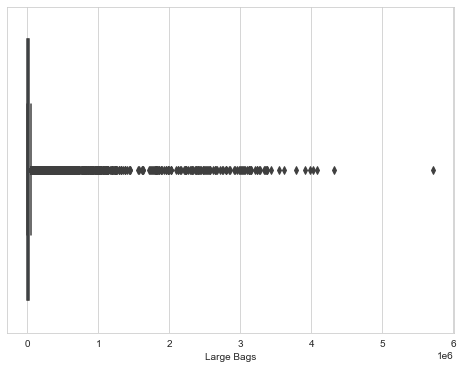

In [124]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Large Bags',data=df)

<AxesSubplot:xlabel='XLarge Bags'>

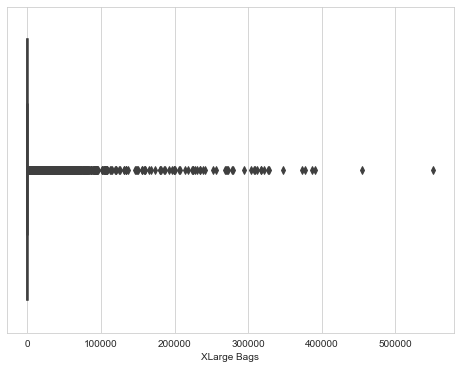

In [125]:
plt.figure(figsize=(8,6))
sns.boxplot(x='XLarge Bags',data=df)

<AxesSubplot:ylabel='type'>

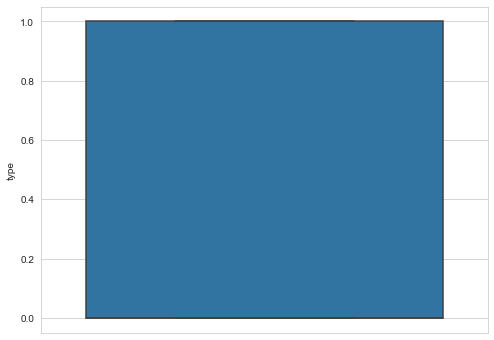

In [126]:
plt.figure(figsize=(8,6))
sns.boxplot(y='type',data=df)

<AxesSubplot:ylabel='year'>

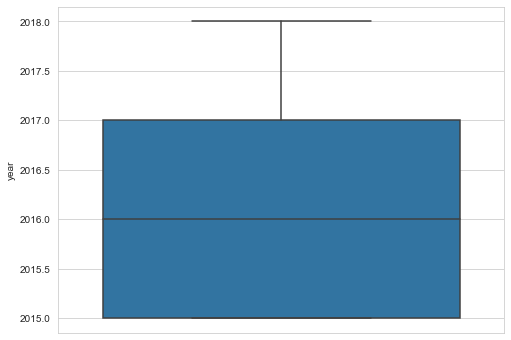

In [127]:
plt.figure(figsize=(8,6))
sns.boxplot(y='year',data=df)

<AxesSubplot:ylabel='region'>

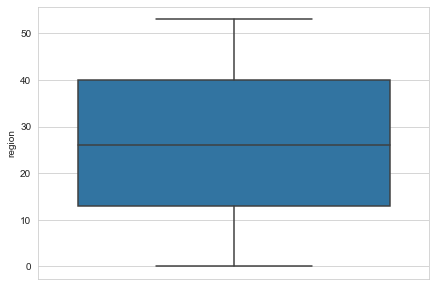

In [128]:
plt.figure(figsize=(7,5))
sns.boxplot(y='region',data=df)

# Skewness

In [129]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Outcome shows: Skewness Threshold is taken is(+/-65)
    
1. Total Volume
2. 4046
3. 4225 
4. 4770
5. Total Bags
6. Small Bags
7. Large Bags
8. XLarge Bags

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

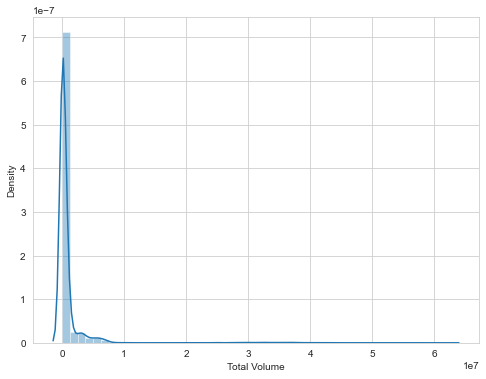

In [130]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Volume'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4046', ylabel='Density'>

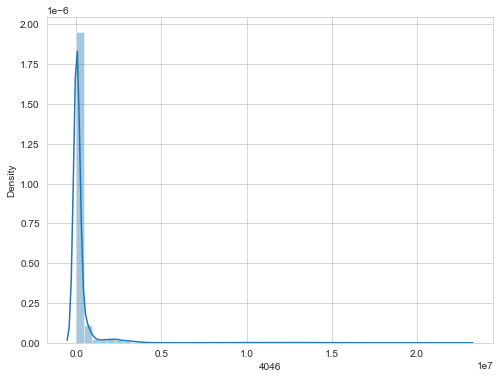

In [131]:
plt.figure(figsize=(8,6))
sns.distplot(df['4046'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4225', ylabel='Density'>

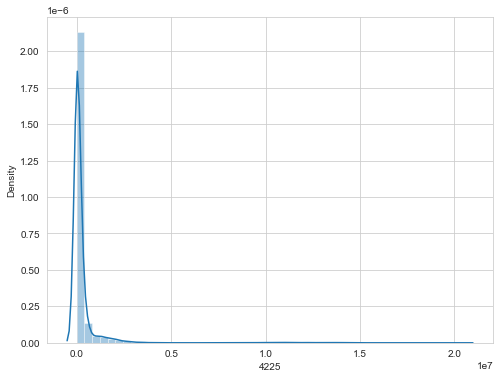

In [132]:
plt.figure(figsize=(8,6))
sns.distplot(df['4225'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4770', ylabel='Density'>

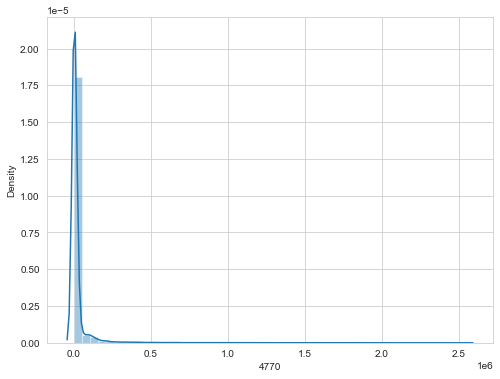

In [133]:
plt.figure(figsize=(8,6))
sns.distplot(df['4770'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

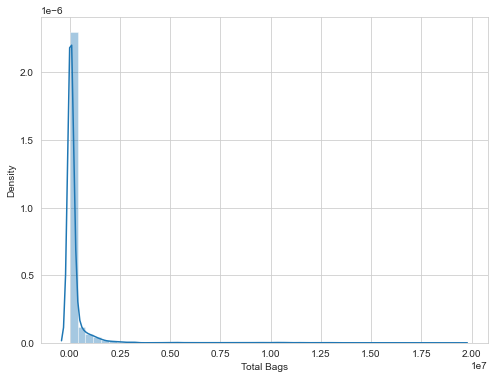

In [134]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total Bags'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

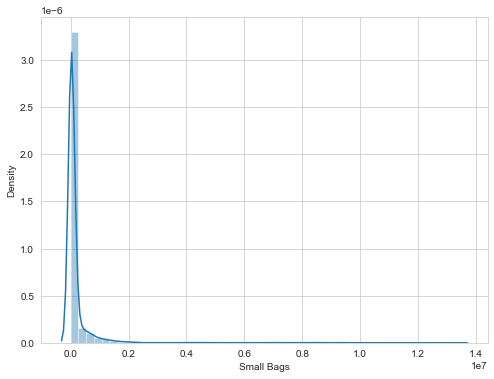

In [135]:
plt.figure(figsize=(8,6))
sns.distplot(df['Small Bags'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

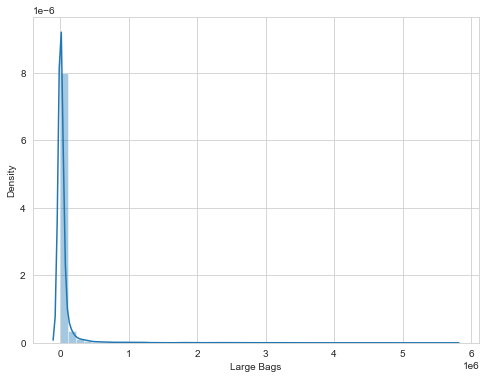

In [136]:
plt.figure(figsize=(8,6))
sns.distplot(df['Large Bags'])

This graph is not equally distributed, as the graph lies beyond the normal curve

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

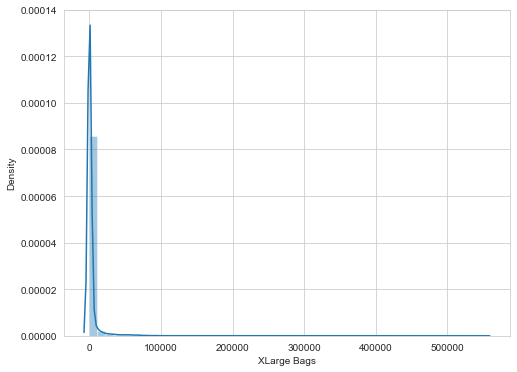

In [137]:
plt.figure(figsize=(8,6))
sns.distplot(df['XLarge Bags'])

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='type', ylabel='Density'>

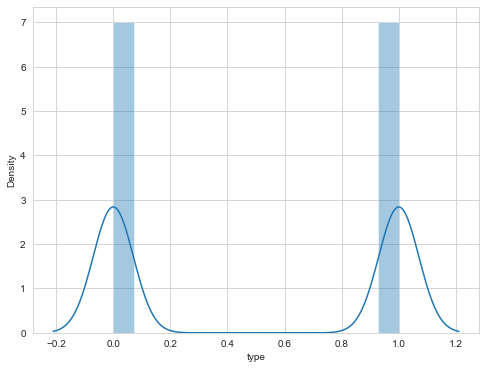

In [138]:
plt.figure(figsize=(8,6))
sns.distplot(df['type'])

This graph is not equally distributed, as the graph lies beyond the normal curve. It is Bimodal, 2 modes in graph

<AxesSubplot:xlabel='year', ylabel='Density'>

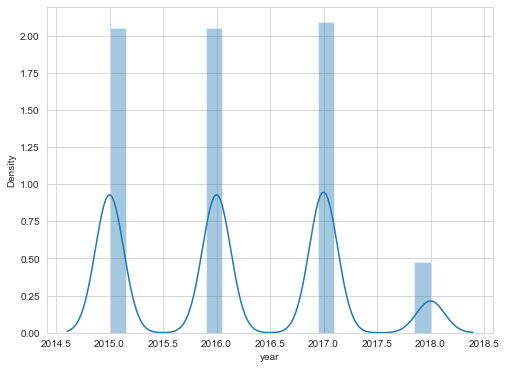

In [139]:
plt.figure(figsize=(8,6))
sns.distplot(df['year'])

This graph is not equally distributed, as the graph lies beyond the normal curve. It is mutlmodal, More than 3 Modes

<AxesSubplot:xlabel='region', ylabel='Density'>

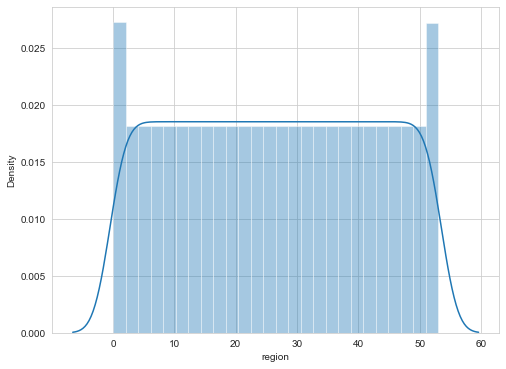

In [140]:
plt.figure(figsize=(8,6))
sns.distplot(df['region'])

This graph is not equally distributed, as the graph lies beyond the normal curve

# Data Cleansing

In [141]:
df.corr().region.sort_values()

AveragePrice   -0.011716
type           -0.000280
year           -0.000055
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

In [142]:
delete=pd.DataFrame({'Columns':['AveragePrice','type','year'],'Values':[-0.011716,-0.000280,-0.000055],
        'Outliers':['Y','N','N'],'Normalised':['Y','Y','N']})

In [143]:
delete

Columns    Values Outliers Normalised
0  AveragePrice -0.011716        Y          Y
1          type -0.000280        N          Y
2          year -0.000055        N          N

In [144]:
df.drop(['AveragePrice','type','year'],axis=1,inplace=True)

In [145]:
df.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'region'],
      dtype='object')

# Removing Outliers

In [146]:
from scipy.stats import zscore

In [147]:
z=np.abs(zscore(df))
z.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0      0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1      0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2      0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3      0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4      0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   

   Large Bags  XLarge Bags    region  
0    0.222352      0.17558  1.700252  
1    0.222335      0.17558  1.700252  
2    0.222311      0.17558  1.700252  
3    0.222186      0.17558  1.700252  
4    0.221924      0.17558  1.700252

In [148]:
print(np.where(z>3)) #

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64), array([1, 1, 7, ..., 6, 6, 6], dtype=int64))


In [149]:
z.iloc[346,1] # checking sample

3.199410614794124

In [150]:
new_df=df[(z<3).all(axis=1)]

In [151]:
new_df

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  region  
0           93.25          0.0       0  
1           97.49          0.0       0  
2          103.14          0.0       0  
3          133.76          0.0       0  
4          197.69          0.0       0  
...           ...          ...     ...  
18244      431.85          0.0      53  
18245      324.80          0.0      53  
18246       42.31          0.0      53  
18247       50.00          0.0      53  
18248       26.01          0.0      53  

[17782 rows x 9 columns]

## Calculate Data Loss 

In [152]:
print(" Old Data Set ",df.shape[0])
print(" New Data Set ",new_df.shape[0])

 Old Data Set  18249
 New Data Set  17782


### Loss Percentage 

In [153]:
print("Total Loss Percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Total Loss Percentage  2.55904433119623


In [154]:
x=new_df.iloc[:,:-1]

In [155]:
x.sample()

Total Volume      4046      4225  4770  Total Bags  Small Bags  \
11845      135524.9  39528.09  48060.97  51.1    47884.74     4197.01   

       Large Bags  XLarge Bags  
11845    43687.73          0.0

In [156]:
x.shape

(17782, 8)

In [157]:
y=new_df.iloc[:,-1]

In [158]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17782, dtype: int32

In [159]:
y.shape

(17782,)

# Remove Skewness

In [160]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [161]:
x

array([[-0.0650939 , -0.64991752,  0.35827836, ..., -0.33706414,
        -0.77521356, -0.67570236],
       [-0.13726861, -0.77006683,  0.27635525, ..., -0.30103791,
        -0.76523664, -0.67570236],
       [ 0.21550256, -0.72450758,  0.65600965, ..., -0.36404381,
        -0.75253359, -0.67570236],
       ...,
       [-0.7663438 , -0.61035022, -0.77439502, ..., -0.30346612,
        -0.94524635, -0.67570236],
       [-0.69259492, -0.53921073, -0.7116048 , ..., -0.2402521 ,
        -0.91047102, -0.67570236],
       [-0.65806205, -0.35150339, -0.78720881, ..., -0.2016847 ,
        -1.04292975, -0.67570236]])

In [162]:
x=pd.DataFrame(data=x,columns=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'])

In [163]:
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags  
0       -0.775214    -0.675702  
1       -0.765237    -0.675702  
2       -0.752534    -0.675702  
3       -0.693012    -0.675702  
4       -0.600755    -0.675702  
...           ...          ...  
17777   -0.405895    -0.675702  
17778   -0.478556    -0.675702  
17779   -0.945246    -0.675702  
17780   -0.910471    -0.675702  
17781   -1.042930    -0.675702  

[17782 rows x 8 columns]

In [164]:
x.skew()

Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
dtype: float64

In [165]:
x['XLarge Bags']=np.sqrt(x['XLarge Bags'])
x.skew()

Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
dtype: float64

#By sqrt, by log function use the xLage value goes null,hence proceeding with same value

# Standard Scaler

In [166]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [167]:
x

array([[-0.0650939 , -0.64991752,  0.35827836, ..., -0.33706414,
        -0.77521356, -0.67570236],
       [-0.13726861, -0.77006683,  0.27635525, ..., -0.30103791,
        -0.76523664, -0.67570236],
       [ 0.21550256, -0.72450758,  0.65600965, ..., -0.36404381,
        -0.75253359, -0.67570236],
       ...,
       [-0.7663438 , -0.61035022, -0.77439502, ..., -0.30346612,
        -0.94524635, -0.67570236],
       [-0.69259492, -0.53921073, -0.7116048 , ..., -0.2402521 ,
        -0.91047102, -0.67570236],
       [-0.65806205, -0.35150339, -0.78720881, ..., -0.2016847 ,
        -1.04292975, -0.67570236]])

In [168]:
print("Mean Value ",round(x.mean(),2),"Standard Deviation",round(x.std(),2))

Mean Value  0.0 Standard Deviation 1.0


# PCA

PCA is not working good on this model... we will proceed without PCA

# Checking Unique values in Target varible

In [169]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       52, 53, 51])

0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

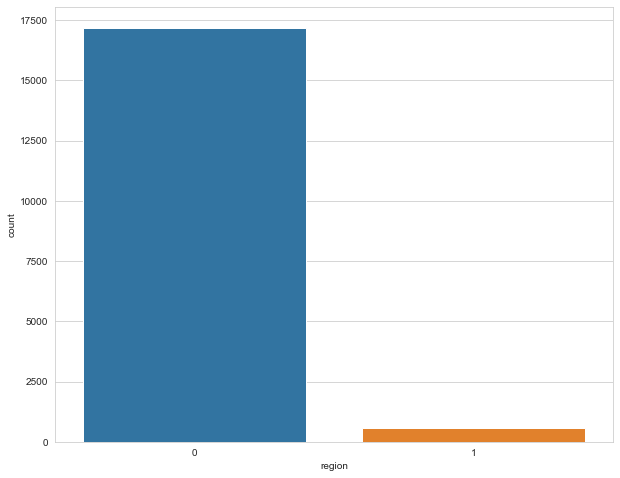

In [170]:
plt.figure(figsize=(10,8))
sns.countplot(x=y,data=y)
y.value_counts()

Unbalanced X DataSet

# SMOTE

In [171]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [172]:
plt.figure(figsize=(10,8))
y.value_counts()#x sample are now equal

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

<Figure size 720x576 with 0 Axes>

#### All rows are balanced now:

# We are use the classification Model

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [175]:
x.shape

(18252, 8)

In [176]:
y.shape

(18252,)

In [177]:
print(x_train.shape,x_test.shape)

(14601, 8) (3651, 8)


In [178]:
print(y_test.shape,y_test.shape)

(3651,) (3651,)


# Models Selection:

## Decision Tree Classifier

In [179]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

#train and score
dtc.fit(x_train,y_train)
dtc_score=dtc.score(x_train,y_train)

#predict
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 1.0  Accuracy Test Score = 0.7581484524787729 

Training Confusion_Matrix 
 [[49  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  1  2 ...  0  0 41]] Testing Confusion_Matrix 
 [[49  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 74  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  1  2 ...  0  0 41]]
Classification Report 
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        63
           1       0.68      0.74      0.70        68
           2       0.82      0.89      0.86        66
           3       0.65      0.76      0.70        58
           4       0.85      0.84      0.85        69
           5       0.79      0.65      0.72        81
           6       0.88      0.94      0.91        71
           7       0.82      0.78      0.80        68
           8       0.86      0.93      0.89     

### Cross Validation -Decision Tree

In [180]:
from sklearn.model_selection import cross_val_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy =accuracy_score(y_test,pred_test)

for i in range(110,140):
    cv_score=cross_val_score(dtc,x,y,cv=i)
    cv_mean=cv_score.mean()
    
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  110 CV_mean  0.7511928706561786 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  111 CV_mean  0.7510969949994342 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  112 CV_mean  0.7516902949546099 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  113 CV_mean  0.7562116890704809 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  114 CV_mean  0.7476439059605534 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  115 CV_mean  0.7505844522209878 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  116 CV_mean  0.7499322327468048 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  117 CV_mean  0.7521915406530791 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  118 CV_mean  0.7506791732051437 Training Score  1.0 Testing Score  0.7581484524787729
A cross-fold  119 CV_mean  0.7515651536907096 Training Score  1.0 Testing Score  0.7581484524787729


- A cross-fold  134 CV_mean  0.7588525278288677 Training Score  1.0 Testing Score  0.7633525061626951

## Checking Cross Validation for Decision Tree Classifier

In [181]:
#selected fold 134 as cv score is near to test score

from sklearn.model_selection import cross_val_score
#dtc_predict test
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)

#cross val score
dtc_cv_score=cross_val_score(dtc,x,y,cv=134)
dtc_mean=dtc_cv_score.mean()

print(" CV_mean ",dtc_mean,"Testing Accuracy Score ",accuracy_score(y_test,pred_test))

 CV_mean  0.756041203386246 Testing Accuracy Score  0.7581484524787729


### AOC ROC score for Decision Tree 

In [182]:
from sklearn.metrics import roc_auc_score
y_pred_proba=dtc.predict_proba(x_test)
y_pred_proba

roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.876669478545797

In [183]:
y_pred_proba

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [184]:
print("Decision Tree Model Score ", roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Decision Tree Model Score  0.876669478545797


# Kneighbors Classifier

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

#train and score
knc.fit(x_train,y_train)
knn_score=knc.score(x_train,y_train)

#predict
pred_train=knc.predict(x_train)
pred_test=knc.predict(x_test)

# result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"\n","Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.887678926100952  Accuracy Test Score = 0.8340180772391126 

Training Confusion_Matrix 
 [[56  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  3  1 ...  0  0 51]] 
 Testing Confusion_Matrix 
 [[56  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  3  1 ...  0  0 51]]
Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.89      0.82        63
           1       0.69      0.81      0.74        68
           2       0.94      0.97      0.96        66
           3       0.73      0.88      0.80        58
           4       0.88      0.94      0.91        69
           5       0.85      0.64      0.73        81
           6       0.96      0.94      0.95        71
           7       0.86      0.88      0.87        68
           8       0.86      0.9

### Cross Validation Kneighbors

In [186]:
from sklearn.model_selection import cross_val_score
#
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(80,150):
    cv_knc_score=cross_val_score(knc,x,y,cv=i)
    cv_mean=cv_knc_score.mean()
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  80 CV_mean  0.8070383724048111 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  81 CV_mean  0.8074362989669446 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  82 CV_mean  0.8082563039907456 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  83 CV_mean  0.8109621549710672 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  84 CV_mean  0.8123765635286372 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  85 CV_mean  0.8128982190572381 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  86 CV_mean  0.8117896717735107 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  87 CV_mean  0.8114324473671114 Training Score  0.887678926100952 Testing Score  0.8340180772391126
A cross-fold  88 CV_mean  0.8120579224519442 Training Score  0.887678926100952 Testing Score  0.

A cross-fold  149 CV_mean  0.8262726229418746 and Testing Score  0.832648589427554. Both the scores are nearby

In [187]:
# predict test(K_neighbors)
knc_test=knc.predict(x_test)

#cross val score(K_neighbors)
knc_cv_score=cross_val_score(knc,x,y,cv=149) # cv_score is near to training score
knc_mean=knc_cv_score.mean()

#predict result
print(" CV_mean ",knc_mean,"Testing Accuracy Score ",accuracy_score(y_test,knc_test))

 CV_mean  0.8265476807040046 Testing Accuracy Score  0.8340180772391126


### ROC_AUC_Score for KNeighbors classifier Model 

In [188]:
from sklearn.metrics import roc_auc_score

y_pred_proba=knc.predict_proba(x_test)
y_pred_proba

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [189]:
print("Model KNeighbour ROC_AUC Score ",roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))

Model KNeighbour ROC_AUC Score  0.976336432435711


## Support Vector Classifier

In [190]:
from sklearn.svm import SVC
svc=SVC()

#train and score
svc.fit(x_train,y_train)
svc_score=svc.score(x_train,y_train)

# predict
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_test,pred_test),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test),)

Accuracy Training Score = 0.7528251489623998  Accuracy Test Score = 0.736510545056149 

Training Confusion_Matrix 
 [[55  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  2  2 ...  0  0 38]] Testing Confusion_Matrix 
 [[55  0  0 ...  0  0  0]
 [ 0 40  0 ...  0  0  0]
 [ 0  0 58 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 54  0]
 [ 0  2  2 ...  0  0 38]]
Classification Report 
               precision    recall  f1-score   support

           0       0.65      0.87      0.74        63
           1       0.53      0.59      0.56        68
           2       0.94      0.88      0.91        66
           3       0.75      0.78      0.76        58
           4       0.77      0.80      0.79        69
           5       0.92      0.44      0.60        81
           6       0.89      0.94      0.92        71
           7       0.81      0.68      0.74        68
           8       0.93      0.95 

### Cross Validation Score for Support Vector Classifier

In [191]:
from sklearn.model_selection import cross_val_score
#score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val 
for i in range(60,62):
    cv_svc_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_svc_score.mean()    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  60 CV_mean  0.7279828156456716 Training Score  0.7528251489623998 Testing Score  0.736510545056149
A cross-fold  61 CV_mean  0.7278701317689199 Training Score  0.7528251489623998 Testing Score  0.736510545056149


A cross-fold  149 CV_mean  0.8262726229418746 and Testing Score  0.832648589427554 Both are near to each other

In [192]:
#svc_predict test
svc_test=svc.predict(x_test)

#cross val score
svc_cv_score=cross_val_score(svc,x,y,cv=62)
svc_mean=svc_cv_score.mean()

print(" CV_mean ",svc_mean,"Testing Accuracy Score ",accuracy_score(y_test,svc_test))

 CV_mean  0.7294173984519999 Testing Accuracy Score  0.736510545056149


### AUC_ROC for Support Vector Classifier

#predict_proba is not supported in SVC...due to probability is False

# Ensamble Technique

# Extra Trees 

In [193]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()

# train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.8679813749657628 

Training Confusion_Matrix 
 [[275   0   0 ...   0   0   0]
 [  0 270   0 ...   0   0   0]
 [  0   0 272 ...   0   0   0]
 ...
 [  0   0   0 ... 258   0   0]
 [  0   0   0 ...   0 280   0]
 [  0   0   0 ...   0   0 268]] Testing Confusion_Matrix 
 [[53  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  1  1 ...  0  0 55]]
Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        63
           1       0.83      0.85      0.84        68
           2       0.94      0.97      0.96        66
           3       0.77      0.91      0.83        58
           4       0.91      0.91      0.91        69
           5       0.91      0.72      0.80        81
           6       0.99      0.99      0.99        71
           7       0.90      0.93      0.91        68
           8

### Cross-Validation Extra Trees Classifier

- Test are running six hours no result produced still..... interupted

In [195]:
from sklearn.model_selection import cross_val_score
#
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_etc_score=cross_val_score(etc,x,y,cv=i)
    cv_mean=cv_etc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.12157571772956388 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  3 CV_mean  0.549364453210607 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  4 CV_mean  0.606673241288626 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  5 CV_mean  0.6541139638980501 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  6 CV_mean  0.6640368178829718 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  7 CV_mean  0.7233620583294421 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  8 CV_mean  0.7313025984190552 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  9 CV_mean  0.7294543063773833 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  10 CV_mean  0.7367328241984126 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  11 CV_mean  0.7539329106661729 Training Score  1.0 Testing Score  0.8679813749657628
A cross-fold  12 CV

### Taking long time............

In [196]:
#etc_predict test

etc_test=etc.predict(x_test)

#cross val score
etc_cv_score=cross_val_score(etc,x,y,cv=17)
etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",accuracy_score(y_test,etc_test))

 CV_mean  0.7739225905339201 Testing Accuracy Score  0.8679813749657628


- A cross-fold  99 CV_mean  0.8481697112131894  is close to Testing Score  0.8646946042180225,

## AOC_ROC_Curve(for Extra Trees Classifier)

In [197]:
from sklearn.metrics import roc_auc_score

y_predict_proba=etc.predict_proba(x_test)
y_predict_proba

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.02, 0.03, ..., 0.  , 0.  , 0.  ]])

In [198]:
roc_auc_score(y_test,y_predict_proba,multi_class='ovr',)

0.9961749357386288

## MLP Classifier

In [199]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()

#train
mlp.fit(x_train,y_train)
mlp_score=mlp.score(x_train,y_train)

#predict
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.8013834668858297  Accuracy Test Score = 0.777869076965215 

Training Confusion_Matrix 
 [[247   0   0 ...   0   0   0]
 [  0 162   0 ...   0   0   0]
 [  0   0 255 ...   1   0   1]
 ...
 [  0   0   0 ... 257   0   0]
 [  0   0   0 ...   2 251   0]
 [  0   1   5 ...   0   0 148]] Testing Confusion_Matrix 
 [[57  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  1]
 [ 0  0 62 ...  0  0  3]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  1  1 ...  0  0 36]]
Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.90      0.80        63
           1       0.69      0.66      0.68        68
           2       0.95      0.94      0.95        66
           3       0.65      0.79      0.71        58
           4       0.78      0.86      0.81        69
           5       0.82      0.62      0.70        81
           6       0.99      0.97      0.98        71
           7       0.86      0.81      0.83        6

## Cross Validation with MLP

In [200]:
from sklearn.model_selection import cross_val_score

train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_mlp_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=cv_mlp_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.09741398202936666 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  3 CV_mean  0.4947403024326101 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  4 CV_mean  0.5403791365329828 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  5 CV_mean  0.603873121644286 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  6 CV_mean  0.623712469866316 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  7 CV_mean  0.6642472971878112 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  8 CV_mean  0.6853353071768805 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  9 CV_mean  0.6865548980933596 Training Score  0.8013834668858297 Testing Score  0.777869076965215
A cross-fold  10 CV_mean  0.6903281669642455 Training Score  0.8013834668858297 Testing Score  0.77786907

#### Both the test are running six hours plus.. stoping the loop

In [201]:
from sklearn.model_selection import cross_val_score
#mlp_predict test
mlp_test=mlp.predict(x_test)

#cross val score
mlp_cv_score=cross_val_score(mlp,x,y,cv=7)
cv_mean=mlp_cv_score.mean()

print(" CV_mean ",cv_mean,"Testing Accuracy Score ",accuracy_score(y_test,mlp_test))

 CV_mean  0.6682463397439713 Testing Accuracy Score  0.777869076965215


## MLP AUC_ROC_Score

In [202]:
from sklearn.metrics import roc_auc_score
y_pred_proba=mlp.predict_proba(x_test)
y_pred_proba

array([[7.17699769e-05, 3.43205716e-03, 4.96169869e-19, ...,
        1.02113308e-34, 7.22822271e-19, 1.51717002e-04],
       [1.36672429e-25, 1.05518694e-01, 5.46364991e-13, ...,
        1.16468938e-18, 6.13101099e-08, 2.94430443e-04],
       [3.95146730e-04, 1.75994430e-07, 6.56381725e-24, ...,
        4.57784696e-39, 6.54143018e-24, 4.24710589e-09],
       ...,
       [5.06410286e-03, 8.92939860e-03, 3.74618915e-16, ...,
        1.77740714e-33, 1.33158563e-16, 1.58570966e-02],
       [3.01028468e-06, 2.98438073e-04, 2.51109805e-20, ...,
        8.16681865e-38, 2.39557768e-16, 1.09820772e-05],
       [3.19063245e-07, 4.43053193e-04, 4.02605438e-10, ...,
        5.49256576e-30, 9.94362297e-12, 3.03143330e-05]])

In [203]:
roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.9941082676822485

## AdaBoost Classifier

In [204]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

ada.fit(x_train,y_train)
ada_score=ada.score(x_train,y_train)

#predict
pred_train=ada.predict(x_train)
pred_test=ada.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.08540510923909321  Accuracy Test Score = 0.07258285401259928 

Training Confusion_Matrix 
 [[  0   0   1 ...   0   0   0]
 [  0   0   0 ...   0   0 134]
 [  0   0 132 ...   0   0   0]
 ...
 [  0   0 131 ...   0   0   0]
 [  0   0   0 ...   0 100   4]
 [  0   0   0 ...   0   0 124]] Testing Confusion_Matrix 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 34]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0 34 ...  0  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 33]]
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.00      0.00      0.00        68
           2       0.11      0.47      0.18        66
           3       0.10      0.16      0.12        58
           4       0.50      0.01      0.03        69
           5       0.00      0.00      0.00        81
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00      

### Taking long time  Not running the codes... 

In [211]:
from sklearn.model_selection import cross_val_score

#train and score for Ada Boost
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val for Ada Boost
for i in range(2,10):
    cv_ada_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=cv_ada_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.027339469647161954 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  3 CV_mean  0.042899408284023666 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  4 CV_mean  0.042680254218715755 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  5 CV_mean  0.052215305996105396 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  6 CV_mean  0.04859741398202936 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  7 CV_mean  0.044763378075679074 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  8 CV_mean  0.05857126815621637 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  9 CV_mean  0.05435020819636205 Training Score  1.0 Testing Score  0.8630512188441523


In [206]:
#Model_predict test
ada_test=ada.predict(x_test)

#cross val score
ada_cv_score=cross_val_score(ada,x,y,cv=5) #accuracy score is low 
ada_mean=ada_cv_score.mean()

print(" CV_mean ",ada_mean,"Testing Accuracy Score ",accuracy_score(y_test,ada_test))

 CV_mean  0.052215305996105396 Testing Accuracy Score  0.07258285401259928


## Random Forest Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
      
#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.8630512188441523 

Training Confusion_Matrix 
 [[275   0   0 ...   0   0   0]
 [  0 270   0 ...   0   0   0]
 [  0   0 272 ...   0   0   0]
 ...
 [  0   0   0 ... 258   0   0]
 [  0   0   0 ...   0 280   0]
 [  0   0   0 ...   0   0 268]] Testing Confusion_Matrix 
 [[54  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  0]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 56]]
Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        63
           1       0.89      0.81      0.85        68
           2       0.94      0.98      0.96        66
           3       0.74      0.90      0.81        58
           4       0.93      0.93      0.93        69
           5       0.89      0.72      0.79        81
           6       0.96      1.00      0.98        71
           7       0.89      0.85      0.87        68
           8

### Taking long time  Not running the codes... 

In [210]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.11308349769888232 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  3 CV_mean  0.5460771422309884 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  4 CV_mean  0.5968113083497698 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  5 CV_mean  0.6468820777193713 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  6 CV_mean  0.6648586456278763 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  7 CV_mean  0.7244022237372786 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  8 CV_mean  0.7236877027043123 Training Score  1.0 Testing Score  0.8630512188441523
A cross-fold  9 CV_mean  0.7257286872671488 Training Score  1.0 Testing Score  0.8630512188441523


In [212]:
#rfc_predict test
rfc_test=rfc.predict(x_test)

# model cross val score
rfc_cv_score=cross_val_score(rfc,x,y,cv=9) #accuracy would increase with increase in fold
rfc_mean=rfc_cv_score.mean()# mean value

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",accuracy_score(y_test,rfc_test))

 CV_mean  0.7272079772079771 Testing Accuracy Score  0.8630512188441523


## GradientBoostingClassifier

In [179]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

#train and score gradient Boosting Classifier
gbc.fit(x_train,y_train)
gbc_score=gbc.score(x_train,y_train)

#predict Gradient Boosting Classifier
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)

#result gradient Boosting classifier
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9664406547496747  Accuracy Test Score = 0.7975897014516571 

Training Confusion_Matrix 
 [[269   0   0 ...   0   0   0]
 [  0 252   0 ...   0   0   0]
 [  0   0 270 ...   0   0   0]
 ...
 [  0   0   0 ... 258   0   0]
 [  0   0   0 ...   0 277   0]
 [  0   1   1 ...   0   0 239]] Testing Confusion_Matrix 
 [[50  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  1]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 79  0  0]
 [ 0  0  0 ...  0 55  0]
 [ 0  1  0 ...  0  0 44]]
Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        63
           1       0.81      0.76      0.79        68
           2       0.94      0.92      0.93        66
           3       0.70      0.84      0.77        58
           4       0.85      0.90      0.87        69
           5       0.85      0.70      0.77        81
           6       0.92      0.94      0.93        71
           7       0.89      0.72      0.80        

In [181]:
from sklearn.model_selection import cross_val_score

#predict model 
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,10):
    cv_gbc_score=cross_val_score(gbc,x,y,cv=i)
    cv_mean=cv_gbc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)
    
    #TEST IS TAKING TOO MUCH TIME

A cross-fold  2 CV_mean  0.11045364891518739 Training Score  0.9664406547496747 Testing Score  0.7975897014516571
A cross-fold  3 CV_mean  0.47205785667324135 Training Score  0.9664406547496747 Testing Score  0.7975897014516571


KeyboardInterrupt: 

In [ ]:
#dtc_predict test
gbc_test=gbc.predict(x_test)

#cross val score
gbc_cv_score=cross_val_score(gbc,x,y,cv=9)
gbc_mean=gbc_cv_score.mean()

print(" CV_mean ",gbc_mean,"Testing Accuracy Score ",accuracy_score(y_test,gbc_test))

### ROC_AUC_ Score(Gradient Boosting Classifier)

In [182]:
from sklearn.metrics import roc_auc_score
y_pred_proba = gbc.predict_proba(x_test)
y_pred_proba

array([[7.73250436e-04, 2.34239489e-03, 4.49839725e-05, ...,
        1.38639946e-05, 5.45350274e-05, 1.13416998e-03],
       [1.33246860e-04, 2.86862500e-03, 5.75513936e-05, ...,
        2.36430368e-05, 2.45730996e-04, 6.60740792e-04],
       [3.75316553e-02, 6.69443946e-03, 1.87234310e-04, ...,
        6.65853359e-05, 2.61918244e-04, 1.30537586e-03],
       ...,
       [1.01473193e-02, 2.19909081e-02, 4.29557569e-04, ...,
        1.81936373e-04, 7.15659907e-04, 4.37419672e-03],
       [1.35314444e-03, 3.82097677e-03, 1.12991004e-04, ...,
        4.03059009e-05, 1.58546182e-04, 7.90179240e-04],
       [9.90366185e-04, 3.09654850e-03, 1.89305958e-03, ...,
        2.25821802e-05, 8.88286425e-05, 9.18398670e-04]])

In [184]:
roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.9921961165528546

# Working with Best Model

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()

#parameters
param={'criterion':['gini'],
           'min_samples_split':[2],
           'min_samples_leaf':[1,2],
           'max_features':['sqrt'],
           'min_weight_fraction_leaf':[0.0],
           'class_weight':['balanced_subsample'],
           'ccp_alpha':[0.0]}
#fit parameters in grid search
gsv=GridSearchCV(rfc,param)
gsv.fit(x_train,y_train) #train model

#result and score for model
print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

In [188]:
#import lib with best parameters
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(ccp_alpha = 0.0,class_weight='balanced_subsample', criterion='gini',max_features='sqrt', min_samples_leaf= 1, min_samples_split=2, min_weight_fraction_leaf= 0.0)

#train model
rfc.fit(x_train,y_train)
rfc_score=rfc.score(x_train,y_train)

#predict
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Training Report \n",classification_report(y_train,pred_train),"Classification Testing Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 1.0  Accuracy Test Score = 0.8592166529717885 

Training Confusion_Matrix 
 [[275   0   0 ...   0   0   0]
 [  0 270   0 ...   0   0   0]
 [  0   0 272 ...   0   0   0]
 ...
 [  0   0   0 ... 258   0   0]
 [  0   0   0 ...   0 280   0]
 [  0   0   0 ...   0   0 268]] Testing Confusion_Matrix 
 [[55  0  0 ...  0  0  0]
 [ 0 56  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  2  1 ...  0  0 55]]
Classification Training Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       270
           2       1.00      1.00      1.00       272
           3       1.00      1.00      1.00       280
           4       1.00      1.00      1.00       269
           5       1.00      1.00      1.00       257
           6       1.00      1.00      1.00       267
           7       1.00      1.00      1.00       270
   

### Cross Validation with Random Forest Classifier

In [189]:
from sklearn.model_selection import cross_val_score

#train and score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val
for i in range(2,20):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.11812404120096429 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  3 CV_mean  0.5472824895901819 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  4 CV_mean  0.6004821389436773 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  5 CV_mean  0.6487449263290598 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  6 CV_mean  0.6617357001972387 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  7 CV_mean  0.7227045931082197 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  8 CV_mean  0.7277967335620514 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  9 CV_mean  0.7265505150120535 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  10 CV_mean  0.7293924289936833 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  11 CV_mean  0.750591747228929 Training Score  1.0 Testing Score  0.8592166529717885
A cross-fold  12 C

In [191]:
# Random Forest_predict test
rfc_test=rfc.predict(x_test)

# Cross val score(Random Forest)
rfc_cv_score=cross_val_score(rfc,x,y,cv=19)#cv score would increase with cv increase

rfc_mean=rfc_cv_score.mean()

print(" CV_mean ",rfc_mean,"Testing Accuracy Score ",accuracy_score(y_test,rfc_test))

 CV_mean  0.7721688048816109 Testing Accuracy Score  0.8592166529717885


## ROC_AUC Score for  Random Forest

In [192]:
from sklearn.metrics import roc_auc_score
y_pred_proba = rfc.predict_proba(x_test)
y_pred_proba

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ]])

In [193]:
roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.9963274009971085

## Model 2 (ExtraTreesClassifier)

In [194]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

etc= ExtraTreesClassifier()

#Parameter  
parameters={'criterion':['gini'],
           'min_samples_split':[2],
           'min_samples_leaf':[2],
           'max_features':['log2'],
           'min_weight_fraction_leaf':[0.0],
           'class_weight':['balanced_subsample'],
           'ccp_alpha':[0.0]}

gsv=GridSearchCV(etc,parameters)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0} Best Score  0.861926765556926


In [195]:
# train and score
etc= ExtraTreesClassifier(ccp_alpha = 0.0, class_weight= 'balanced_subsample', criterion= 'gini', max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2, min_weight_fraction_leaf=0.0)

#train and score
etc.fit(x_train,y_train)
etc_score=etc.score(x_train,y_train)

#predict
pred_train=etc.predict(x_train)
pred_test=etc.predict(x_test)

#result
print("Accuracy Training Score =",accuracy_score(y_train,pred_train)," Accuracy Test Score =",accuracy_score(y_test,pred_test),"\n")
print("Training Confusion_Matrix \n",confusion_matrix(y_train,pred_train),"Testing Confusion_Matrix \n",confusion_matrix(y_test,pred_test))
print("Classification Report \n",classification_report(y_test,pred_test))

Accuracy Training Score = 0.9928087117320732  Accuracy Test Score = 0.8677074774034511 

Training Confusion_Matrix 
 [[272   0   0 ...   0   0   0]
 [  0 269   0 ...   0   0   0]
 [  0   0 272 ...   0   0   0]
 ...
 [  0   0   0 ... 258   0   0]
 [  0   0   0 ...   0 280   0]
 [  0   0   0 ...   0   0 260]] Testing Confusion_Matrix 
 [[56  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  1]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 80  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  1  1 ...  0  0 54]]
Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        63
           1       0.85      0.85      0.85        68
           2       0.96      0.97      0.96        66
           3       0.78      0.91      0.84        58
           4       0.91      0.93      0.92        69
           5       0.92      0.72      0.81        81
           6       0.97      0.99      0.98        71
           7       0.94      0.90      0.92        

In [196]:
from sklearn.model_selection import cross_val_score

#train and score(Extra Trees)
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

#cross val Scorefor model
for i in range(2,20):
    cv_rfc_score=cross_val_score(rfc,x,y,cv=i)
    cv_mean=cv_rfc_score.mean()
    
    #print
    print("A cross-fold ",i,"CV_mean ",cv_mean,"Training Score ",train_accuracy,"Testing Score ",test_accuracy)

A cross-fold  2 CV_mean  0.12245233399079553 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  3 CV_mean  0.5485974139820293 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  4 CV_mean  0.598728906421214 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  5 CV_mean  0.6478679888790086 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  6 CV_mean  0.6655161078238001 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  7 CV_mean  0.7216637343268159 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  8 CV_mean  0.7255506804486707 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  9 CV_mean  0.730221345605961 Training Score  0.9928087117320732 Testing Score  0.8677074774034511
A cross-fold  10 CV_mean  0.7288446038200124 Training Score  0.9928087117320732 Testing Score  0.

In [197]:
# Random Forest_predict test
etc_test=rfc.predict(x_test)

# Cross val score(Random Forest)
etc_cv_score=cross_val_score(etc,x,y,cv=19)

etc_mean=etc_cv_score.mean()

print(" CV_mean ",etc_mean,"Testing Accuracy Score ",accuracy_score(y_test,etc_test))

 CV_mean  0.7829613706482648 Testing Accuracy Score  0.8592166529717885


In [198]:
import sklearn
sklearn.__version__

'1.1.1'

In [199]:
from sklearn.metrics import roc_auc_score

In [200]:
y_pred_proba=etc.predict_proba(x_test)

In [201]:
roc_auc_score(y_test,y_pred_proba,multi_class='ovr')

0.9977203950137665

-------------------

## Saving Model (Classification Model)

In [202]:
import pickle
filename='Avocado.pkl'
pickle.dump(etc, open(filename, 'wb')) #saved model

In [203]:
import pickle
loaded_model =pickle.load(open('Avocado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.77074774034512


In [204]:
final_df=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
final_df

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    39    50     3    30    30    18    34    44    13    47  ...   
Original     39    50     3    30    30    18    34    44    13    47  ...   

           3641  3642  3643  3644  3645  3646  3647  3648  3649  3650  
Predicted    35    38    28    53    31    23    51    39    47    36  
Original     35    38    28    53    31    23    51    39    47    36  

[2 rows x 3651 columns]

End of classification model. working with Regression Model

# Continued Working with Regression Model

In [111]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

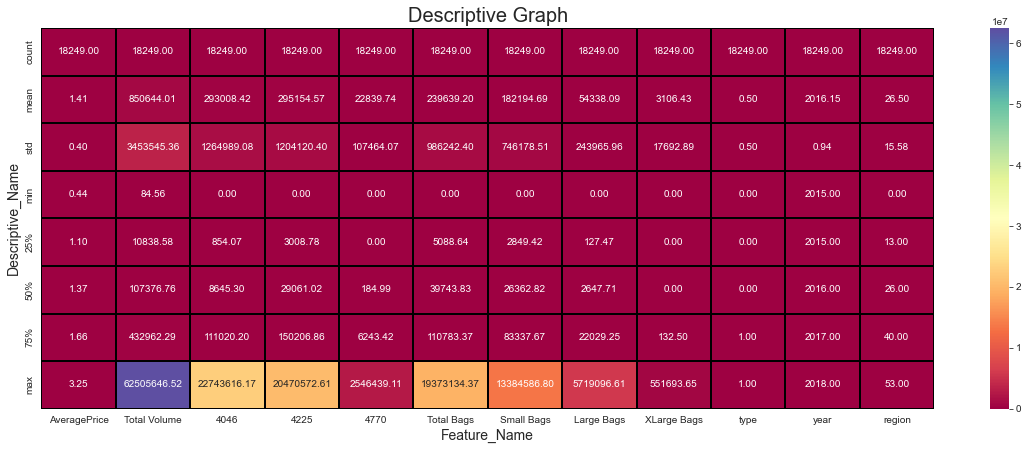

In [112]:
plt.figure(figsize=(20,7))
sns.heatmap(df.describe(),annot=True,linewidth=0.2,linecolor='black',fmt='0.2f',cmap='Spectral')
plt.ylabel("Descriptive_Name",fontsize=14)
plt.xlabel("Feature_Name",fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

Text(0.5, 1.0, 'DESCRIPTION CHART')

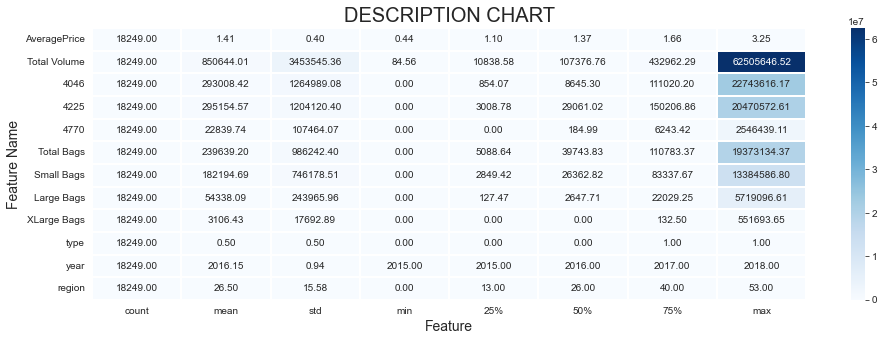

In [113]:
plt.figure(figsize=(16,5))
sns.heatmap(round(df.describe()[:].transpose(),2),annot=True,square=False,fmt=('0.2f'),linewidth=0.02,linecolor='white',cmap='Blues')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Feature Name",fontsize=14)
plt.title("DESCRIPTION CHART",fontsize=20)

Observations with Columns:
--------------------------------------------------------------------------------------------------------------------------------
- Null Values: No Null Values

- Right Skewed: Average Price,Total Volume,4026,4255,4770,Total Bags,Small Bags,Large Bags,XLarge Bags, type, 2016,region

- Left Skewed: Nil

- Standard Deviation: Total Volume,4026,4255,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,

- Outliers: Total Volume,4026,4255,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,

# Correlation:

In [114]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   

                  year    region  
AveragePrice  0.093197 -0.011716  
Total Volume  0.017193  0.174176  
4046          0.003353  0.192073  
4225         -0.009559  0.145726  
4770         -0.036531  0.095252  
Total Bags    0.071552  0.175256  
Small Bags    0.063915  0.164702  
Large Bags    0.087891  0.198768  
XLarge Bags   0.081033  0.082281  
type         -0.000032 -0.000280  
year          1.000000 -0.000055  
region       -0.000055  1.000000

## Graph showing the correlation between Variables

Text(0.5, 1.0, 'DESCRIPTION CHART')

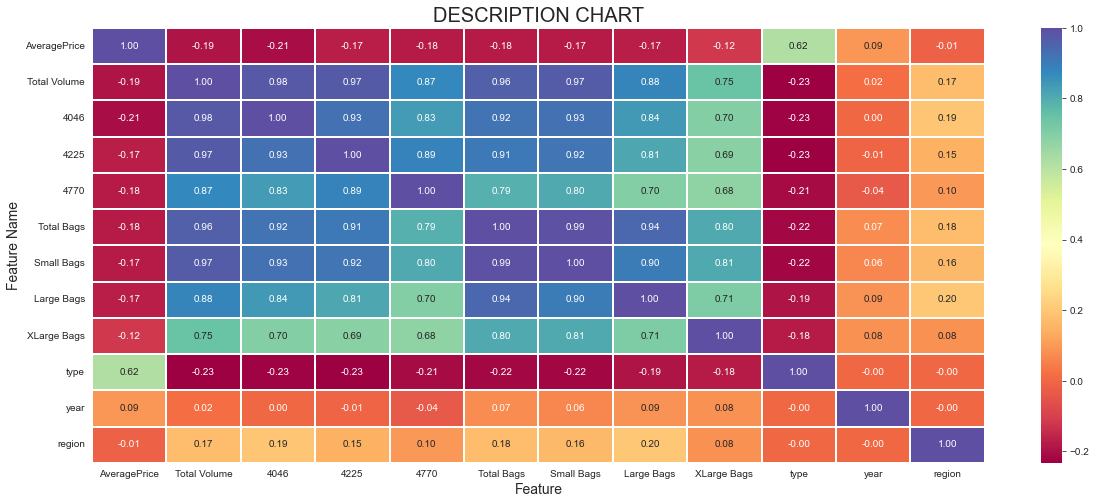

In [115]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,square=False,fmt=('0.2f'),linewidth=0.02,linecolor='white',cmap='Spectral')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Feature Name",fontsize=14)
plt.title("DESCRIPTION CHART",fontsize=20)

In [116]:
df.corr().AveragePrice.sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

Observations:
-------------------------------------------
- 4046 is 20 percentage negatively correlated with target variable.
- Total Volume is 19 percentage negatively correlated with target variable.
- 4770 is 17 percentage negatively correlated with with target variable.
- Total Bags is 17 percentage correlated with target variable.
- Small Bags is 17 percentage negatively correlated with target variable.
- Large Bags is 17 percentage negatively correlated with target variable.
- 4225 is 17 percentage negatively correlated with target variable.
- XLarge Bags is 11 percentage negatively correlated with target variable.
- Region is 1 percentage negatively correlated with target variable.
- Year is 10 percentage positively correlated with target variable.
- Type is 61 percentage positively correlated with target variable.
- AveragePrice is a target variable. So its 100 percentage correlated with itself.

Text(0.5, 1.0, 'CORRELATION MAP')

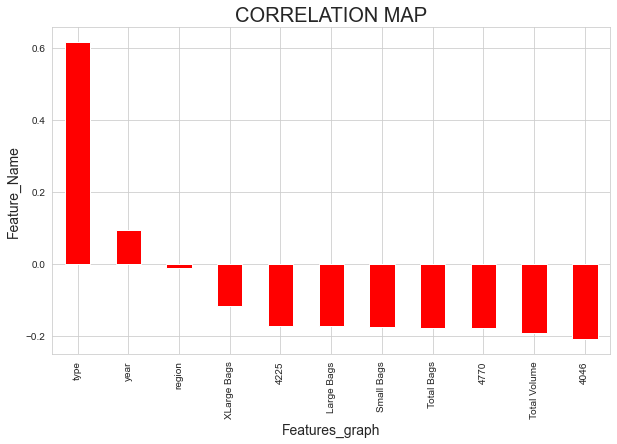

In [117]:
plt.figure(figsize=(10,6))
df.corr().AveragePrice.sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='r')
plt.xlabel('Features_graph',fontsize=14)
plt.ylabel('Feature_Name',fontsize=14)
plt.title('CORRELATION MAP',fontsize=20)

### NOTE

1. 4046 is very negatively correlated with Target Variable.
2. Region is 1 percentage negatively correlated with target variable.
3. Type is very positively correlated with Target Variable.


# Outliers:

<AxesSubplot:>

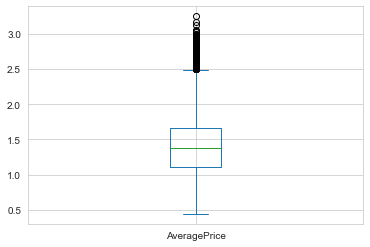

In [118]:
df['AveragePrice'].plot.box()

Graph shows huge outliers

<AxesSubplot:>

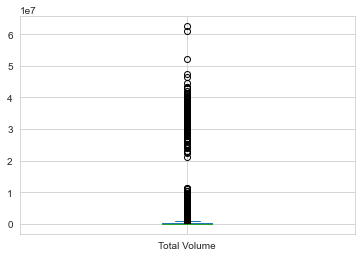

In [119]:
df['Total Volume'].plot.box()

Graph shows huge outliers in columns

{'whiskers': [<matplotlib.lines.Line2D at 0x27ffabd8220>,
 'caps': [<matplotlib.lines.Line2D at 0x27ffabd87c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ffabc9f10>],
 'medians': [<matplotlib.lines.Line2D at 0x27ffabd8d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ffabe4070>],
 'means': []}

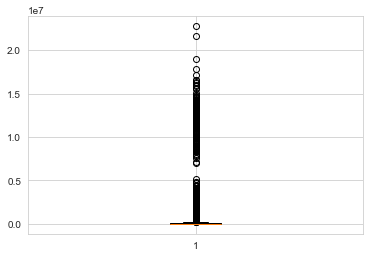

In [120]:
plt.boxplot(df['4046'])

Huge Outliers are present in columns

{'whiskers': [<matplotlib.lines.Line2D at 0x27ffac2ebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ffadaf190>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ffac2e8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ffadaf730>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ffadafa00>],
 'means': []}

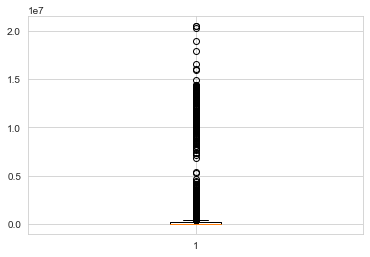

In [121]:
plt.boxplot(df['4225'])

Graph shows Huge Outliers are present

{'whiskers': [<matplotlib.lines.Line2D at 0x27ffae03520>,
 'caps': [<matplotlib.lines.Line2D at 0x27ffae03ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ffae03250>],
 'medians': [<matplotlib.lines.Line2D at 0x27ffae100a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ffae10370>],
 'means': []}

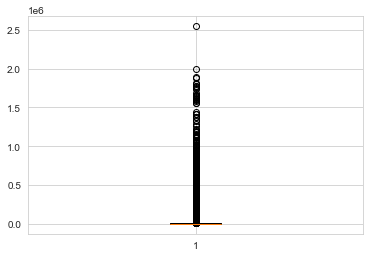

In [122]:
plt.boxplot(df['4770'])

Graph Shows huge outliers are present in columns

<AxesSubplot:xlabel='Total Bags'>

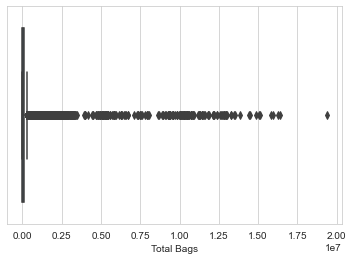

In [123]:
sns.boxplot(df['Total Bags'])

Graph shows Outliers in Total Bags Column

<AxesSubplot:xlabel='Small Bags'>

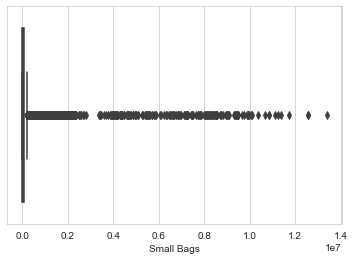

In [124]:
sns.boxplot(df['Small Bags'])

Outliers are present in columns

<AxesSubplot:xlabel='Large Bags'>

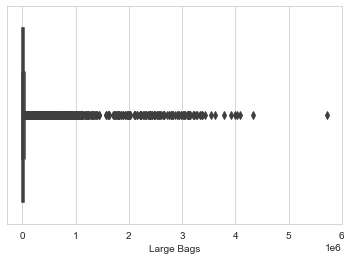

In [125]:
sns.boxplot(df['Large Bags'])

Large Bags contains Outliers

<AxesSubplot:xlabel='type'>

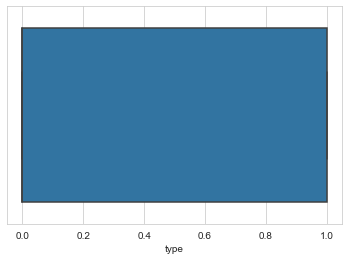

In [126]:
sns.boxplot(df['type'])

Type is a category Variable, no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x27ffbf751f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27ffbf75790>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ffbf67ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x27ffbf75d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ffbf84040>],
 'means': []}

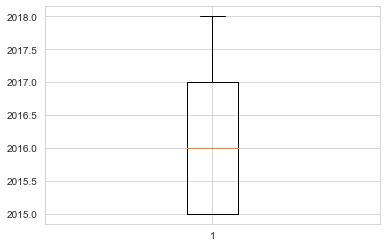

In [127]:
plt.boxplot(df['year'])

No out liers are present in year

<AxesSubplot:xlabel='region'>

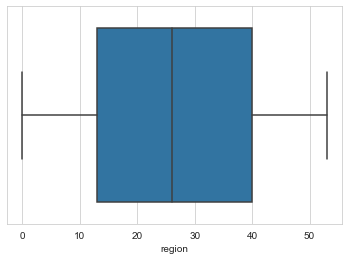

In [128]:
sns.boxplot(df['region'])

No outliers in region

# Skewness

In [129]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Skewness Threshold is taken is(+/-65).

Outcome shows, Column showing skewness are..

- Total Volume
- 4046        
- 4225      
- 4770        
- Total Bags   
- Small Bags 
- Large Bags  
- XLarge Bags 

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

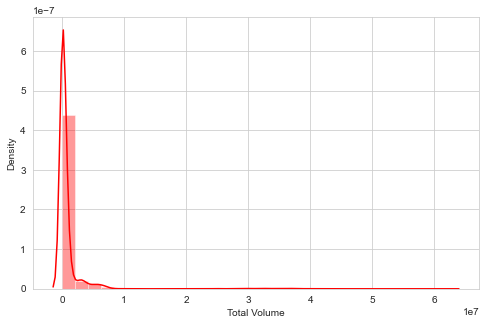

In [130]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['Total Volume'], kde = True, color ='red', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4046', ylabel='Density'>

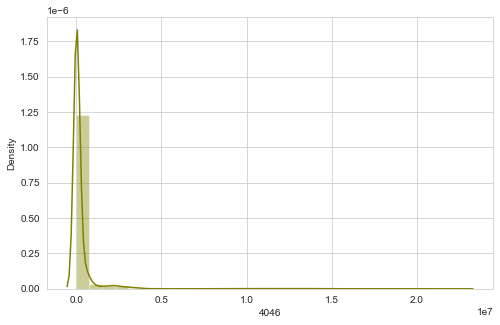

In [131]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['4046'], kde = True, color ='olive', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4225', ylabel='Density'>

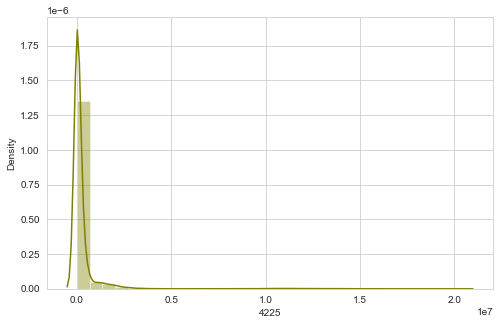

In [132]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['4225'], kde = True, color ='olive', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4770', ylabel='Density'>

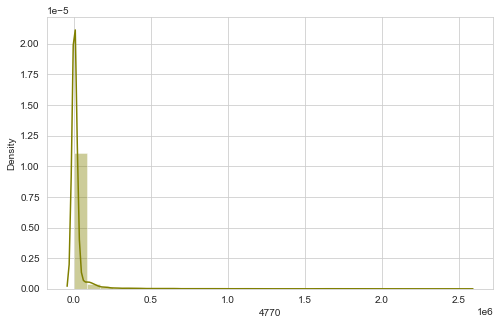

In [133]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['4770'], kde = True, color ='olive', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='4770', ylabel='Density'>

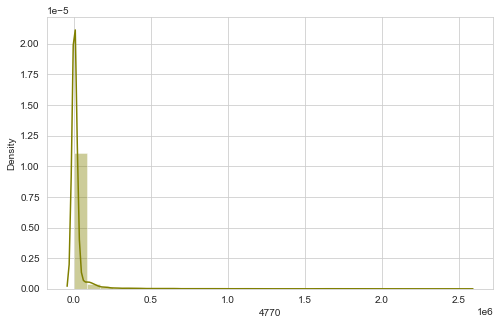

In [134]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['4770'], kde = True, color ='olive', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

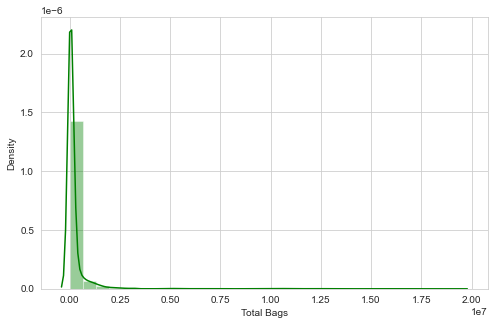

In [135]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['Total Bags'], kde = True, color ='green', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

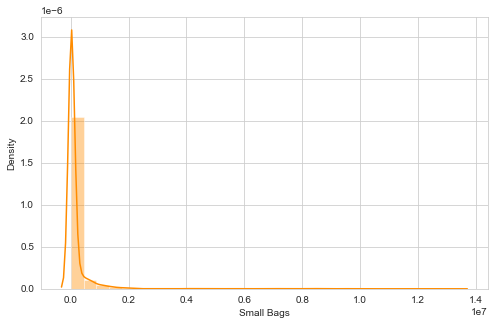

In [136]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['Small Bags'], kde = True, color ='darkorange', bins = 30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

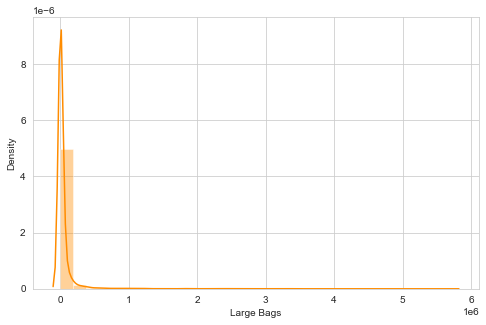

In [137]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['Large Bags'],kde=True,color='darkorange',bins=30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

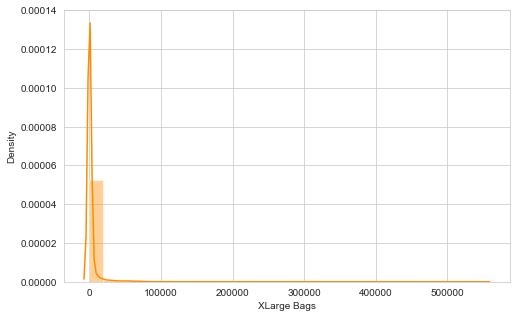

In [138]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['XLarge Bags'],kde=True,color='darkorange',bins=30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

<AxesSubplot:xlabel='type', ylabel='Density'>

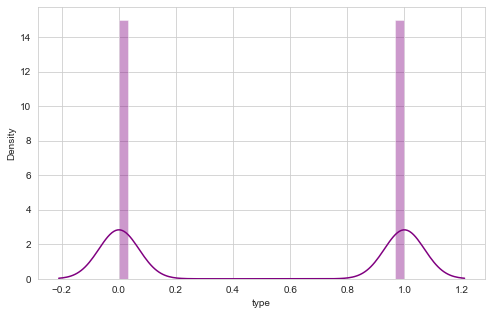

In [139]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['type'],kde=True,color='purple',bins=30)

This graph is not equally distributed, as the graph lies beyond the normal curve.(Bi-Modal Graph)

<AxesSubplot:xlabel='year', ylabel='Density'>

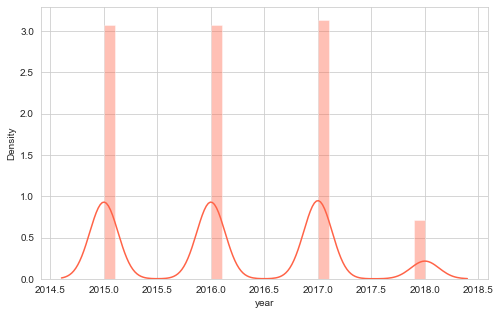

In [140]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['year'],kde=True,color='tomato',bins=30)

This graph is not equally distributed, as the graph lies beyond the normal curve.(Multi-Modal-Graph)

<AxesSubplot:xlabel='region', ylabel='Density'>

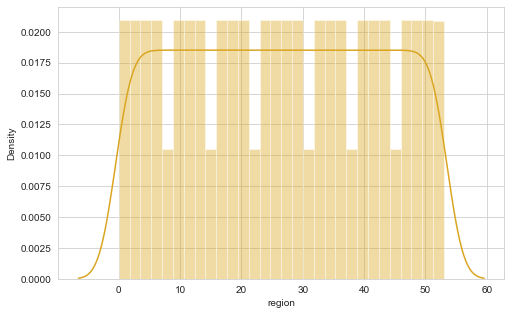

In [141]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.distplot(df['region'],kde=True,color='goldenrod',bins=30)

This graph is not equally distributed, as the graph lies beyond the normal curve.

# Data Cleansing

In [142]:
df.corr().AveragePrice.sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
year            0.093197
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

Will delete the rows

- Here 4046 is very negatively correlated with the target variable
- Region shows no relation with the target variable

In [143]:
delete=pd.DataFrame(data={'Column_Name':['region'],
                         'Values':['-0.011716'],
                         'Outliers':['NO'],
                         'Normalised':['NO']})

In [144]:
delete

Column_Name     Values Outliers Normalised
0      region  -0.011716       NO         NO

In [145]:
df.drop(['region'],axis=1,inplace=True)

In [146]:
df.head(5)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  
0     8603.62       93.25          0.0     0  2015  
1     9408.07       97.49          0.0     0  2015  
2     8042.21      103.14          0.0     0  2015  
3     5677.40      133.76          0.0     0  2015  
4     5986.26      197.69          0.0     0  2015

# Outliers

In [147]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [148]:
z.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0      0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1      0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2      1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3      0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4      0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   

   Small Bags  Large Bags  XLarge Bags      type      year  
0    0.232647    0.222352      0.17558  0.999836  1.221282  
1    0.231568    0.222335      0.17558  0.999836  1.221282  
2    0.233399    0.222311      0.17558  0.999836  1.221282  
3    0.236568    0.222186      0.17558  0.999836  1.221282  
4    0.236154    0.221924      0.17558  0.999836  1.221282

In [149]:
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [150]:
# checking outliers
df.iloc[780,7]

98401.09

In [151]:
new_df=df[(z<3).all(axis=1)]

In [152]:
new_df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  
0     8603.62       93.25          0.0     0  2015  
1     9408.07       97.49          0.0     0  2015  
2     8042.21      103.14          0.0     0  2015  
3     5677.40      133.76          0.0     0  2015  
4     5986.26      197.69          0.0     0  2015

### Data Lose Percentage

In [153]:
print("Old Data Frame ",df.shape[0])
print("New_Data Frame ",new_df.shape[0])

Old Data Frame  18249
New_Data Frame  17651


In [154]:
print("Data Loss Percentage ",((df.shape[0]-new_df.shape[0])/df.shape[0])*100)

Data Loss Percentage  3.276891884486821


In [155]:
new_df.head(3)

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   

   Small Bags  Large Bags  XLarge Bags  type  year  
0     8603.62       93.25          0.0     0  2015  
1     9408.07       97.49          0.0     0  2015  
2     8042.21      103.14          0.0     0  2015

In [156]:
y=new_df.iloc[:,0] # y variable
x=new_df.iloc[:,1:] #x variable

In [157]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [158]:
x.head()

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0      64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1      54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2     118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3      78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4      51039.60   941.48   43838.39   75.78     6183.95     5986.26   

   Large Bags  XLarge Bags  type  year  
0       93.25          0.0     0  2015  
1       97.49          0.0     0  2015  
2      103.14          0.0     0  2015  
3      133.76          0.0     0  2015  
4      197.69          0.0     0  2015

# Checking Multicolinarity

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif['Variable']=x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif
calc_vif(x)

Variable   VIF Factors
0  Total Volume  4.976774e+08
1          4046  8.726577e+07
2          4225  7.503411e+07
3          4770  5.280756e+05
4    Total Bags  2.333471e+13
5    Small Bags  1.518921e+13
6    Large Bags  1.478044e+12
7   XLarge Bags  7.091602e+09
8          type  2.507031e+00
9          year  3.055900e+00

# Remove Skewness

In [160]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

In [161]:
x

array([[-0.07532391, -0.65742071,  0.35142978, ..., -0.67791909,
        -1.01904715, -1.2106467 ],
       [-0.14749743, -0.77717852,  0.26951276, ..., -0.67791909,
        -1.01904715, -1.2106467 ],
       [ 0.20555557, -0.7317763 ,  0.64933326, ..., -0.67791909,
        -1.01904715, -1.2106467 ],
       ...,
       [-0.77527398, -0.61796649, -0.77889327, ..., -0.67791909,
         0.98130886,  1.97870686],
       [-0.70179733, -0.54701087, -0.71637127, ..., -0.67791909,
         0.98130886,  1.97870686],
       [-0.66738095, -0.35967077, -0.79165015, ..., -0.67791909,
         0.98130886,  1.97870686]])

In [162]:
x=pd.DataFrame(data=x,columns=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year'])

In [163]:
x.skew() #checking skewness

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
type           -0.037741
year            0.227731
dtype: float64

# Standard Scaler

In [164]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [165]:
print("Mean ",round(x.mean()))
print("Standard Deviation ",round(x.std()))

Mean  0
Standard Deviation  1


# Principle Component Analysis

NOTE:- I tried working with PCA but model is working better without PCA

from sklearn.decomposition import PCA
pca=PCA(n_components=7)

x=pca.fit_transform(x)

# Target Variable

In [166]:
y.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.84, 1.21, 0.85, 0.79, 0.88, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 1.62, 1.63, 1.61,
       1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 0.69, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

### However the value in target variable is continious we can use Linear Regression.

## Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lr.fit(x_train,y_train)
    
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train),2)==round(r2_score(y_test,pred_test),2):
        print(f"At random State {i},The r2 train score {r2_score(y_train,pred_train)}, r2 test score {r2_score(y_test,pred_test)}")

At random State 1,The r2 train score 0.5265475982894345, r2 test score 0.5261607049692987
At random State 3,The r2 train score 0.5252504974426573, r2 test score 0.5291279231272432
At random State 4,The r2 train score 0.5263326637976695, r2 test score 0.5266885323918052
At random State 7,The r2 train score 0.525566653401963, r2 test score 0.5285579625653642
At random State 15,The r2 train score 0.5263418473074577, r2 test score 0.5262178617130729
At random State 18,The r2 train score 0.5257292334652598, r2 test score 0.5281921111524208
At random State 20,The r2 train score 0.526105801172243, r2 test score 0.5273041761761119
At random State 23,The r2 train score 0.5257853686661164, r2 test score 0.5274640652165459
At random State 27,The r2 train score 0.5252627076583158, r2 test score 0.5291655822239122
At random State 29,The r2 train score 0.5252479984629362, r2 test score 0.5291391976929458
At random State 31,The r2 train score 0.5251967053668293, r2 test score 0.5291153877144821
At ra

# Train Test

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#training 
lr.fit(x_train,y_train)
lr_score=lr.score(x_train,y_train)

#predict
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train)*100,"Testing Accuracy R2_score ",r2_score(y_test,pred_test)*100)
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  52.654759828943455 Testing Accuracy R2_score  52.616070496929865
Training Mean_squared_Error  0.07011423604126905 Testing Mean_squared_error  0.07133428214348486
Training Absolute_Error  0.20889662927929328 Testing Absolute Error 0.21020643915712625


In [171]:
print("Coefficient ",lr.coef_," Intercept ",lr.intercept_)

Coefficient  [-0.3269698   0.02471153  0.26493978  0.0248482  -0.2262862   0.20731374
 -0.03272177  0.00885946  0.18519717  0.07669508]  Intercept  1.4080367016089559


In [172]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    lr_cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=lr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, Cross_Val_Mean -4.214264644461165 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 3, Cross_Val_Mean 0.12780573142870086 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 4, Cross_Val_Mean 0.10048558400644203 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 5, Cross_Val_Mean 0.18560094951795536 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 6, Cross_Val_Mean 0.1339518766240352 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 7, Cross_Val_Mean 0.15340962774226116 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 8, Cross_Val_Mean 0.15153881093365607 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FOLD 9, Cross_Val_Mean 0.1564971809205347 ,Training Score is 0.5265475982894345, Testing Score 0.5261607049692987
At CROSS_FO

In [173]:
# pred training for linear regression
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with linear regression
lr_cv_score=cross_val_score(lr,x,y,cv=5) 
lr_mean=lr_cv_score.mean() #mean value

print("Cv_score of Model is ",lr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.18560094951795536  The Training Score is  0.5265475982894345  Testing Score Stands  0.5261607049692987


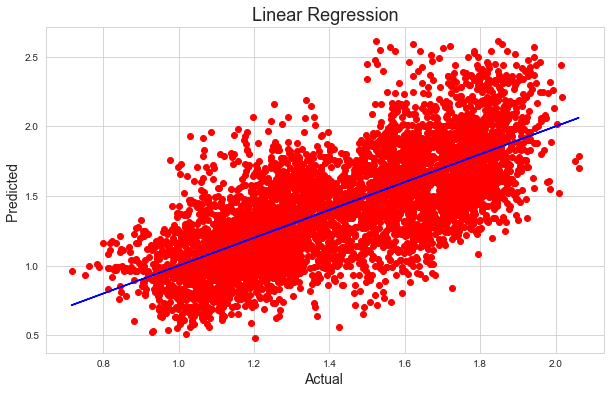

In [174]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Working with Other Regression Models

# Decision Tree Model

In [175]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

#training Dtc model
dtr.fit(x_train,y_train)
dtr_score=dtr.score(x_train,y_train)

#predict dtc
pred_train=dtr.predict(x_train)
pred_test=dtr.predict(x_test)

#result dtc
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  1.0 Testing Accuracy R2_score  0.5947598334418672
Training Mean_squared_Error  1.1971786299388078e-34 Testing Mean_squared_error  0.061007005287009065
Training Absolute_Error  7.009097201194837e-19 Testing Absolute Error 0.16298527190332326


## Cross_Validation with Decision Trees Regressor

In [176]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    dtr_cv_score=cross_val_score(dtr,x,y,cv=i)
    cv_mean=dtr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Mean{cv_mean} ,The Training Score is {train_accuracy}, Testing Score {test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Mean-2.1159175090151474 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 3, The Cross_Val_Mean-0.4463128146345399 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 4, The Cross_Val_Mean-0.6363120591877134 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 5, The Cross_Val_Mean-0.44306535581231576 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 6, The Cross_Val_Mean-0.6441382496371787 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 7, The Cross_Val_Mean-0.29996564590307573 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 8, The Cross_Val_Mean-0.3470164811803156 ,The Training Score is 1.0, Testing Score 0.5947598334418672
At CROSS_FOLD 9, The Cross_Val_Mean-0.3299256710639899 ,The Training Score is 1.0, Testing Score 0.5947598334418672


In [177]:
# As this Cross Fold point 8 Cross_Val_Score is near to training score.

# pred training for dtc
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with dtc
dtr_cv_score=cross_val_score(dtr,x,y,cv=9) 
dtr_mean=dtr_cv_score.mean() #mean value

print("Cv_score of Model is ",dtr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.34106482967917046  The Training Score is  1.0  Testing Score Stands  0.5947598334418672


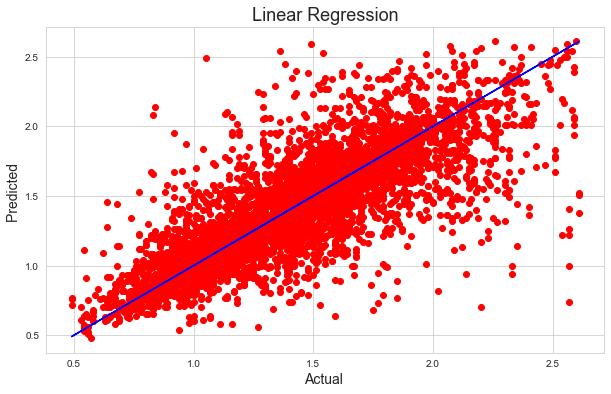

In [178]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='r')
plt.plot(pred_test,pred_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# KNeighbors Regressor

In [179]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#training knr model
knr.fit(x_train,y_train)
knr_score=knr.score(x_train,y_train)

#predict knr
pred_train=knr.predict(x_train)
pred_test=knr.predict(x_test)

#result knr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.8696693818008877 Testing Accuracy R2_score  0.789501114548978
Training Mean_squared_Error  0.0193008456495346 Testing Mean_squared_error  0.031689619335347426
Training Absolute_Error  0.09540866046135167 Testing Absolute Error 0.12387990936555891


## Cross_Validation with Kneighbors Regressor

In [180]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,40):
    knr_cv_score=cross_val_score(knr,x,y,cv=i)
    cv_mean=knr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Mean {cv_mean} ,Training Score is {train_accuracy}, Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Mean -2.2921719328352057 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 3, The Cross_Val_Mean -0.272053806848004 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 4, The Cross_Val_Mean -0.14119669839221535 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 5, The Cross_Val_Mean 0.036199542640098684 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 6, The Cross_Val_Mean 0.011545877272769622 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 7, The Cross_Val_Mean 0.00462837926967008 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 8, The Cross_Val_Mean -0.059909337792502515 ,Training Score is 0.8696693818008877, Testing Score0.789501114548978
At CROSS_FOLD 9, The Cross_Val_Mean 0.016816186213330055 ,Training Score is 0.8696693818008877, Testing Score0.789

In [181]:
# As this Cross Fold point 4 Cross_Val_Score is near to training score.

# pred training for k-Neighbors
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with k-Neighbors
knr_cv_score=cross_val_score(knr,x,y,cv=9) 
knr_mean=knr_cv_score.mean() #mean value

print("Cv_score of Model is ",knr_mean," The Training Score is ", train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.016816186213330055  The Training Score is  0.8696693818008877  Testing Score Stands  0.789501114548978


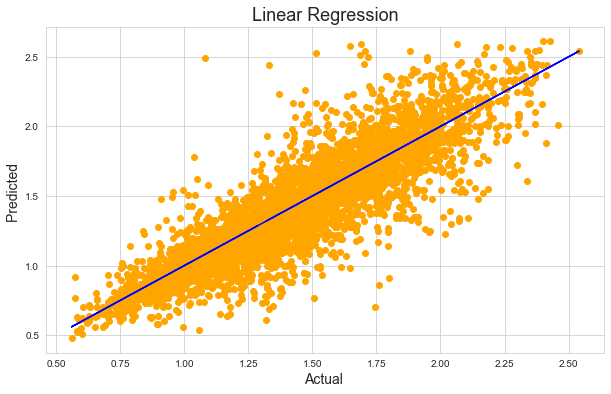

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Regularization

In [183]:
from sklearn.linear_model import ElasticNet
# Elastic Net Model
en=ElasticNet()
en.fit(x_train,y_train)

# training score
en_score_training=en.score(x_train,y_train)
en_score_training*100

0.0

In [184]:
pred_en=en.predict(x_test) # predict test

en_cv_score=cross_val_score(en,x,y,cv=4)
en_cv_mean=en_cv_score.mean()
en_cv_mean

-1.446214478704042

# Support Vector Regressor

In [185]:
from sklearn.svm import SVR
svr=SVR()

#training SVR
svr.fit(x_train,y_train)
svr_score=svr.score(x_train,y_train)

#predict SVR
pred_train = svr.predict(x_train)
pred_test  = svr.predict(x_test)

#result SVR
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.7033768865993308 Testing Accuracy R2_score  0.6936407956286514
Training Mean_squared_Error  0.04392733654561694 Testing Mean_squared_error  0.046120940477220956
Training Absolute_Error  0.15519410124673555 Testing Absolute Error 0.1603730150375553


### Cross Validation with Support Vector

taking short range as (2,5) its taking much time so using small paramter

In [186]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,5):
    svr_cv_score=cross_val_score(svr,x,y,cv=i)
    cv_mean=svr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, Cross_Val_Score{cv_mean} ,Training Score is {train_accuracy},Testing Score {test_accuracy} ")

At CROSS_FOLD2, Cross_Val_Score-0.8403784402767401 ,Training Score is 0.7033768865993308,Testing Score 0.6936407956286514 
At CROSS_FOLD3, Cross_Val_Score-0.16162327245511732 ,Training Score is 0.7033768865993308,Testing Score 0.6936407956286514 
At CROSS_FOLD4, Cross_Val_Score-0.011962847742763488 ,Training Score is 0.7033768865993308,Testing Score 0.6936407956286514 


In [187]:
# As this Cross Fold point 4 Cross_Val_Score is near to training score.

# pred training for Support vector
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Support Vector
svr_cv_score=cross_val_score(svr,x,y,cv=4) 
svr_mean=svr_cv_score.mean() # cross val mean

print("Cv_score of Model is ",svr_mean," The Training Score is ",train_accuracy," Testing Score Stands " ,test_accuracy)

Cv_score of Model is  -0.011962847742763488  The Training Score is  0.7033768865993308  Testing Score Stands  0.6936407956286514


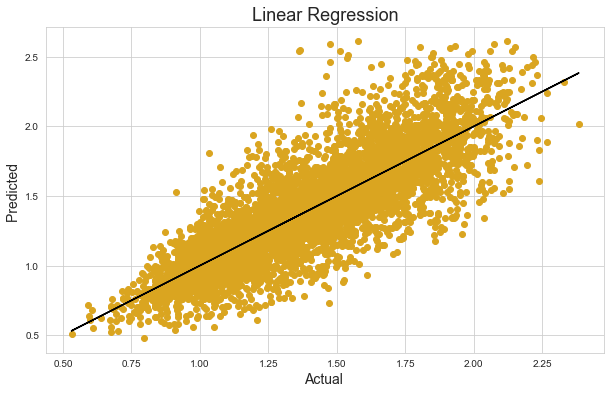

In [188]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='goldenrod')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# SGD Regressor

In [189]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()

#training SGD
sgd.fit(x_train,y_train)
sgd_score=sgd.score(x_train,y_train)

#predict
pred_train=sgd.predict(x_train)
pred_test=sgd.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.5242865551498279 Testing Accuracy R2_score  0.5239776609222075
Training Mean_squared_Error  0.07044907711888765 Testing Mean_squared_error  0.07166292917976909
Training Absolute_Error  0.20946795640277607 Testing Absolute Error 0.21079553965342265


In [190]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,15):
    sgd_cv_score=cross_val_score(sgd,x,y,cv=i)
    cv_mean=sgd_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -7.829757412059099 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD3, The Cross_Val_Score 0.10356470343752829 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD4, The Cross_Val_Score 0.09505767685031516 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD5, The Cross_Val_Score 0.1889738949247852 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD6, The Cross_Val_Score 0.12396393212159901 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD7, The Cross_Val_Score 0.1367514606271593 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD8, The Cross_Val_Score 0.15446463612317518 ,Training Score is 0.5242865551498279,Testing Score0.5239776609222075
At CROSS_FOLD9, The Cross_Val_Score 0.15414382472560767 ,Training Score is 0.5242865551498279,Testing Score0.523977660922

In [191]:
# As this Cross Fold 9 Cross_Val_Score is near to training score.

# pred training for SGD Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with SGD Regressor
sgd_cv_score=cross_val_score(sgd,x,y,cv=5) 
sgd_mean=sgd_cv_score.mean() #mean value

print("Cv_score of Model is ",sgd_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.14734684296894188  The Training Score is 0.5242865551498279 Testing Score Stands  0.5239776609222075


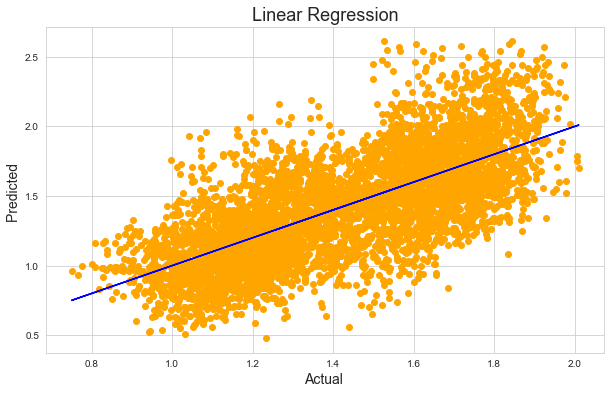

In [192]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Ensemble Techniques (Bagging)

# Extra Trees

In [193]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

#training score
etr.fit(x_train,y_train)
etr_score=etr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  1.0 Testing Accuracy R2_score  0.8305832388022738
Training Mean_squared_Error  4.268607247520324e-30 Testing Mean_squared_error  0.02550489832703927
Training Absolute_Error  1.706562406116045e-15 Testing Absolute Error 0.11087492447129908


## Cross_Validation with Extra Trees Regressor

In [194]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,22):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1.613047740760591 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD3, The Cross_Val_Score 0.10437386541676615 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD4, The Cross_Val_Score 0.08396380622187843 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD5, The Cross_Val_Score 0.27552422559768247 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD6, The Cross_Val_Score 0.25027479215084647 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD7, The Cross_Val_Score 0.28378189031638207 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD8, The Cross_Val_Score 0.24131962731450737 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD9, The Cross_Val_Score 0.30045211116043274 ,Training Score is 1.0,Testing Score0.8305832388022738
At CROSS_FOLD10, The Cross_Val_Score 0.2846606854681443 ,Training Score is 1.0,Testing Score0.8305832388022738
At

In [195]:
# As this Cross Fold 13 Cross_Val_Score is near to training score.

# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=13) 
etr_mean=etr_cv_score.mean() #mean value

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.2987653820602492  The Training Score is 1.0 Testing Score Stands  0.8305832388022738


### Model Graph Ploting

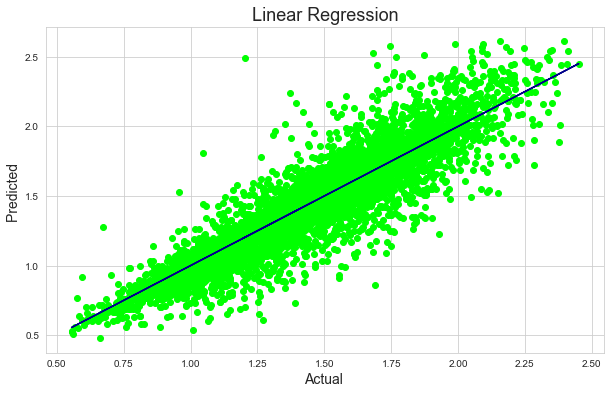

In [196]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='lime')
plt.plot(pred_test,pred_test,color='darkblue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Random Forest Regressor

In [197]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#training Random Forest
rfr.fit(x_train,y_train)
rfr_score= rfr.score(x_train,y_train)

#predict Model
pred_train = rfr.predict(x_train)
pred_test = rfr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9725024653216094 Testing Accuracy R2_score  0.8077374630155236
Training Mean_squared_Error  0.004072148815864022 Testing Mean_squared_error  0.028944222656722054
Training Absolute_Error  0.044516778632132735 Testing Absolute Error 0.12015764728096677


### Cross Validation (Random Forest Regressor)

In [198]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    rfr_cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=rfr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1.4495667143969122 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD3, The Cross_Val_Score 0.06649283676024087 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD4, The Cross_Val_Score 0.0394265851826108 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD5, The Cross_Val_Score 0.2206985649985808 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD6, The Cross_Val_Score 0.2567625902497493 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD7, The Cross_Val_Score 0.28904659446895664 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD8, The Cross_Val_Score 0.28284193329956947 ,Training Score is 0.9725024653216094,Testing Score0.8077374630155236
At CROSS_FOLD9, The Cross_Val_Score 0.28433414322127715 ,Training Score is 0.9725024653216094,Testing Score0.807737463015

## Selected Model

In [199]:
# As this Cross Fold 13 Cross_Val_Score is near to training score.

# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
rfr_cv_score=cross_val_score(rfr,x,y,cv=13) 
rfr_mean=rfr_cv_score.mean()

print("Cv_score of Model is ",rfr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.3277932319763451  The Training Score is 0.9725024653216094 Testing Score Stands  0.8077374630155236


### Graph Ploting for Random Forest Regressor

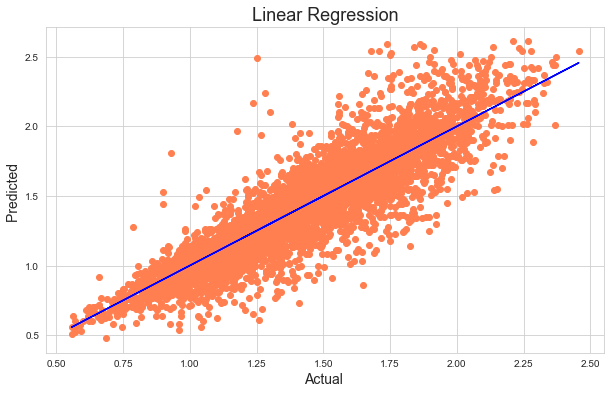

In [200]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='coral')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Ensemble Techniques (Boosting )

# Ada Boost

In [201]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()

#training_ada_Boost
ada.fit(x_train,y_train)
ada_score= ada.score(x_train,y_train)

#predict_ada_Boost
pred_train = ada.predict(x_train)
pred_test = ada.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.49464745381394304 Testing Accuracy R2_score  0.48173440636343234
Training Mean_squared_Error  0.07483837357109097 Testing Mean_squared_error  0.07802245290639351
Training Absolute_Error  0.22032318897729974 Testing Absolute Error 0.22482966538030458


### Cross Validation for Ada Boost

In [202]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,10):
    ada_cv_score=cross_val_score(ada,x,y,cv=i)
    cv_mean=ada_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1.540037131557908 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD3, The Cross_Val_Score -0.026485364911662385 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD4, The Cross_Val_Score -0.06778719975996517 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD5, The Cross_Val_Score 0.042424721062166014 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD6, The Cross_Val_Score 0.014612252215504662 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD7, The Cross_Val_Score 0.024009819165490116 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD8, The Cross_Val_Score 0.017429145129686158 ,Training Score is 0.49464745381394304,Testing Score0.48173440636343234
At CROSS_FOLD9, The Cross_Val_Score 0.05790607212103075 ,Training Score is 0.49464745381394304,Tes

### Selected Model

In [203]:
# As this Cross Fold 7 Cross_Val_Score is near to training score.

# pred training for Ada Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Ada Boost
ada_cv_score=cross_val_score(ada,x,y,cv=7) 
ada_mean=ada_cv_score.mean() # mean value

print("Cv_score of Model is ",ada_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.02817414011834077  The Training Score is 0.49464745381394304 Testing Score Stands  0.48173440636343234


### Graph Ploting for Ada Boost

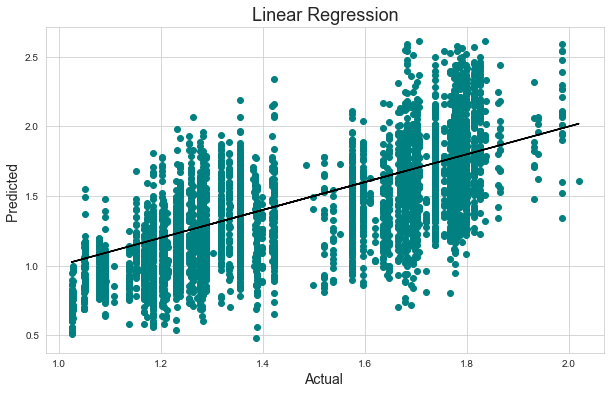

In [204]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='teal')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Gradient Boost

In [205]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#training_Gradient_Boost
gbr.fit(x_train,y_train)
gbr_score= gbr.score(x_train,y_train)

#predict_gbr
pred_train = gbr.predict(x_train)
pred_test = gbr.predict(x_test)

#result_gbr
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.6716001928076409 Testing Accuracy R2_score  0.6454626409075235
Training Mean_squared_Error  0.048633192089008424 Testing Mean_squared_error  0.053373935570856526
Training Absolute_Error  0.1682810277885944 Testing Absolute Error 0.17744672387082805


## Cross Validation Gradient Boost

In [206]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    gbr_cv_score=cross_val_score(gbr,x,y,cv=i)
    cv_mean=gbr_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is -1.8442661277125527 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD3, Cross_Val_Score is 0.07826944856832474 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD4, Cross_Val_Score is 0.19002069479128006 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD5, Cross_Val_Score is 0.30366360365999984 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD6, Cross_Val_Score is 0.2841507793498898 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD7, Cross_Val_Score is 0.3163047484907145 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD8, Cross_Val_Score is 0.2972725068620238 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235
At CROSS_FOLD9, Cross_Val_Score is 0.32154601768817087 ,Training Score is 0.6716001928076409,Testing Score0.6454626409075235


### Selected Model

In [207]:
# As this Cross Fold 9 Cross_Val_Score is near to training score.

# pred training for Gradient Boost
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Gradient Boost
gbr_cv_score=cross_val_score(gbr,x,y,cv=9) 
gbr_mean=gbr_cv_score.mean() # mean value

print("Cv_score of Model is ",gbr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.32165376412185176  The Training Score is 0.6716001928076409 Testing Score Stands  0.6454626409075235


### Graph Ploting for Gradient Boost 

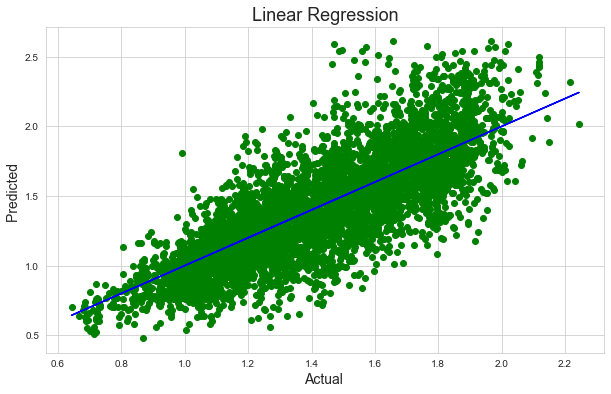

In [208]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='green')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

# Neural Network (MLPRegressor)

In [209]:
from sklearn.neural_network import MLPRegressor
mlp= MLPRegressor()

#training
#training_mlp
mlp.fit(x_train,y_train)
mlp_score= mlp.score(x_train,y_train)

#predict_mlp
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

#result_mlp
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.7124113951963886 Testing Accuracy R2_score  0.7029677785771966
Training Mean_squared_Error  0.042589403384854924 Testing Mean_squared_error  0.04471680696576138
Training Absolute_Error  0.15666992528253793 Testing Absolute Error 0.16104863542461367


## Cross_Validation_MLP Regressor

In [210]:
from sklearn.model_selection import cross_val_score

# testing
train_accuracy=r2_score(y_train,pred_train)
test_accuracy =r2_score(y_test,pred_test)

#cross validation
for i in range(2,10):
    mlp_cv_score=cross_val_score(mlp,x,y,cv=i)
    cv_mean=mlp_cv_score.mean()
    
    print(f"At CROSS_FOLD{i}, Cross_Val_Score is {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, Cross_Val_Score is -16.02900575306549 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD3, Cross_Val_Score is -1.3516693263748927 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD4, Cross_Val_Score is -0.26824855333438663 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD5, Cross_Val_Score is 0.03961076560912251 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD6, Cross_Val_Score is 0.06605873584560627 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD7, Cross_Val_Score is 0.1358087173625955 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD8, Cross_Val_Score is 0.2170138407627079 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966
At CROSS_FOLD9, Cross_Val_Score is 0.2134251503425857 ,Training Score is 0.7124113951963886,Testing Score0.7029677785771966


### Selected Cross Validation

In [211]:
# As this Cross Fold 7 Cross_Val_Score is near to training score.

# pred training for MLP Regressor
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with MLP Regressor
mlp_cv_score=cross_val_score(mlp,x,y,cv=7) 
mlp_mean=mlp_cv_score.mean() # mean value

print("Cv_score of Model is ",mlp_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.24489607518763687  The Training Score is 0.7124113951963886 Testing Score Stands  0.7029677785771966


### Graph Plot for model

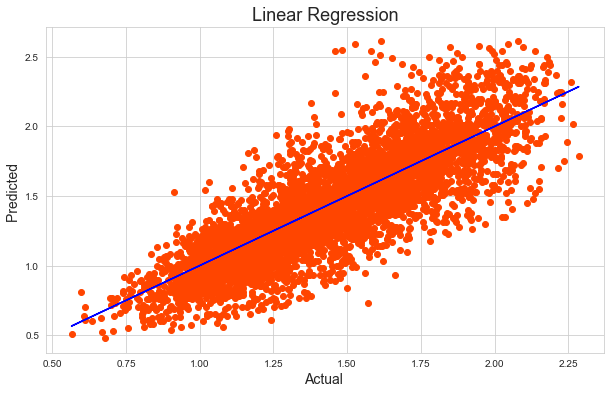

In [212]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orangered')
plt.plot(pred_test,pred_test,color='blue')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

####

Selected Random Forest and Extra Trees due to following reasons:
-------------------------------------------------------------------------------------------------
- R2 Score is better for the model
- CV Score better for these model they are nearer to training score
- "MSE" and "MAE" are less on compare to other models. (They are close to the mean)

# Using Hyper Parameter  finding Best Model.

### Model-1 (Random Forest Regressor)

Reducing parameter as its making my system very slow

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

parameters={'criterion':['squared_error'],
           'min_samples_split':[2,3,4],
           'max_features':['sqrt', 'log2', 'None']}

gsv=GridSearchCV(rfr,parameters)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_split': 2} Best Score  0.7944931941736937


In [214]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100 ,criterion='squared_error',max_depth=22 ,min_samples_split=2 ,ccp_alpha=0.0 ,max_features='log2' ,random_state=42 )

#training score
rfr.fit(x_train,y_train)
rfr_score=rfr.score(x_train,y_train)

#predict
pred_train=rfr.predict(x_train)
pred_test=rfr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9712241009071636 Testing Accuracy R2_score  0.8075681460738856
Training Mean_squared_Error  0.004261463610714311 Testing Mean_squared_error  0.028969712527682833
Training Absolute_Error  0.046516531573411776 Testing Absolute Error 0.12112570485761602


### Cross Validation on Model

In [215]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    rfr_cv_score=cross_val_score(rfr,x,y,cv=i)
    cv_mean=rfr_cv_score.mean()

    print(f"At CROSS_FOLD{i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD2, The Cross_Val_Score -1.3271231960005043 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD3, The Cross_Val_Score 0.06865321048839541 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD4, The Cross_Val_Score 0.1523826916426026 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD5, The Cross_Val_Score 0.27651368133759957 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD6, The Cross_Val_Score 0.2801100482569518 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD7, The Cross_Val_Score 0.34800751122098644 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD8, The Cross_Val_Score 0.32588736577244376 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738856
At CROSS_FOLD9, The Cross_Val_Score 0.348479471919997 ,Training Score is 0.9712241009071636,Testing Score0.8075681460738

### Checking Selected Cv Score

In [216]:
# As this Cross Fold 13 Cross_Val_Score is near to training score.

# pred training for Random Forest
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Random Forest
rfr_cv_score=cross_val_score(rfr,x,y,cv=13) 
rfr_mean=rfr_cv_score.mean()

print("Cv_score of Model is ",rfr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.37342056050025785  The Training Score is 0.9712241009071636 Testing Score Stands  0.8075681460738856


### Graph Ploting For Model

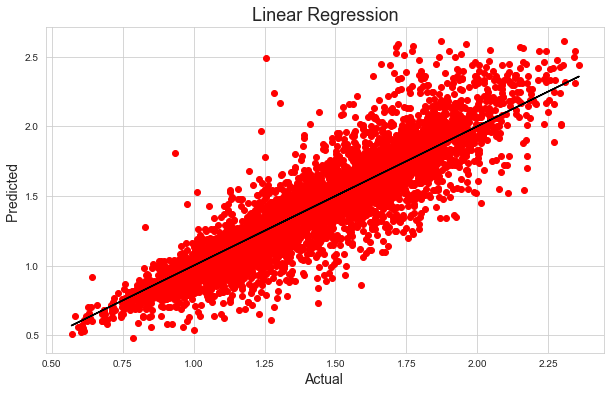

In [217]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='red')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

## Regularization with Hyper Parameter

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Lasso

In [219]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,100))}

ls=Lasso()
gsv=GridSearchCV(ls,parameters)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.5253455402942011 Best Parameter  {'alpha': 0.0001, 'random_state': 0}


## Ridge

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'solver':['auto','svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
rd=Ridge()
gsv=GridSearchCV(rd,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_)

Best Score  0.5253684417912851 Best Parameter  {'alpha': 0.0001, 'solver': 'sag'}


## Elastic Net

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

parameter={'alpha':[0.0001,0.001,0.01,0.1,1],'selection':['cyclic', 'random'],'random_state':list(range(0,100)),'max_iter':[1000,2000,3000,4000,5000]}
en=ElasticNet()
gsv=GridSearchCV(en,parameter)
gsv.fit(x_train,y_train)

print("Best Score ",gsv.best_score_,"Best Parameter ",gsv.best_params_) 

Best Score  0.5253531352385714 Best Parameter  {'alpha': 0.0001, 'max_iter': 1000, 'random_state': 85, 'selection': 'random'}


### Model Working the best

In [226]:
from sklearn.linear_model import Ridge

rd=Ridge(alpha=0.0001,solver='sag')
rd.fit(x_train,y_train)

# training score
rd_score_training=rd.score(x_train,y_train)
rd_score_training*100

52.6547510461276

In [227]:
pred_rd=rd.predict(x_test) # predict test
#cross val score
rd_cv_score=cross_val_score(rd,x,y,cv=37)
rd_cv_mean=rd_cv_score.mean()
rd_cv_mean

0.06882600978136065

In [231]:
print("Model Coefficient is ", rd.coef_) # coef and intercept of the model

Model Coefficient is  [-0.32689003  0.02465035  0.26492769  0.02497776 -0.22630619  0.20724782
 -0.0328087   0.00890104  0.18520698  0.07667768]


In [232]:
rd_check=Ridge(alpha=0.0001,solver='sag')
rd_check.fit(x_train,y_train)
rd_check.coef_

array([-0.32691903,  0.02469578,  0.26491411,  0.02477269, -0.22632023,
        0.20714645, -0.03273433,  0.00886562,  0.18514275,  0.07674997])

## Model-2 (Extra Trees Regressor)

NOTE:- Can't use maximum parameters as system geting slow

In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

parameters={'min_samples_split':[2],
            'min_samples_leaf':[1,2,3],
           'random_state':[40,41,42],
           'n_jobs':[1,2],
           'min_impurity_decrease':[0.00000001,0.000001,0.0001]}

gsv=GridSearchCV(etr,parameters)
gsv.fit(x_train,y_train)

print("Best Parameter ",gsv.best_params_,"Best Score ",gsv.best_score_)

Best Parameter  {'min_impurity_decrease': 1e-08, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_jobs': 1, 'random_state': 41} Best Score  0.8154068078918357


In [234]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(n_estimators=100,min_samples_leaf= 1, max_leaf_nodes=10008,min_impurity_decrease=0.000000001,criterion= 'squared_error',min_samples_split= 3 ,ccp_alpha=0.0000001 ,max_features= 'sqrt',random_state=42,n_jobs=1 )

#training score
etr.fit(x_train,y_train)
etr_score=rfr.score(x_train,y_train)

#predict
pred_train=etr.predict(x_train)
pred_test=etr.predict(x_test)

#result
print("Training Accuracy r2_score ",r2_score(y_train,pred_train),"Testing Accuracy R2_score ",r2_score(y_test,pred_test))
print("Training Mean_squared_Error ",mean_squared_error(y_train,pred_train),"Testing Mean_squared_error ",mean_squared_error(y_test,pred_test))
print("Training Absolute_Error ",mean_absolute_error(y_train,pred_train),"Testing Absolute Error",mean_absolute_error(y_test,pred_test))

Training Accuracy r2_score  0.9921466966155021 Testing Accuracy R2_score  0.8213855034621381
Training Mean_squared_Error  0.001163006809586304 Testing Mean_squared_error  0.02688957421761062
Training Absolute_Error  0.023377492131273638 Testing Absolute Error 0.11611278925287756


### Cross Validation Extra Trees

In [235]:
from sklearn.model_selection import cross_val_score

#training accuracy.
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

for i in range(2,20):
    etr_cv_score=cross_val_score(etr,x,y,cv=i)
    cv_mean=etr_cv_score.mean()

    print(f"At CROSS_FOLD {i}, The Cross_Val_Score {cv_mean} ,Training Score is {train_accuracy},Testing Score{test_accuracy}")

At CROSS_FOLD 2, The Cross_Val_Score -1.267822001714741 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 3, The Cross_Val_Score 0.11941102643090847 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 4, The Cross_Val_Score 0.1594362871742383 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 5, The Cross_Val_Score 0.2884457056291557 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 6, The Cross_Val_Score 0.2755014475459283 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 7, The Cross_Val_Score 0.30859836925479683 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 8, The Cross_Val_Score 0.28788010819731935 ,Training Score is 0.9921466966155021,Testing Score0.8213855034621381
At CROSS_FOLD 9, The Cross_Val_Score 0.32654544886582726 ,Training Score is 0.9921466966155021,Testing Score0.82138

#### Cross Validation For Selected Model

In [238]:
# As this Cross Fold 19 Cross_Val_Score is near to training score.

# pred training for Extra Trees
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

#cross val with Extra Trees
etr_cv_score=cross_val_score(etr,x,y,cv=19) 
etr_mean=etr_cv_score.mean()

print("Cv_score of Model is ",etr_mean," The Training Score is", train_accuracy,"Testing Score Stands " ,test_accuracy)

Cv_score of Model is  0.33656833025058536  The Training Score is 0.9921466966155021 Testing Score Stands  0.8213855034621381


### Graph Plotting for Model

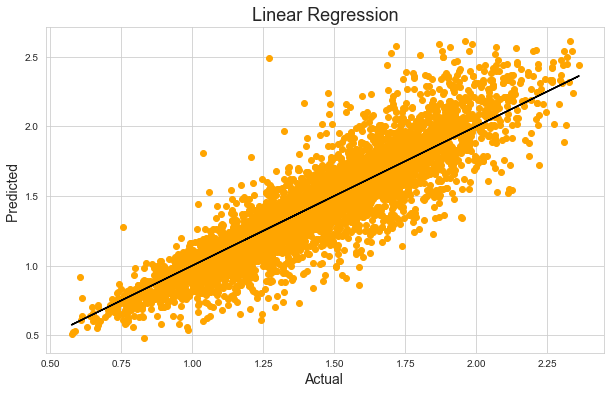

In [237]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_test,y=y_test,color='orange')
plt.plot(pred_test,pred_test,color='black')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

### Saving Extra Trees Model due to following reasons:

    - R2 Score  (Training Score is 99% ,Testing Score 82 %)
    - CV Score quite same
    - "MSE" and "MAE" are less on compare to other model. 

## Saving Model

In [239]:
import pickle
filename='Avocado_price.pkl'
pickle.dump(etr, open(filename, 'wb')) #saved model

### Loading Back that model

In [240]:
import pickle
loaded_model =pickle.load(open('Avocado_price.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

82.13855034621382


In [241]:
df2=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
df2

0         1         2         3         4         5     \
Predicted  1.186752  1.925283  1.421181  1.492225  1.830257  1.820917   
Original   1.186752  1.925283  1.421181  1.492225  1.830257  1.820917   

               6         7         8        9     ...      5286      5287  \
Predicted  1.223458  1.731724  1.092709  0.92087  ...  0.967463  2.111326   
Original   1.223458  1.731724  1.092709  0.92087  ...  0.967463  2.111326   

               5288      5289      5290      5291      5292      5293  \
Predicted  1.292493  1.240667  2.038883  1.910706  1.363244  1.943208   
Original   1.292493  1.240667  2.038883  1.910706  1.363244  1.943208   

               5294    5295  
Predicted  1.944687  1.4708  
Original   1.944687  1.4708  

[2 rows x 5296 columns]